<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# MiniProject2
# Vehicle Insurance Claim Fraud Detection

Vehicle insurance fraud poses a significant financial risk to insurers, leading to increased claim costs, delayed processing, and higher premiums. Common schemes include staged accidents, phantom passengers, and inflated injury claims—all designed to extract undue payouts.

These fraudulent activities erode profitability, strain operational resources, and damage customer trust.

This project leverages data science to address the problem proactively. By analyzing patterns in historical claims data, the goal is to develop a fraud detection model that flags high-risk claims for further investigation. Early detection will reduce financial losses, streamline claims processing, and improve overall risk management.

# Data Dictionary #
- **Month**: The month in which the insurance claim was made.
- **WeekOfMonth**: The week of the month in which the insurance claim was made.
- **DayOfWeek**: The day of the week on which the insurance claim was made.
- **Make**: The manufacturer of the vehicle involved in the claim.
- **AccidentArea**: The area where the accident occurred (e.g., urban, rural).
- **DayOfWeekClaimed**: The day of the week on which the insurance claim was processed.
- **MonthClaimed**: The month in which the insurance claim was processed.
- **WeekOfMonthClaimed**: The week of the month in which the insurance claim was processed.
- **Sex**: The gender of the policyholder.
- **MaritalStatus**: The material status of the policyholder.
- **Age**: The age of the policyholder.
- **Fault**: Indicates whether the policyholder was at fault in the accident.
- **PolicyType**: The type of insurance policy (e.g., comprehensive, third-party).
- **VehicleCategory**: The category of the vehicle (e.g., sedan, SUV).
- **VehiclePrice**: The price of vehicle.
- **FraudFound_P**: Indicates whether fraud was detected in the insurance claim.
- **PolicyNumber**: The unique identifier for the insurance policy.
- **RepNumber**: The unique identifier for the insurance representative handling the claim.
- **Deductible**: The amount that the policy holder must pay out of pocket before the insurance company pays the remaining costs.
- **DriverRating**: The rating of the driver, often based on driving history or other factors.
- **Days_Policy_Accident**: The number of days since the policy was issued until the accident occurred.
- **Days_Policy_Claim**: The number of days since the policy was issued until the claim was made.
- **PastNumberOfClaims**: The number of claims previously made by the policyholder.
- **AgeOfVehicle**: The age of the vehicle involved in the claim.
- **AgeOfPolicyHolder**: The age of the policyholder.
- **PoliceReportFiled**: Indicates whether a police report was filed for the accident.
- **WitnessPresent**: Indicates whether a witness was present at the scene of the accident.
- **AgentType**: The type of insurance agent handling the policy (e.g., internal, external)
- **NumberOfSuppliments**: The number of supplementary documents or claims related to the main claim, categorized into ranges.
- **AddressChange_Claim**: Indicates whether the address of the policyholder was changed at the time of the claim, categorized into ranges.
- **NumberOfCars**: The number of cars insured under the policy, categorized into ranges.
- **Year**: The year in which the claim was made or processed.
- **BasePolicy**: The base policy type (e.g., Liability, Collision, All Perils).

### 1. Load Data

The dataset includes detailed information on vehicles (such as attributes, model, and accident history) along with insurance policy details (including policy type, tenure, and coverage). The objective is to identify whether a given claim is fraudulent, as indicated by the target variable FraudFound_P.

In [5]:
#!pip install xgboost

In [6]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score

# Encoding
from sklearn.preprocessing import LabelEncoder

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [7]:
fraud_csv = 'C:/Yan/Labs/MiniProject2/fraud.csv'
fraud = pd.read_csv(fraud_csv)

### 2. EDA

- Explore dataset. Clean data (if required)
- Find features to predict class

In [9]:
fraud.head().T

0                  1                  2  \
Month                               Dec                Jan                Oct   
WeekOfMonth                           5                  3                  5   
DayOfWeek                     Wednesday          Wednesday             Friday   
Make                              Honda              Honda              Honda   
AccidentArea                      Urban              Urban              Urban   
DayOfWeekClaimed                Tuesday             Monday           Thursday   
MonthClaimed                        Jan                Jan                Nov   
WeekOfMonthClaimed                    1                  4                  2   
Sex                              Female               Male               Male   
MaritalStatus                    Single             Single            Married   
Age                                  21                 34                 47   
Fault                     Policy Holder      Policy Holder      Policy Holder   
PolicyType            Sport - Liability  Sport - Collision  Sport - Collision   
VehicleCategory                   Sport              Sport              Sport   
VehiclePrice            more than 69000    more than 69000    more than 69000   
FraudFound_P                          0                  0                  0   
PolicyNumber                          1                  2                  3   
RepNumber                            12                 15                  7   
Deductible                          300                400                400   
DriverRating                          1                  4                  3   
Days_Policy_Accident       more than 30       more than 30       more than 30   
Days_Policy_Claim          more than 30       more than 30       more than 30   
PastNumberOfClaims                 none               none                  1   
AgeOfVehicle                    3 years            6 years            7 years   
AgeOfPolicyHolder              26 to 30           31 to 35           41 to 50   
PoliceReportFiled                    No                Yes                 No   
WitnessPresent                       No                 No                 No   
AgentType                      External           External           External   
NumberOfSuppliments                none               none               none   
AddressChange_Claim              1 year          no change          no change   
NumberOfCars                     3 to 4          1 vehicle          1 vehicle   
Year                               1994               1994               1994   
BasePolicy                    Liability          Collision          Collision   

                                      3                  4  
Month                               Jun                Jan  
WeekOfMonth                           2                  5  
DayOfWeek                      Saturday             Monday  
Make                             Toyota              Honda  
AccidentArea                      Rural              Urban  
DayOfWeekClaimed                 Friday            Tuesday  
MonthClaimed                        Jul                Feb  
WeekOfMonthClaimed                    1                  2  
Sex                                Male             Female  
MaritalStatus                   Married             Single  
Age                                  65                 27  
Fault                       Third Party        Third Party  
PolicyType            Sedan - Liability  Sport - Collision  
VehicleCategory                   Sport              Sport  
VehiclePrice             20000 to 29000    more than 69000  
FraudFound_P                          0                  0  
PolicyNumber                          4                  5  
RepNumber                             4                  3  
Deductible                          400                400  
DriverRating                          2                  1  
Da

In [10]:
fraud.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [11]:
fraud.duplicated().sum()

0

In [12]:
# Summarize the characteristic of dataset
def summarize(DataFrame):
    
    summary = pd.DataFrame()
    
    # Data Type
    summary['Data Type'] = DataFrame.dtypes
    # N Unique
    summary['N Unique'] = DataFrame.nunique()
    # Unique
    summary['Unique'] = DataFrame.apply(lambda x: x.unique().tolist())
    # Max
    summary['Max'] = DataFrame.apply(lambda x: x.max() if pd.api.types.is_numeric_dtype(x) else '-')
    # Min
    summary['Min'] = DataFrame.apply(lambda x: x.min() if pd.api.types.is_numeric_dtype(x) else '-')
    
    # Measures of Central Tendency: Mean, Median, Mode 
    summary['Mean'] = DataFrame.apply(lambda x: round(x.mean(), 2) if pd.api.types.is_numeric_dtype(x) else '-')
    summary['Median'] = DataFrame.apply(lambda x: x.median() if pd.api.types.is_numeric_dtype(x) else '-')
    summary['Mode'] = DataFrame.apply(lambda x: x.mode().iloc[0] if not x.mode().empty else '-')
    
    # Measures of Dispersion: Range, Variance, Standard Deviation
    summary['Range'] = DataFrame.apply(lambda x: x.max() - x.min() if pd.api.types.is_numeric_dtype(x) else '-')
    summary['Variance'] = DataFrame.apply(lambda x: x.var() if pd.api.types.is_numeric_dtype(x) else '-')
    summary['Standard Deviation'] = DataFrame.apply(lambda x: x.std() if pd.api.types.is_numeric_dtype(x) else '-')
    
    # Measures of Shape: Skewness, Kurtosis
    summary['Skewness'] = DataFrame.apply(lambda x: round(x.skew(), 2) if pd.api.types.is_numeric_dtype(x) else '-')
    summary['Kurtosis'] = DataFrame.apply(lambda x: round(x.kurt(), 2) if pd.api.types.is_numeric_dtype(x) else '-')
    
    return summary

In [13]:
summary = summarize(fraud)
summary

Data Type  N Unique  \
Month                   object        12   
WeekOfMonth              int64         5   
DayOfWeek               object         7   
Make                    object        19   
AccidentArea            object         2   
DayOfWeekClaimed        object         8   
MonthClaimed            object        13   
WeekOfMonthClaimed       int64         5   
Sex                     object         2   
MaritalStatus           object         4   
Age                      int64        66   
Fault                   object         2   
PolicyType              object         9   
VehicleCategory         object         3   
VehiclePrice            object         6   
FraudFound_P             int64         2   
PolicyNumber             int64     15420   
RepNumber                int64        16   
Deductible               int64         4   
DriverRating             int64         4   
Days_Policy_Accident    object         5   
Days_Policy_Claim       object         4   
PastNumberOfClaims      object         4   
AgeOfVehicle            object         8   
AgeOfPolicyHolder       object         9   
PoliceReportFiled       object         2   
WitnessPresent          object         2   
AgentType               object         2   
NumberOfSuppliments     object         4   
AddressChange_Claim     object         5   
NumberOfCars            object         5   
Year                     int64         3   
BasePolicy              object         3   

                                                                 Unique  \
Month                 [Dec, Jan, Oct, Jun, Feb, Nov, Apr, Mar, Aug, ...   
WeekOfMonth                                             [5, 3, 2, 4, 1]   
DayOfWeek             [Wednesday, Friday, Saturday, Monday, Tuesday,...   
Make                  [Honda, Toyota, Ford, Mazda, Chevrolet, Pontia...   
AccidentArea                                             [Urban, Rural]   
DayOfWeekClaimed      [Tuesday, Monday, Thursday, Friday, Wednesday,...   
MonthClaimed          [Jan, Nov, Jul, Feb, Mar, Dec, Apr, Aug, May, ...   
WeekOfMonthClaimed                                      [1, 4, 2, 3, 5]   
Sex                                                      [Female, Male]   
MaritalStatus                        [Single, Married, Widow, Divorced]   
Age                   [21, 34, 47, 65, 27, 20, 36, 0, 30, 42, 71, 52...   
Fault                                      [Policy Holder, Third Party]   
PolicyType            [Sport - Liability, Sport - Collision, Sedan -...   
VehicleCategory                                 [Sport, Utility, Sedan]   
VehiclePrice          [more than 69000, 20000 to 29000, 30000 to 390...   
FraudFound_P                                                     [0, 1]   
PolicyNumber          [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
RepNumber             [12, 15, 7, 4, 3, 14, 1, 13, 11, 16, 6, 2, 8, ...   
Deductible                                         [300, 400, 500, 700]   
DriverRating                                               [1, 4, 3, 2]   
Days_Policy_Accident    [more than 30, 15 to 30, none, 1 to 7, 8 to 15]   
Days_Policy_Claim               [more than 30, 15 to 30, 8 to 15, none]   
PastNumberOfClaims                       [none, 1, 2 to 4, more than 4]   
AgeOfVehicle          [3 years, 6 years, 7 years, more than 7, 5 yea...   
AgeOfPolicyHolder     [26 to 30, 31 to 35, 41 to 50, 51 to 65, 21 to...   
PoliceReportFiled                                             [No, Yes]   
WitnessPresent                                                [No, Yes]   
AgentType                                          [External, Internal]   
NumberOfSuppliments                 [none, more than 5, 3 to 5, 1 to 2]   
AddressChange_Claim   [1 year, no change, 4 to 8 years, 2 to 3 years...   
NumberOfCars          [3 to 4, 1 vehicle, 2 vehicles, 5 to 8, more t...   
Year                                                 [1994, 1995, 1996]   
BasePolicy                           [Liability, 

- There are no missing values in the dataset.

- The "PolicyNumber" is an identification number and can be dropped.

- The features "Sex", "PoliceReportFiled", and "WitnessPresent" are Boolean and should be converted to 0 or 1.

- The features "AccidentArea", "Fault", and "AgentType" each have only two unique values, so they can also be converted to 0 or 1.

- The "Age" feature has a minimum value of 0, which is nonsensical and needs to be addressed.

- The features "FraudFound_P" and "Deductible" are highly skewed, as their skewness falls outside the range of -0.5 to 0.5.

- The features "WeekOfMonth", "WeekOfMonthClaimed", "FraudFound_P", "Deductible", and "DriverRating" show high kurtosis, with values outside the range of -1 to 1.

- Except for "Age," all features are categorical in nature.

In [15]:
fraud.shape

(15420, 33)

In [16]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [17]:
fraud_counts = fraud['FraudFound_P'].value_counts(normalize=True)
fraud_counts

FraudFound_P
0    0.940143
1    0.059857
Name: proportion, dtype: float64

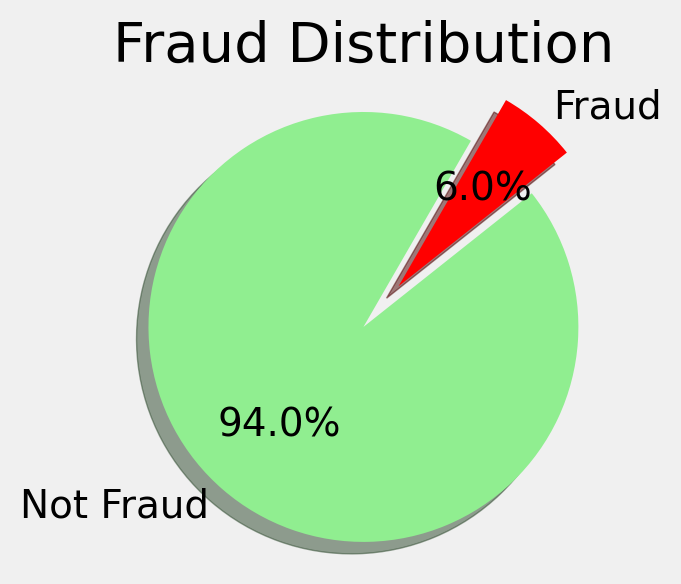

In [18]:
labels = ['Not Fraud' if i == 0 else 'Fraud' for i in fraud_counts.index]
plt.figure(figsize=(3, 3))
explode = (0, 0.25)
plt.pie(fraud_counts.values, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=60, colors=['lightgreen', 'red'])
plt.title('Fraud Distribution')
plt.axis('equal')  # Ensures pie is circular
plt.show()

- The Target Variable "Fraud_Found_P" is **highly imbalanced**.

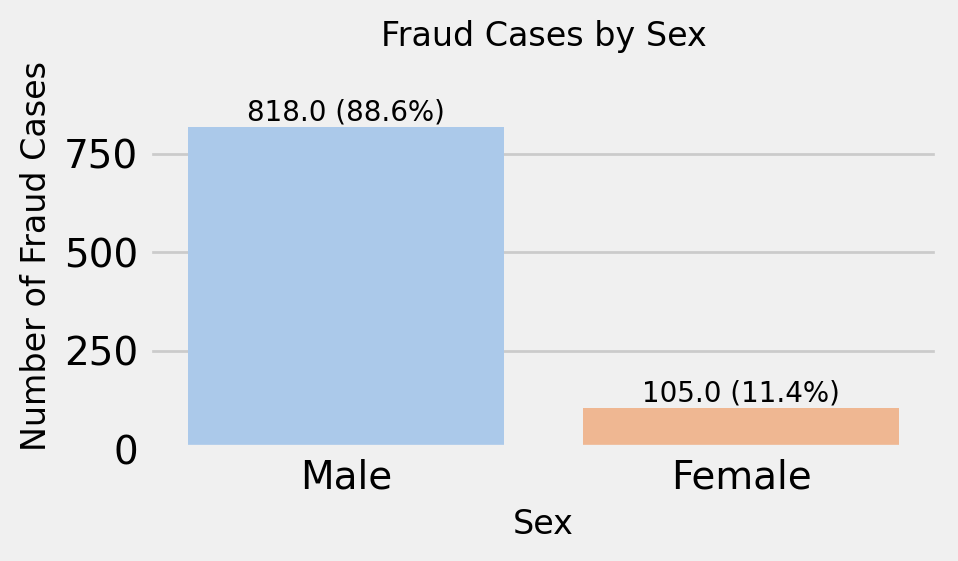

In [20]:
# Fraud Dection by Sex

# Step 1: Filter fraud cases
fraud_1 = fraud[fraud['FraudFound_P'] == 1]

# Step 2: Create countplot
plt.figure(figsize=(5, 3))
ax = sns.countplot(data=fraud_1, x='Sex', palette='pastel')

# Step 3: Add count + percent labels on bars
total = len(fraud_1)
for bar in ax.patches:
    count = bar.get_height()
    percent = 100 * count / total
    label = f'{count} ({percent:.1f}%)'
    ax.text(bar.get_x() + bar.get_width()/2,
            count + 1, label,
            ha='center', va='bottom', fontsize=10)

# Step 4: Customize appearance
plt.title('Fraud Cases by Sex', fontsize=12)
plt.ylabel('Number of Fraud Cases', fontsize=12)
plt.xlabel('Sex', fontsize=12)
plt.ylim(0, max(p.get_height() for p in ax.patches) * 1.2)
plt.tight_layout()
plt.show()


- The data shows that men are involved in more fraud cases than women.

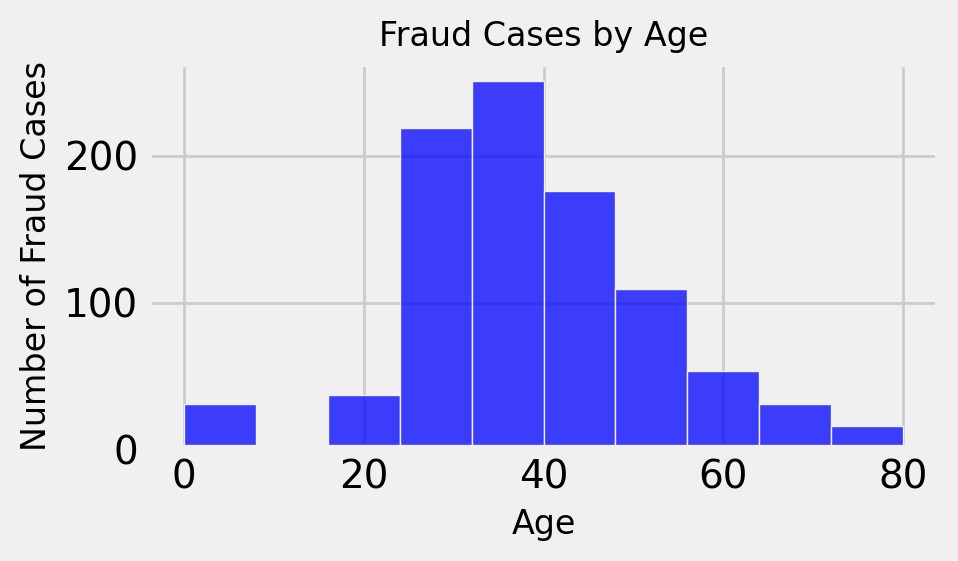

In [22]:
# Fraud Detection by Age
fraud_1 = fraud[fraud['FraudFound_P'] == 1]

# Plot histogram of Age
plt.figure(figsize=(5, 3))
sns.histplot(data=fraud_1, x='Age', bins=10, kde=False, color='blue')

plt.title('Fraud Cases by Age', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Fraud Cases', fontsize=12)
plt.tight_layout()
plt.show()

Fraud is most frequently detected among teenagers. Teenagers have weak financial power as they have not yet started their economic activities.

In [24]:
# Default (vertical + sort by percentage)
def plot_fraud_percentage_bar(data, group_col, target_col='FraudFound_P',
                              sort_by='percentage', title=None, figsize=(16, 8),
                              horizontal=False):
    """
    Plots fraud percentage and count for any categorical column.

    Parameters:
    - data: DataFrame
    - group_col: column to group by (e.g., 'Make')
    - target_col: binary column indicating fraud (default='FraudFound_P')
    - sort_by: 'percentage', 'count', or None
    - title: optional custom plot title
    - figsize: figure size
    - horizontal: if True, plot horizontal bars
    """

    # Group and calculate
    grouped = data.groupby(group_col)[target_col]
    fraud_count = grouped.sum()
    total_count = grouped.count()
    fraud_pct = (fraud_count / total_count) * 100

    # Create DataFrame
    df = pd.DataFrame({
        group_col: fraud_count.index,
        'FraudCount': fraud_count.values,
        'TotalCount': total_count.values,
        'FraudPercentage': fraud_pct.values
    })

    # Sort if requested
    if sort_by == 'percentage':
        df = df.sort_values('FraudPercentage', ascending=False)
    elif sort_by == 'count':
        df = df.sort_values('FraudCount', ascending=False)
    # else: keep original order

    # Plot
    plt.figure(figsize=figsize)
    
    if horizontal:
        ax = sns.barplot(data=df, y=group_col, x='FraudPercentage', palette='viridis')
        for bar, count, pct in zip(ax.patches, df['FraudCount'], df['FraudPercentage']):
            width = bar.get_width()
            label = f'{int(count)} ({pct:.1f}%)'
            ax.text(width + 0.5, bar.get_y() + bar.get_height()/2,
                    label, va='center', fontsize=12)
        plt.xlabel('Fraud Percentage (%)')
        plt.ylabel(group_col)
    else:
        ax = sns.barplot(data=df, x=group_col, y='FraudPercentage', palette='viridis')
        for bar, count, pct in zip(ax.patches, df['FraudCount'], df['FraudPercentage']):
            height = bar.get_height()
            label = f'{int(count)} ({pct:.1f}%)'
            ax.text(bar.get_x() + bar.get_width()/2, height + 0.3,
                    label, ha='center', va='bottom', fontsize=8)
        plt.ylabel('Fraud Percentage (%)', fontsize=18)
        plt.xlabel(group_col, fontsize=18)
        plt.xticks(rotation=45, ha='right', fontsize=10)

    # Final touches
    plt.title(title or f'Fraud Count and Percentage by {group_col}', fontsize=20)
    plt.tight_layout()
    plt.show()


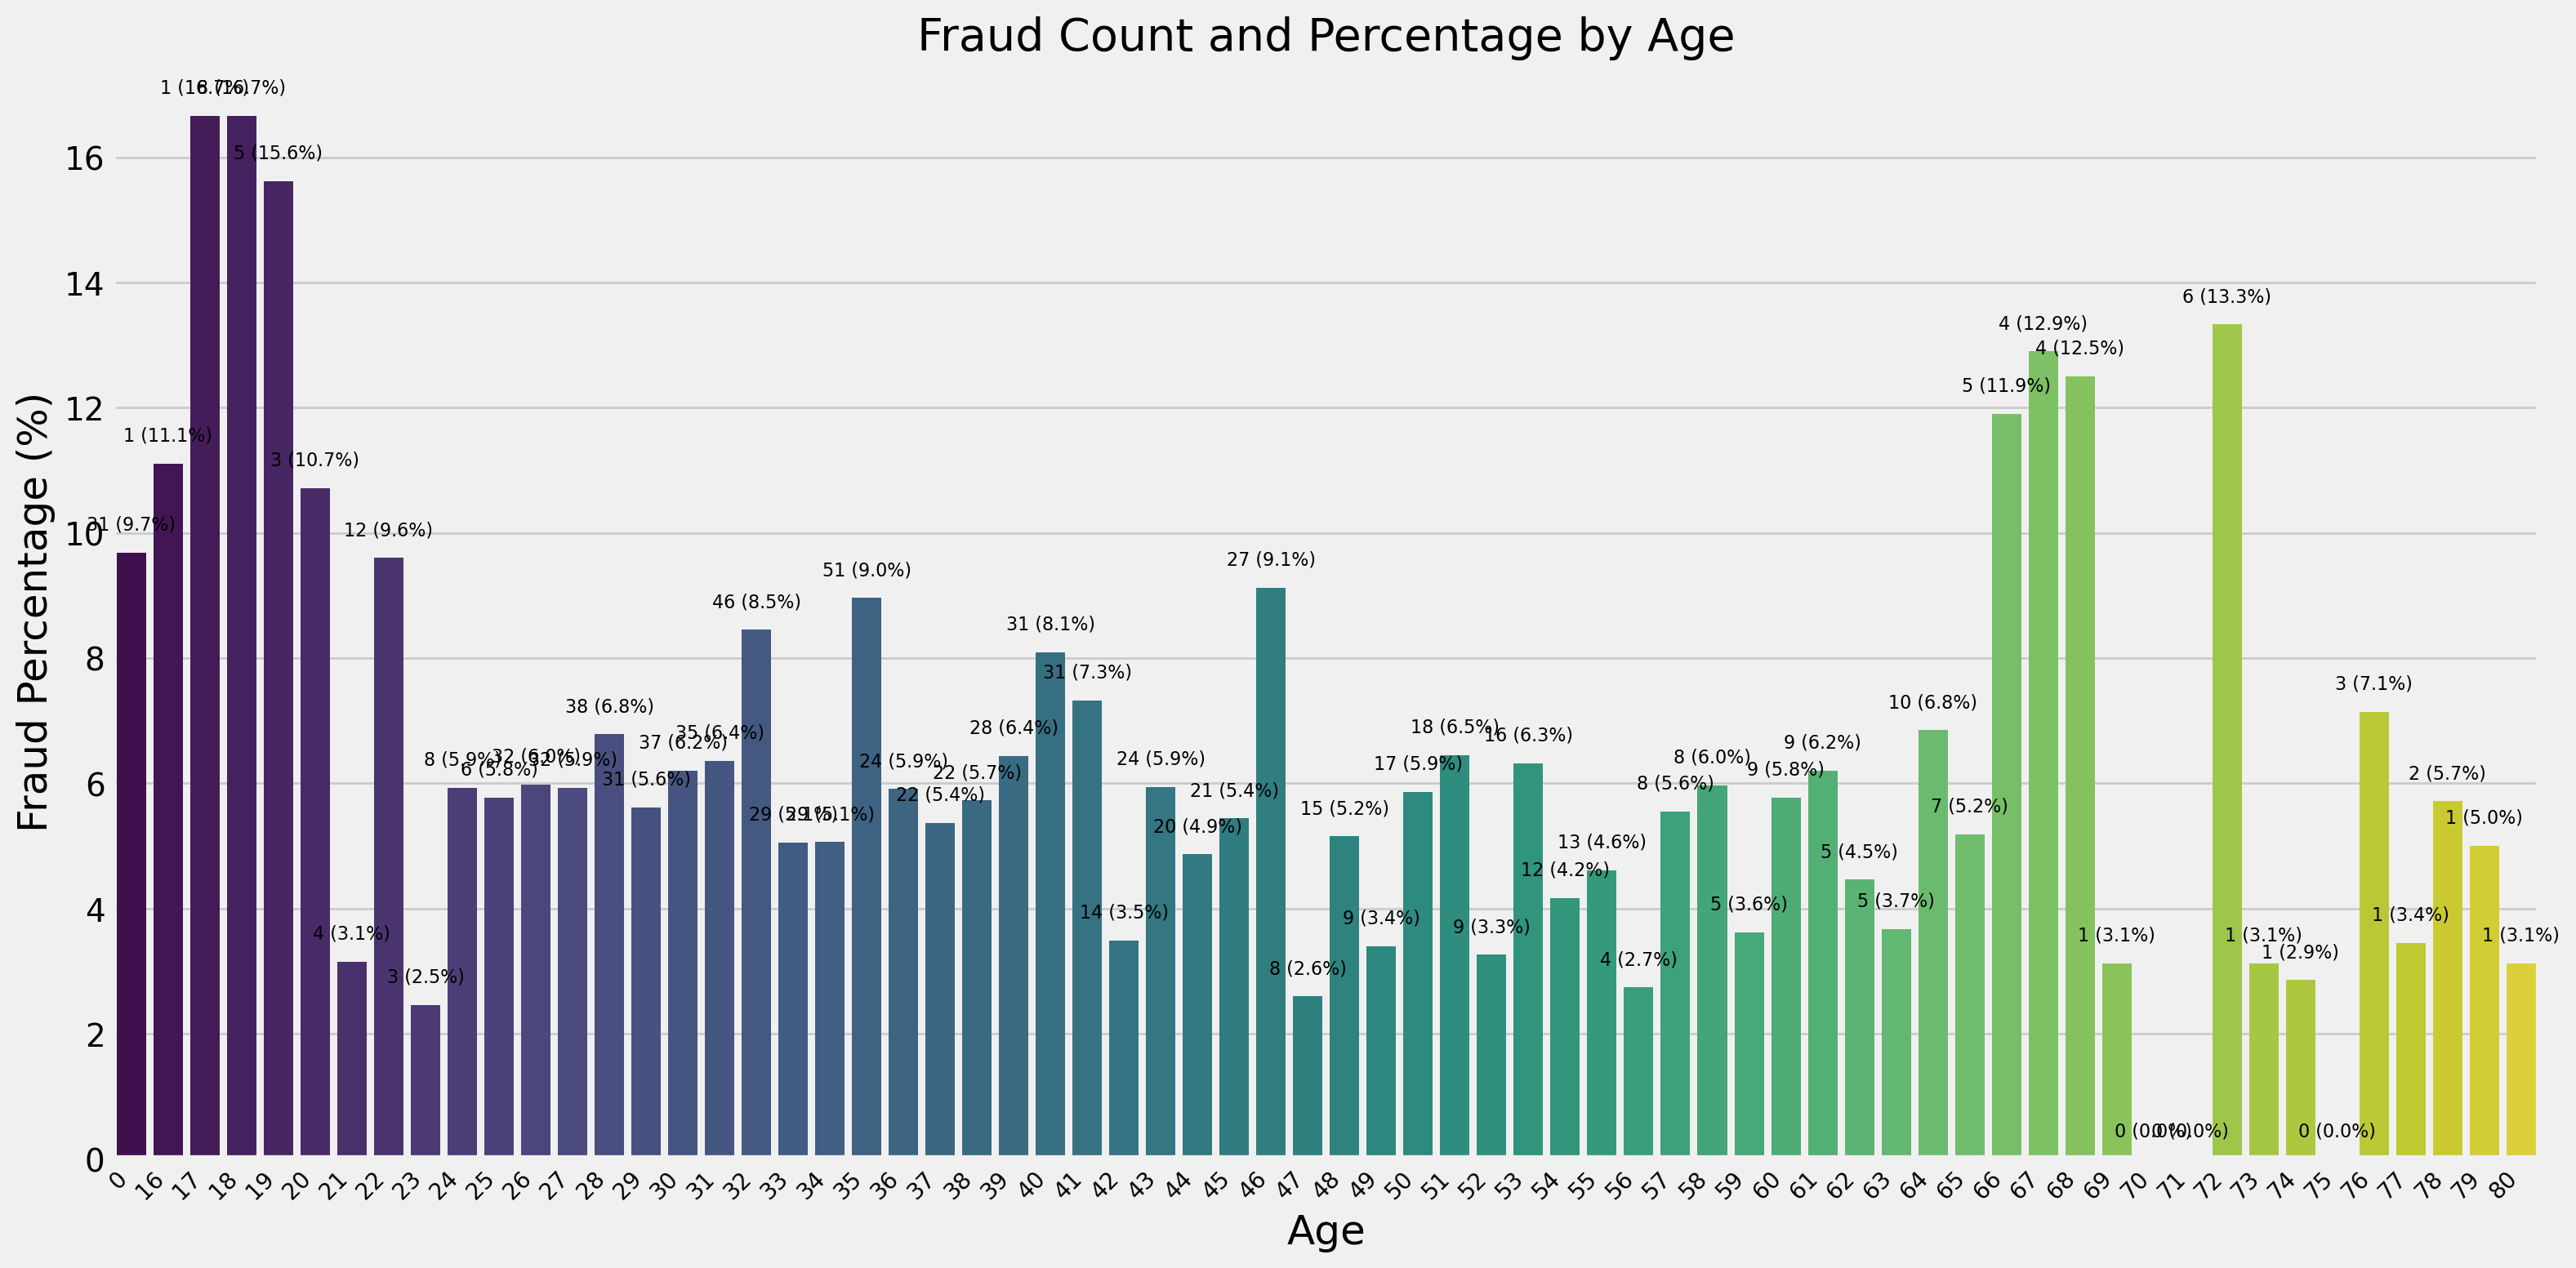

In [25]:
plot_fraud_percentage_bar(fraud, 'Age', sort_by=None)

- Fraud is more common among teenagers and retired seniors, as both groups often face limited financial resources, suggesting a link between financial power and fraud risk.

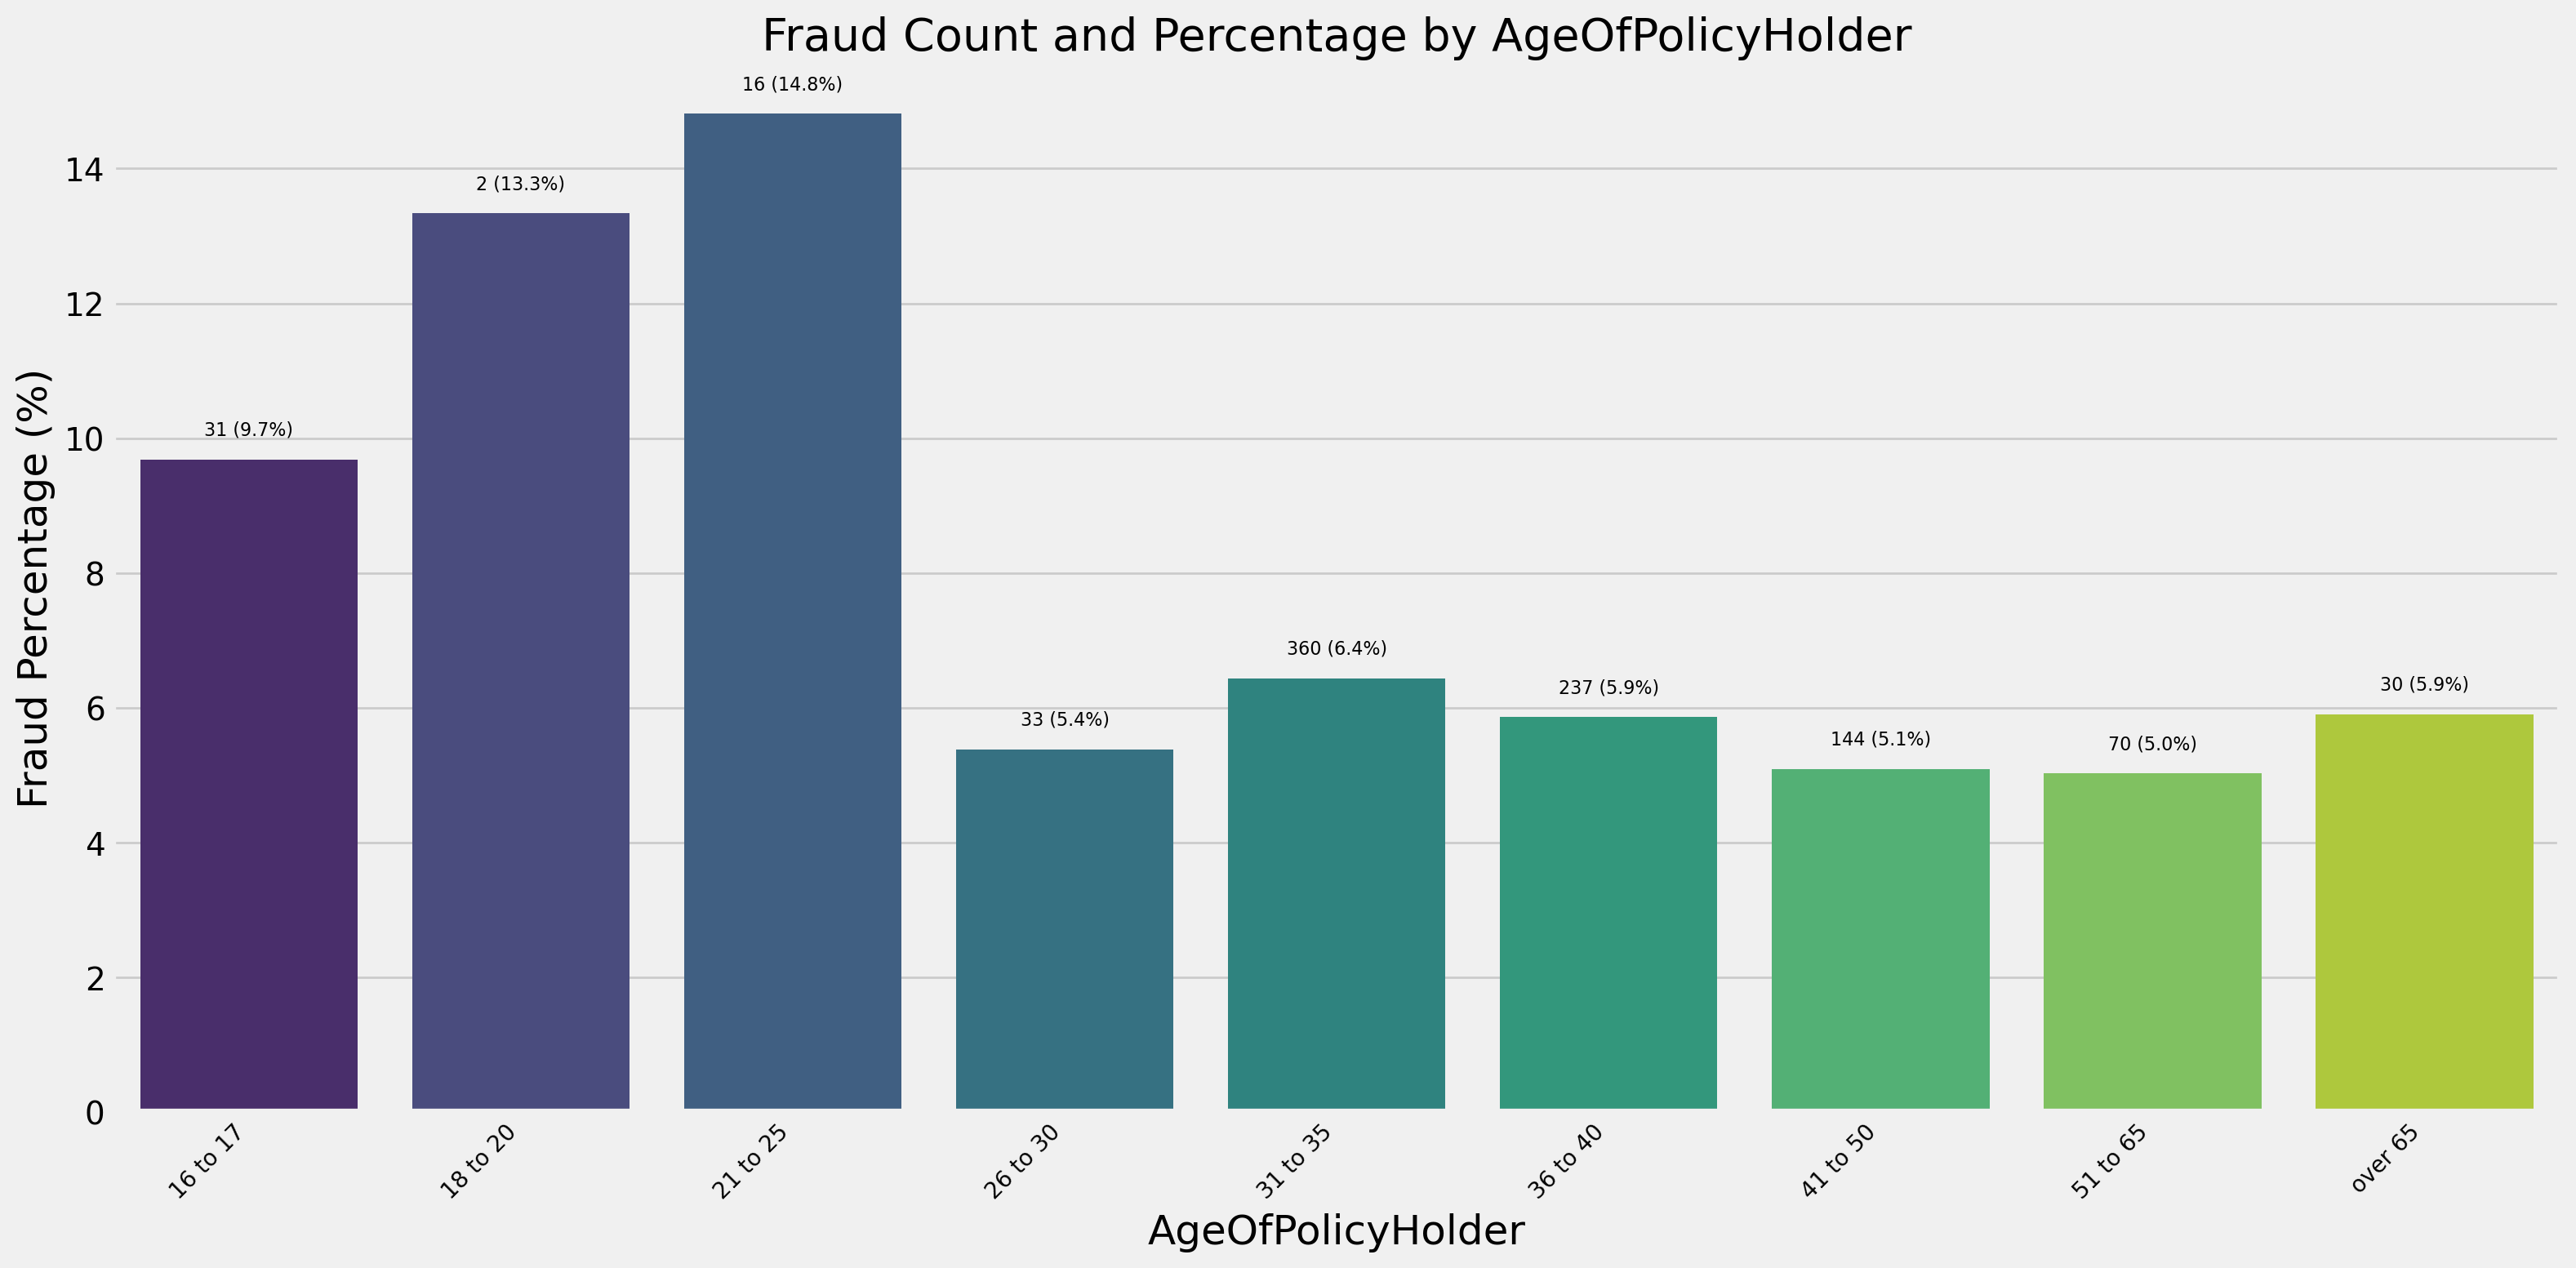

In [27]:
# Fraud detection by AgeOfPolicyHolder
plot_fraud_percentage_bar(fraud, 'AgeOfPolicyHolder', sort_by=None)

- The under-25 age group shows a high fraud rate in the "Age of Policy Holder" feature.

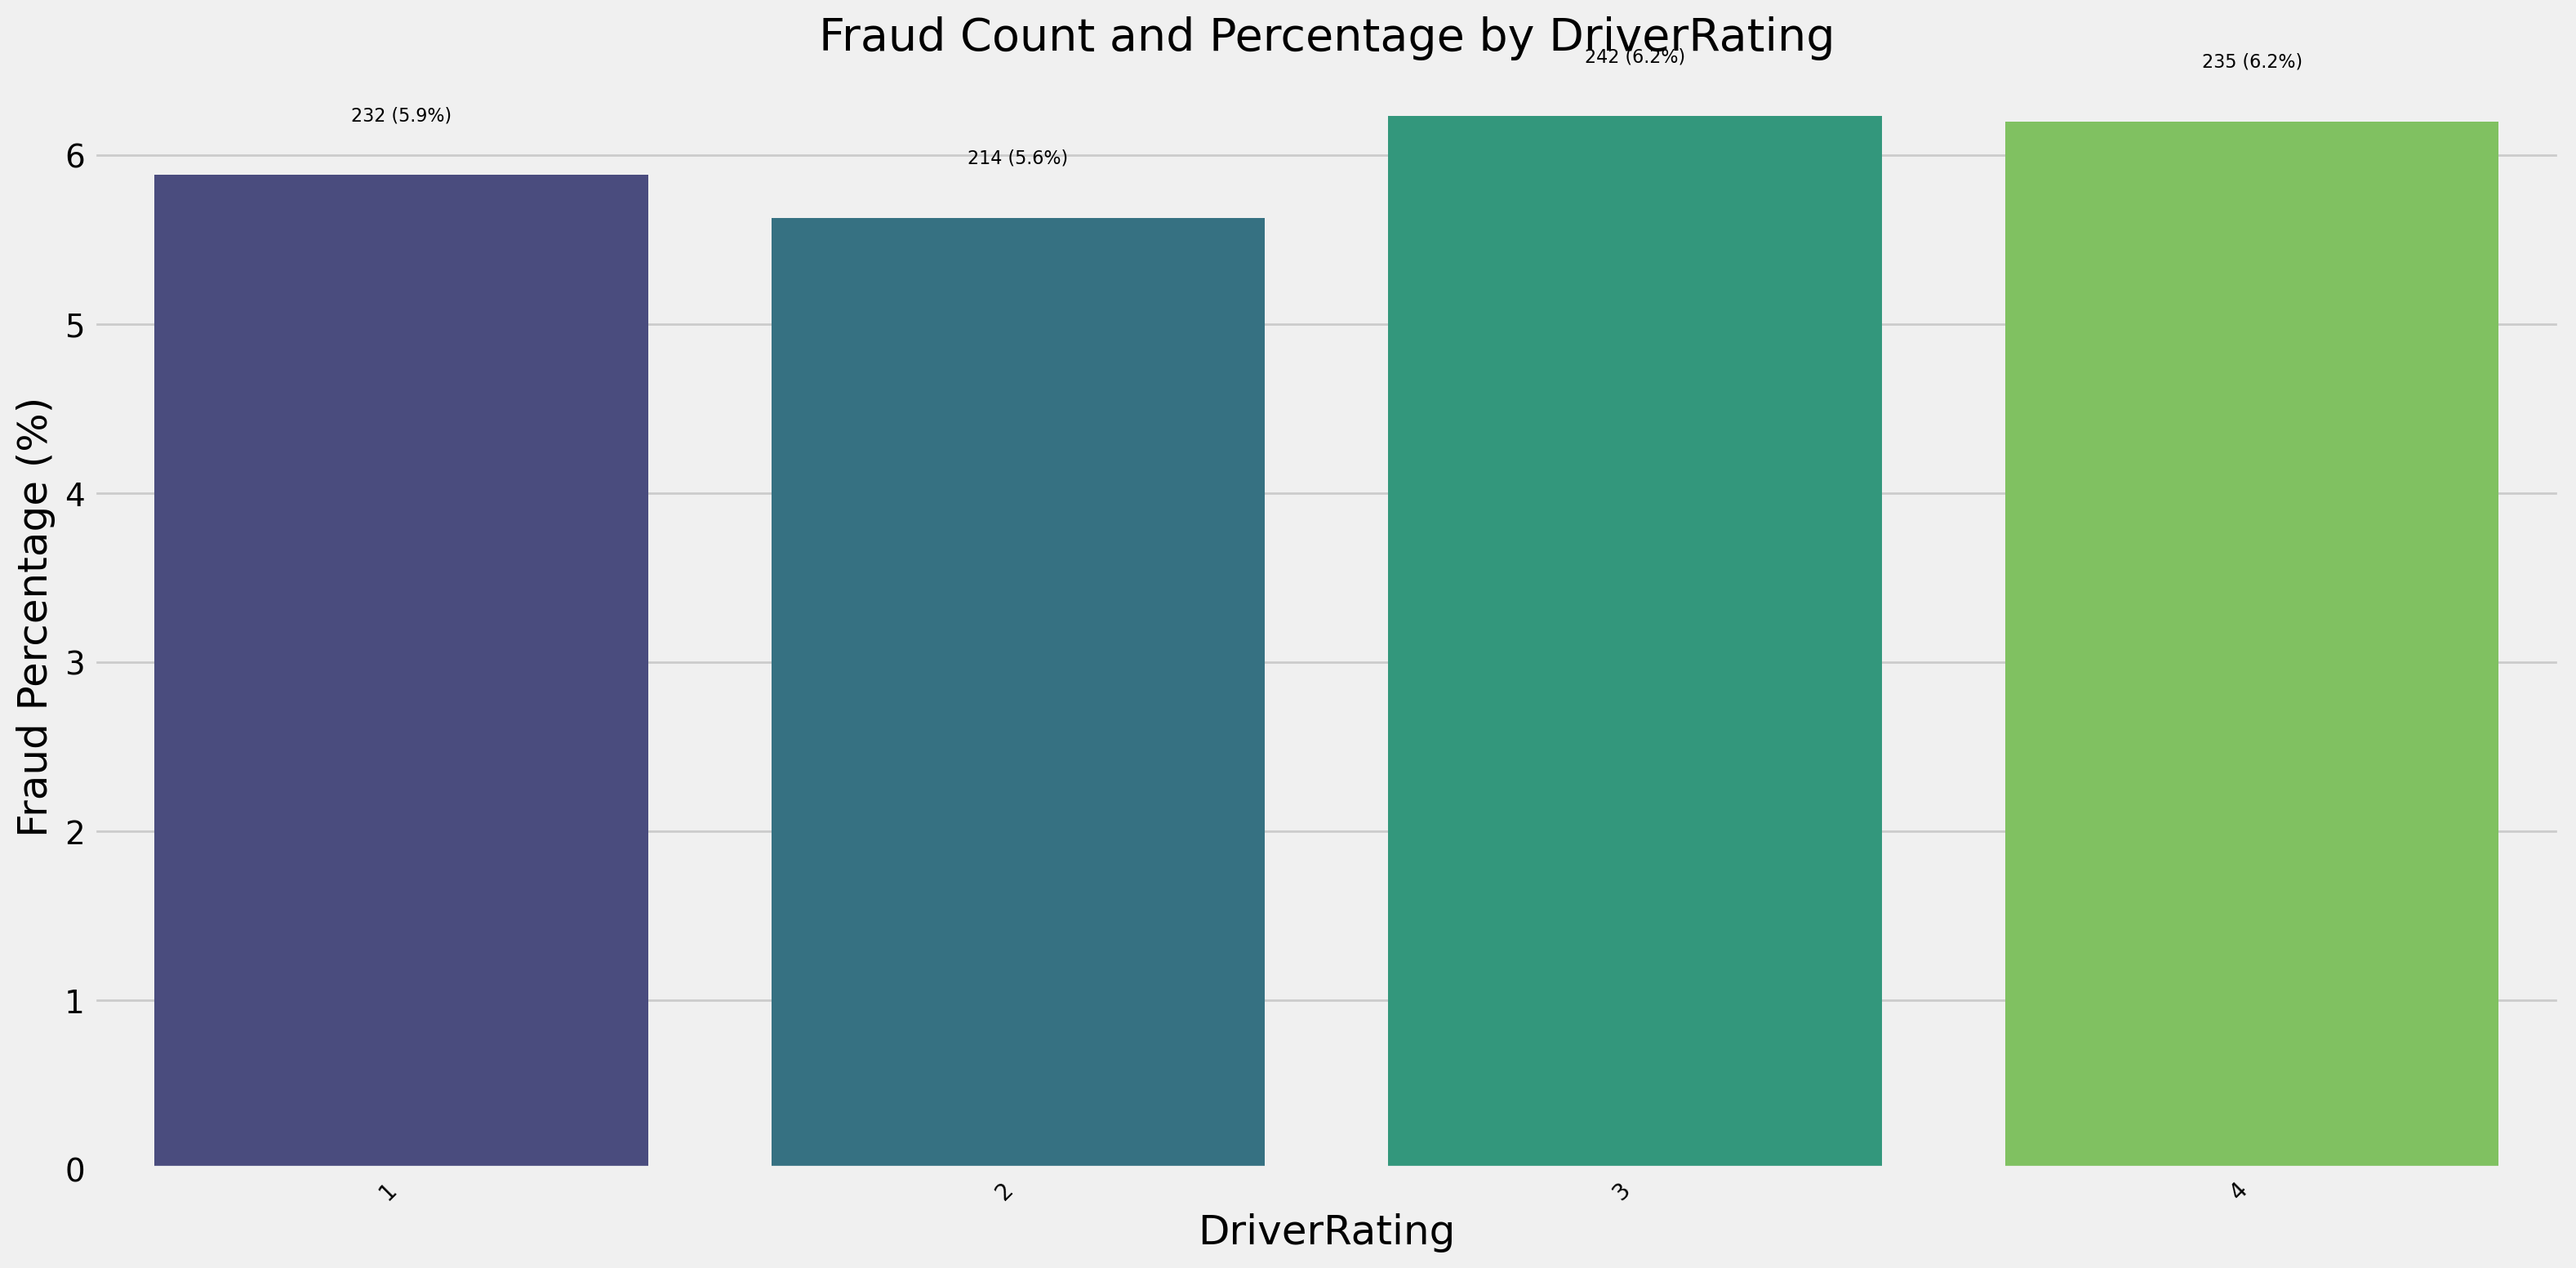

In [29]:
# Fraud detection by DriverRating
plot_fraud_percentage_bar(fraud, 'DriverRating', sort_by=None)

- The fraud rate does not vary significantly across different Driver Ratings

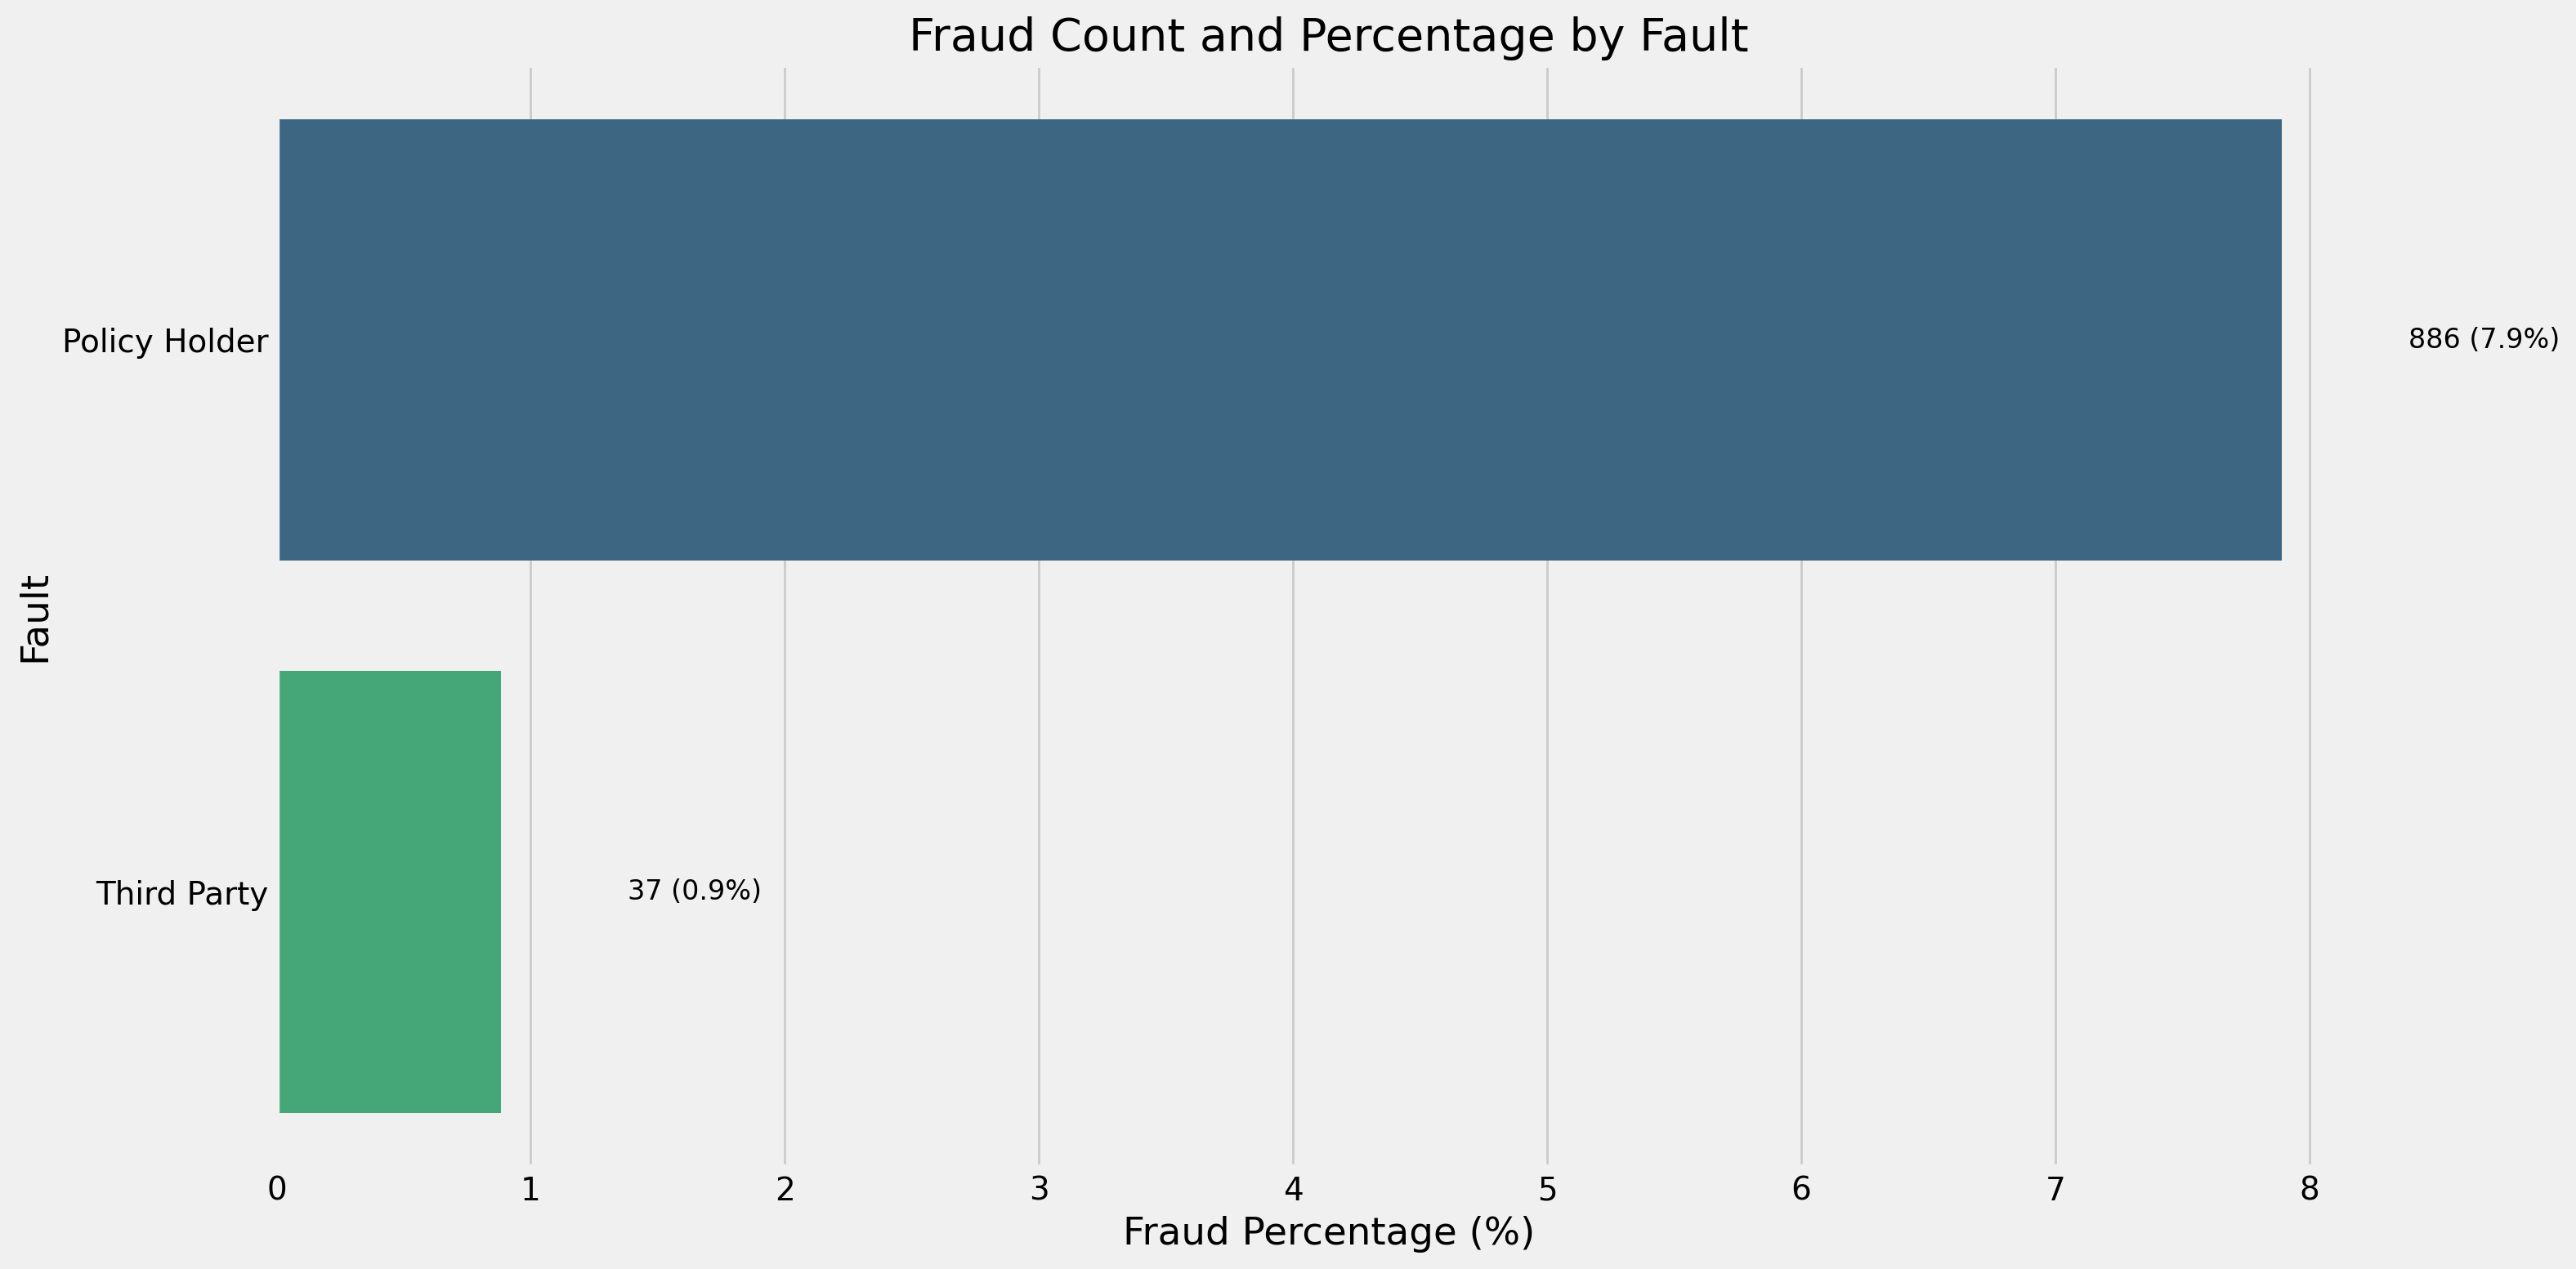

In [31]:
# Fraud detection by Fault
plot_fraud_percentage_bar(fraud, 'Fault', sort_by='percentage',  horizontal=True)

- The Policy Holder group shows a high fraud rate in the "Fault" feature.

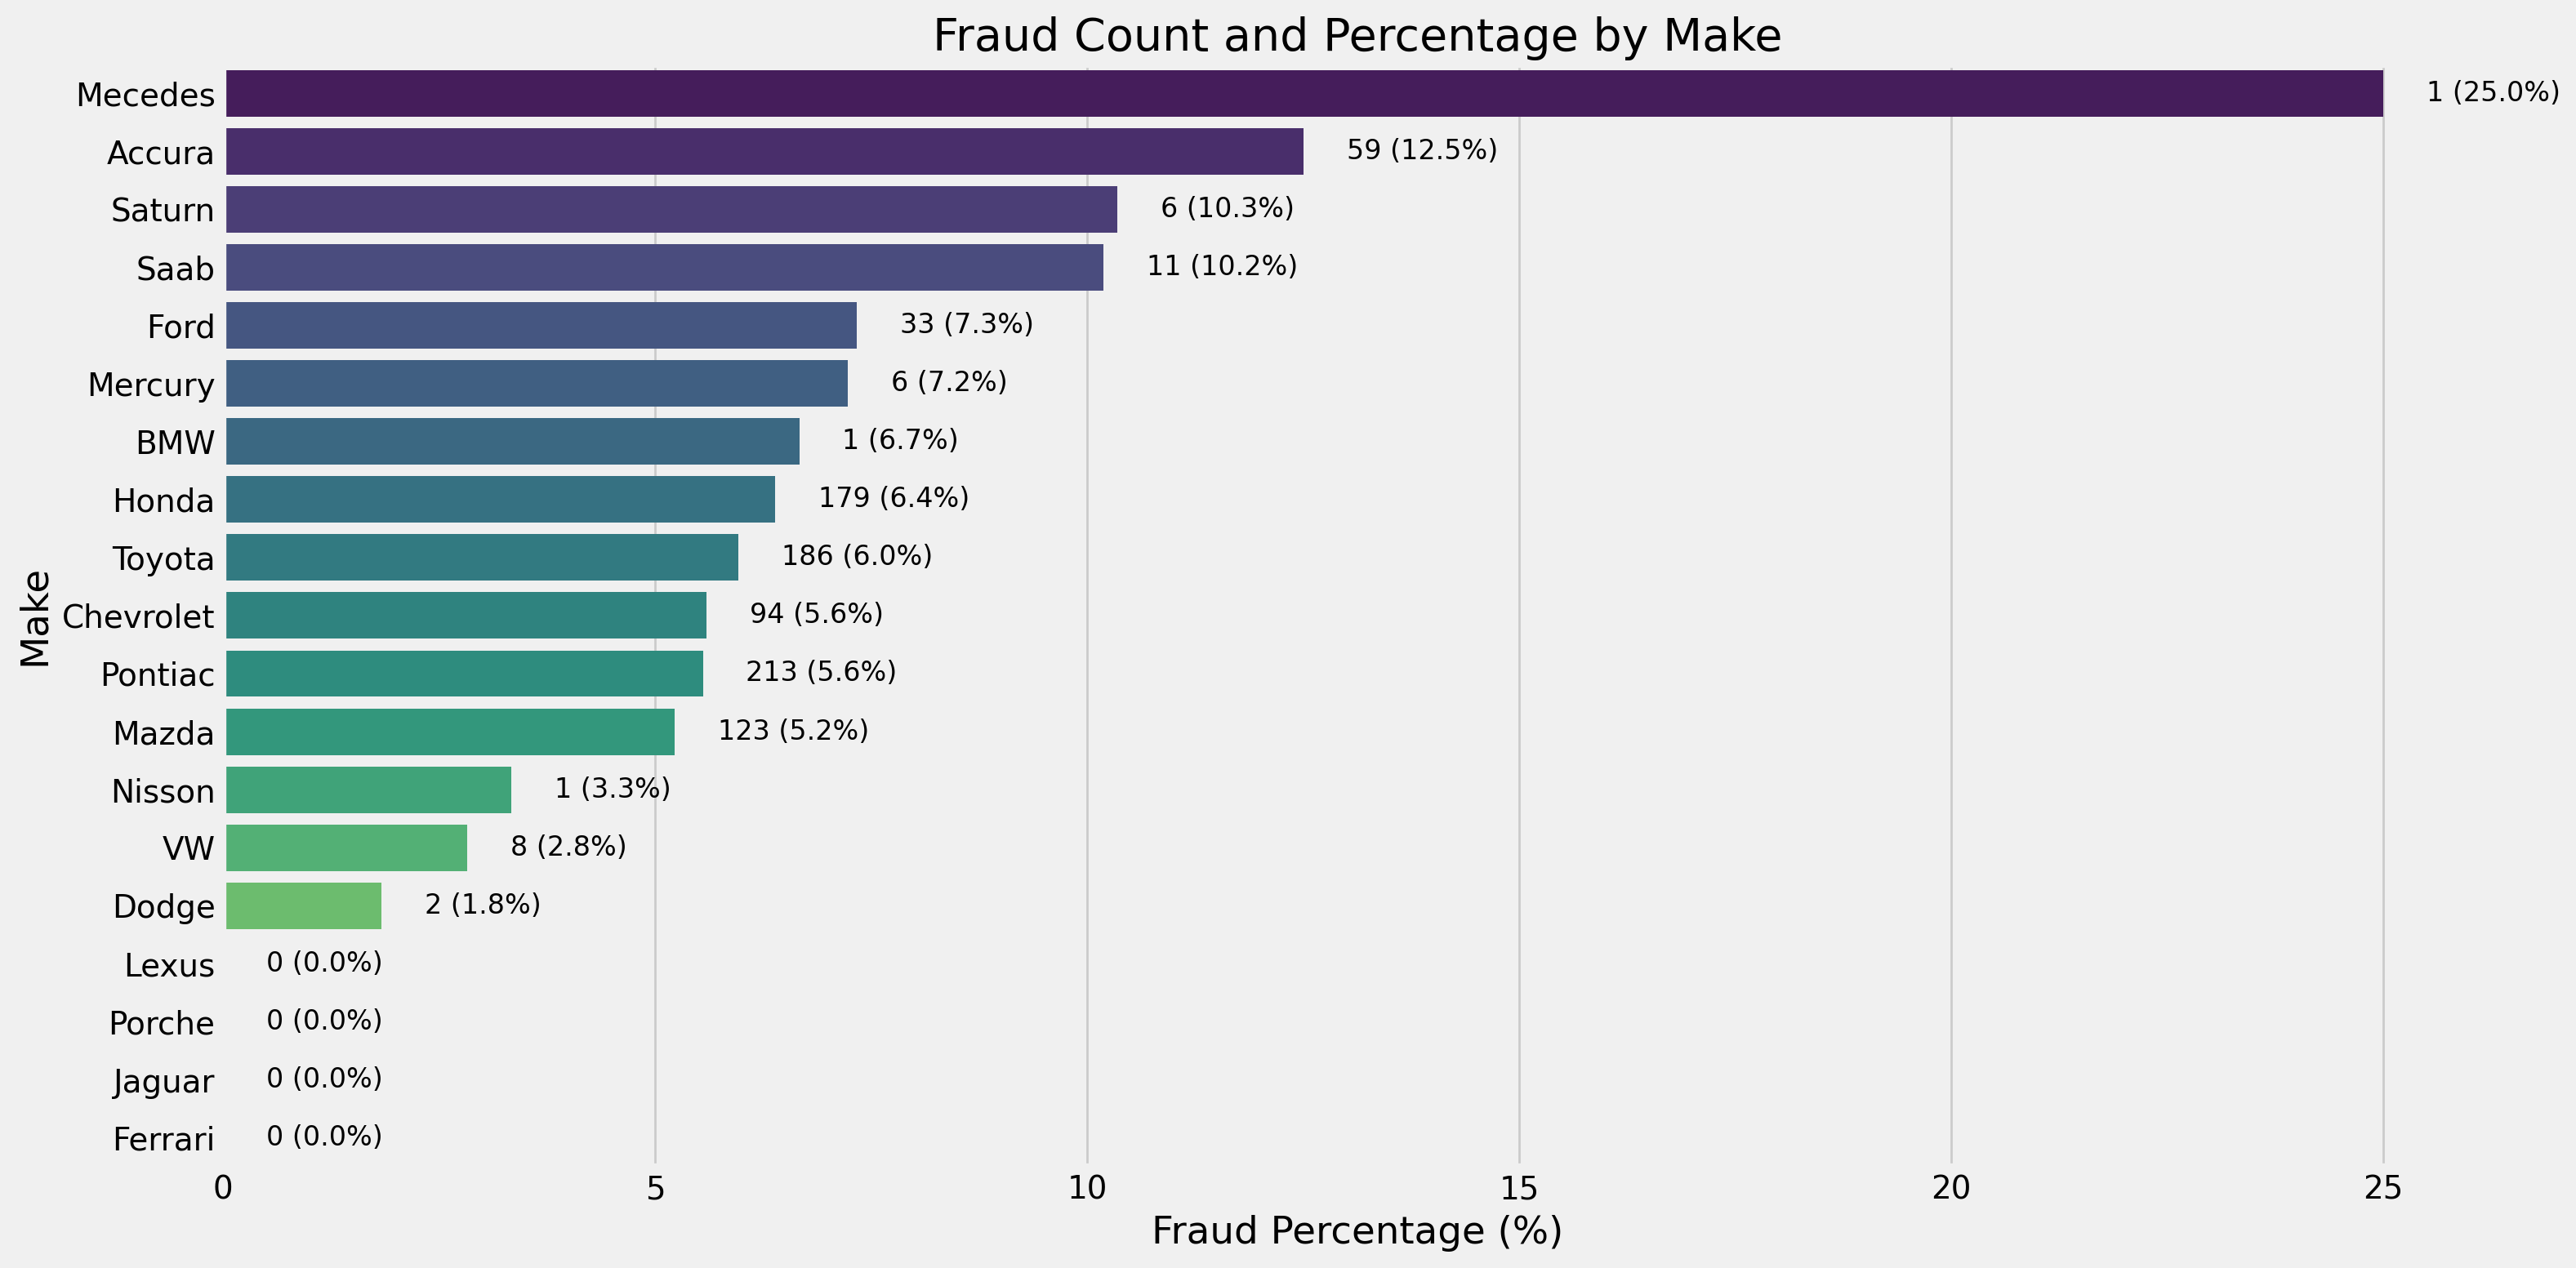

In [33]:
# Fraud detection by Make
plot_fraud_percentage_bar(fraud, 'Make', sort_by='percentage', horizontal=True)

- Mercedes owners are more likely to be involved in fraud, with nearly twice the incidence of the second-highest group, Acura owners. In contrast, Porsche, Lexus, Jaguar, and Ferrari owners have never been reported for fraud. 

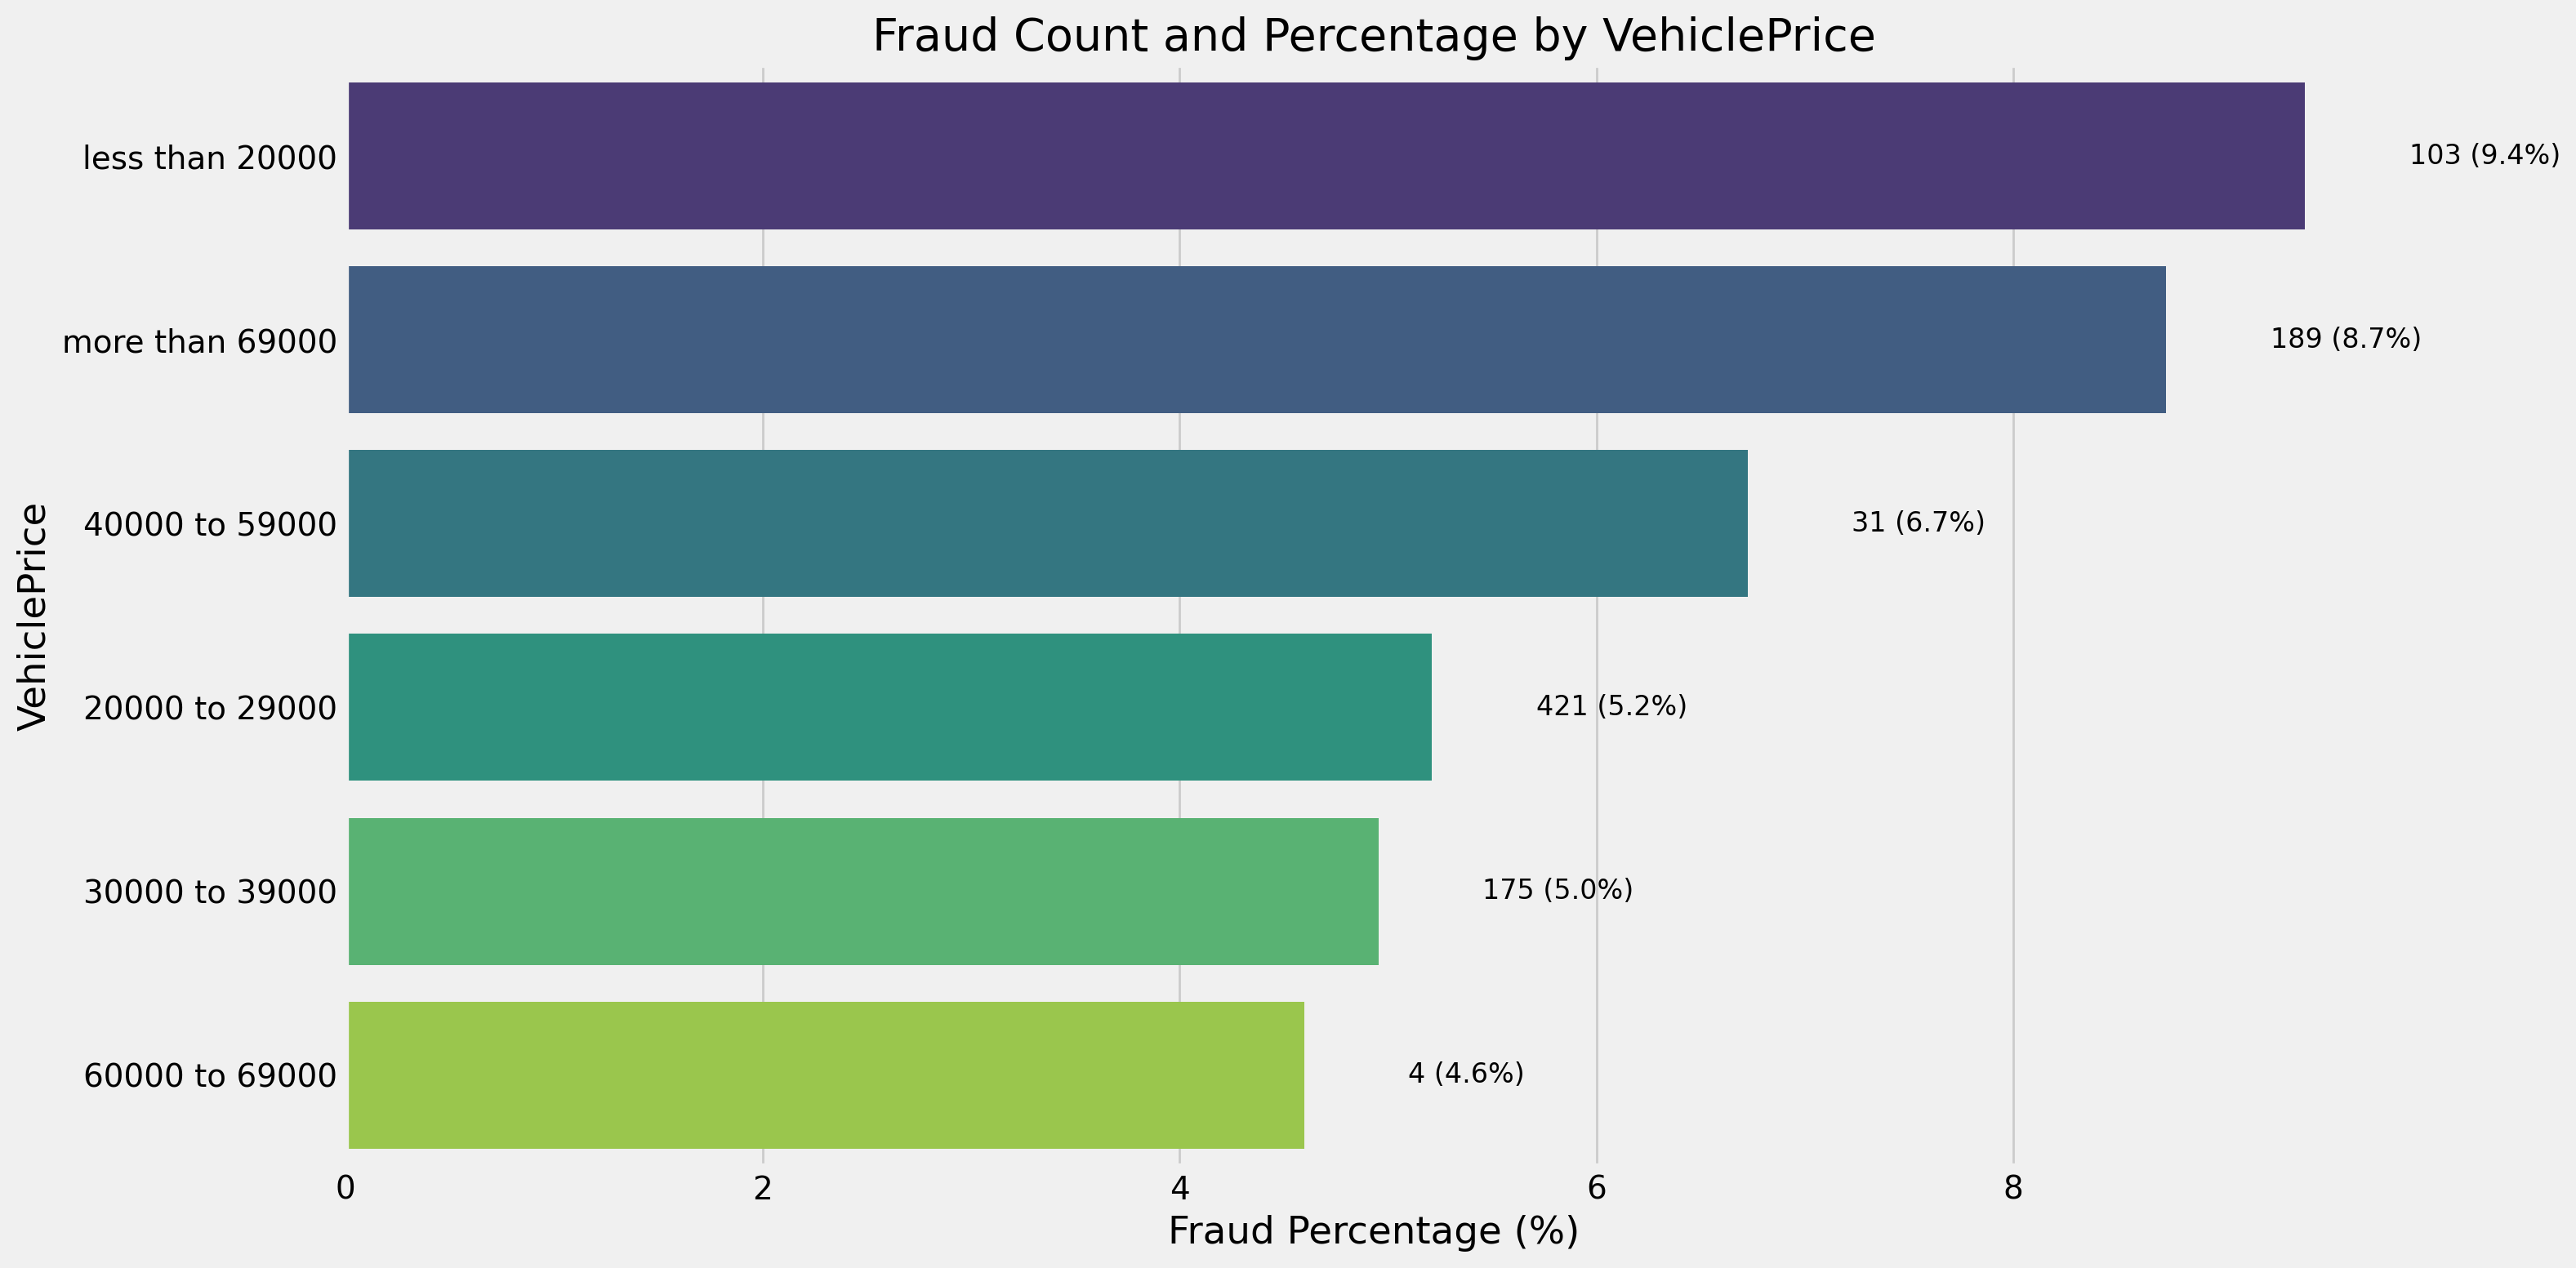

In [35]:
# Fraud detection by Vehicle Price
plot_fraud_percentage_bar(fraud, 'VehiclePrice', sort_by='percentage', horizontal=True)

- Fraudulent cases are most frequently detected in either the most expensive or the cheapest vehicle categories. Since the categories "more than 69,000" and "less than 20,000" have the highest fraud rates, the feature can be treated as binary rather than ordinal, as it doesn't follow an ordinal pattern.

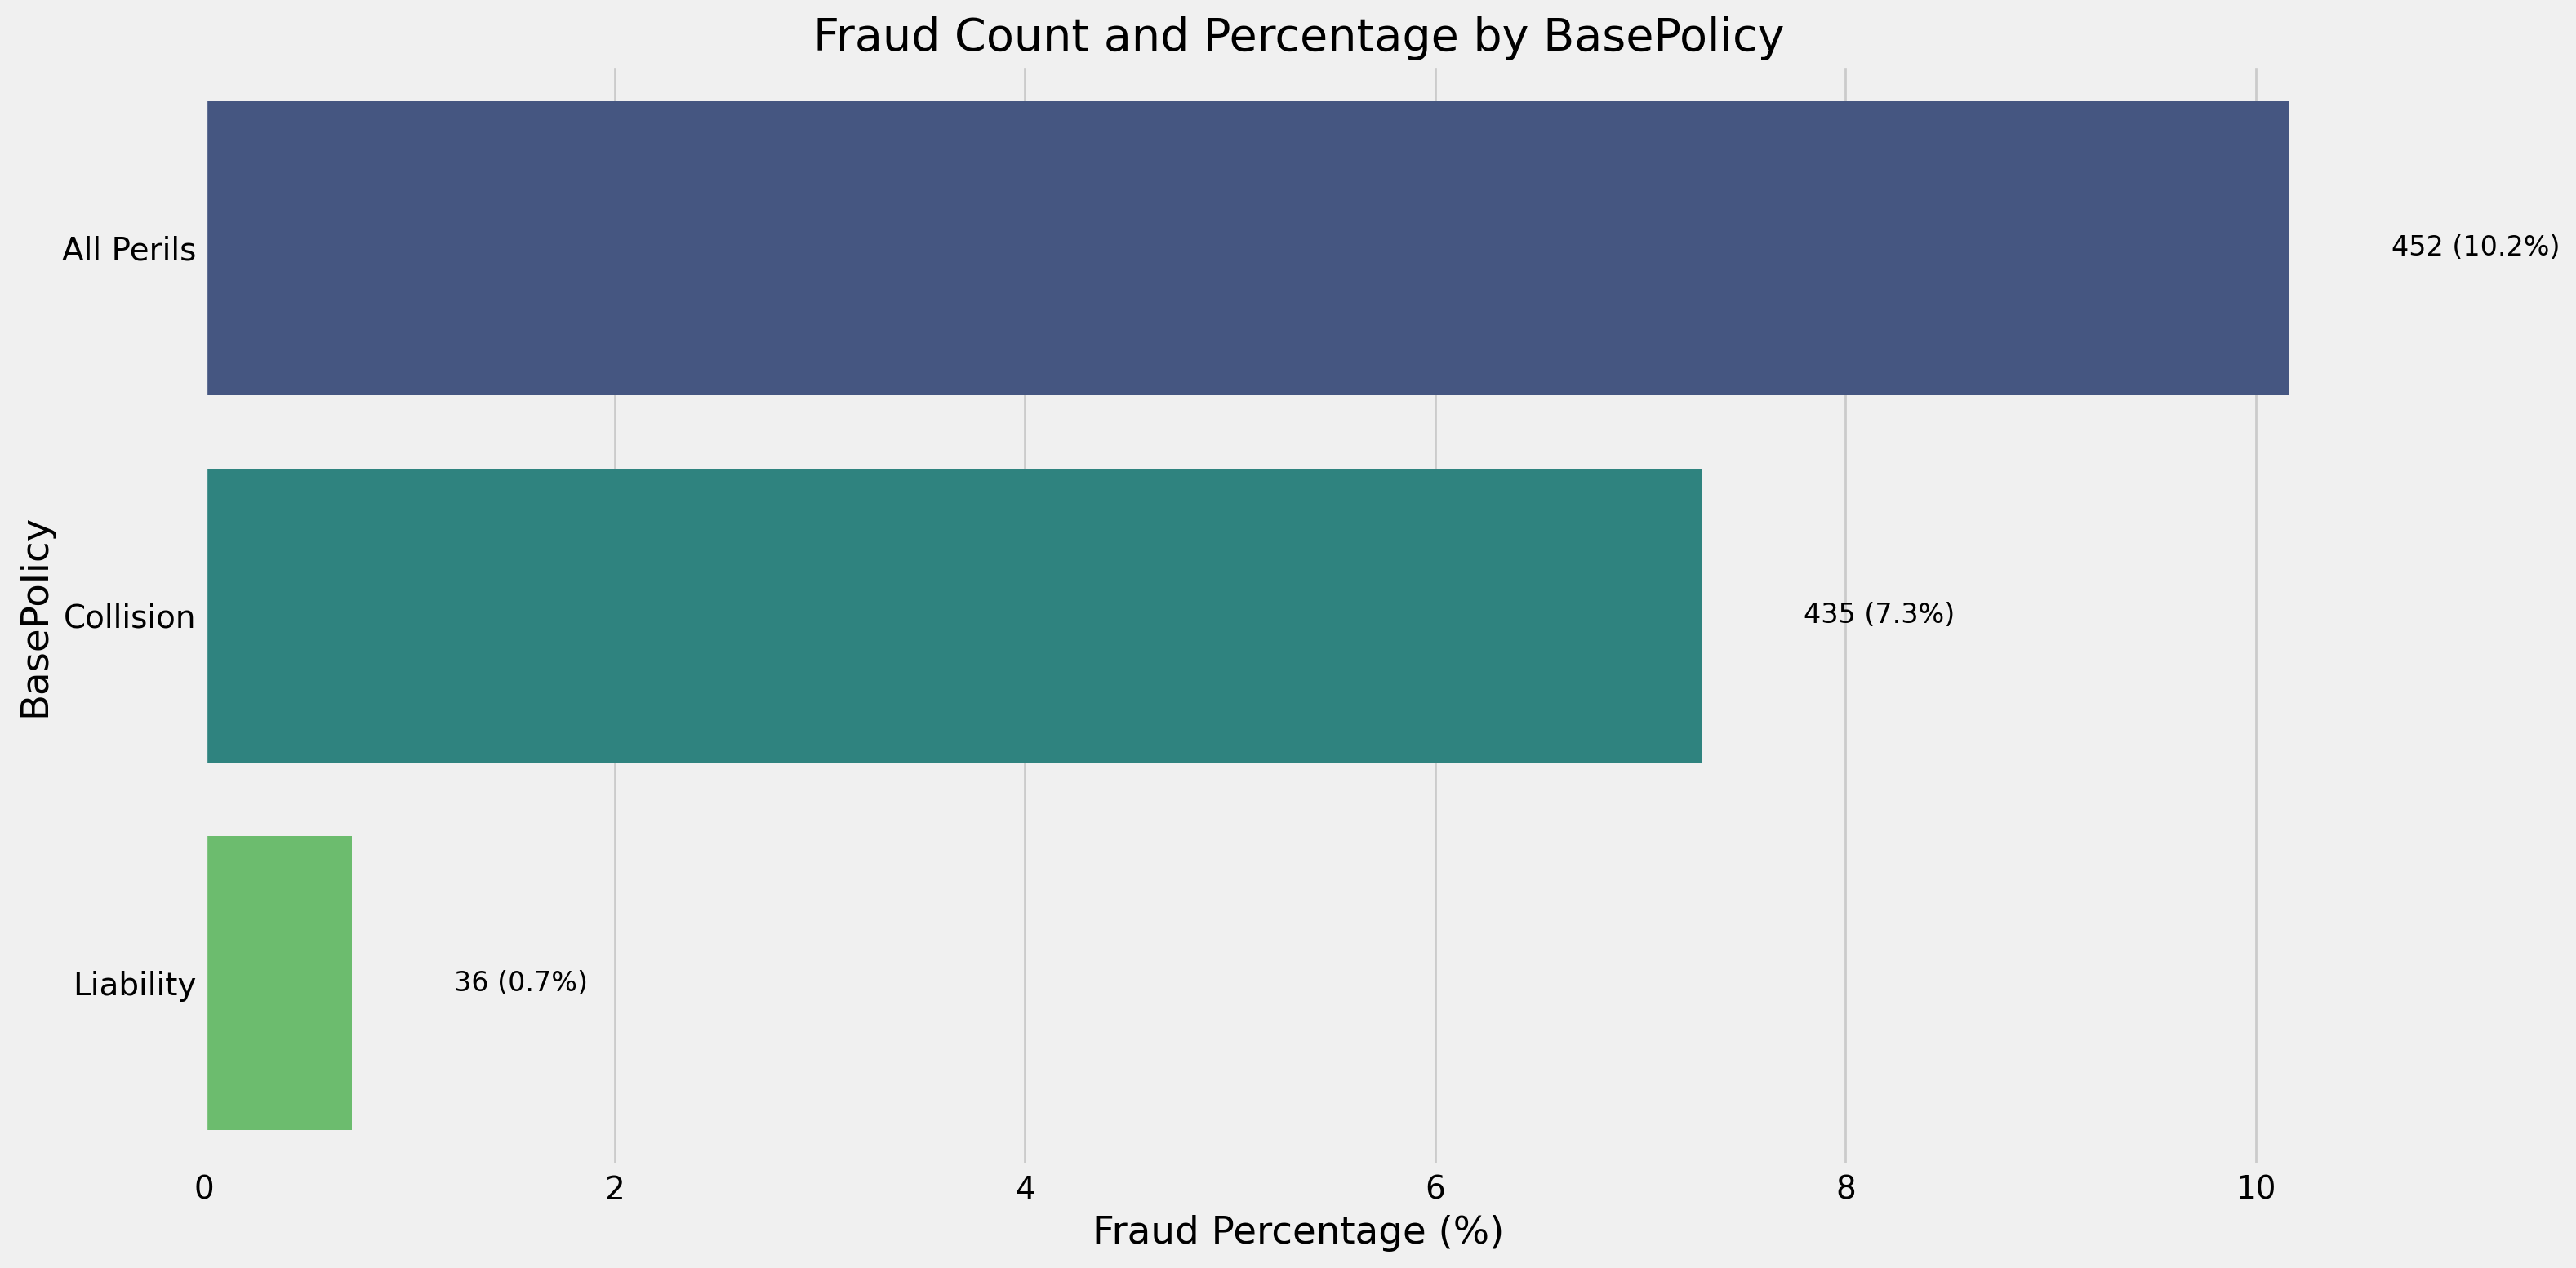

In [37]:
# Fraud detection by Base Policy
plot_fraud_percentage_bar(fraud, 'BasePolicy', sort_by='percentage', horizontal=True)

- Fraudulent cases were most commonly detected under the "All Perils" coverage.

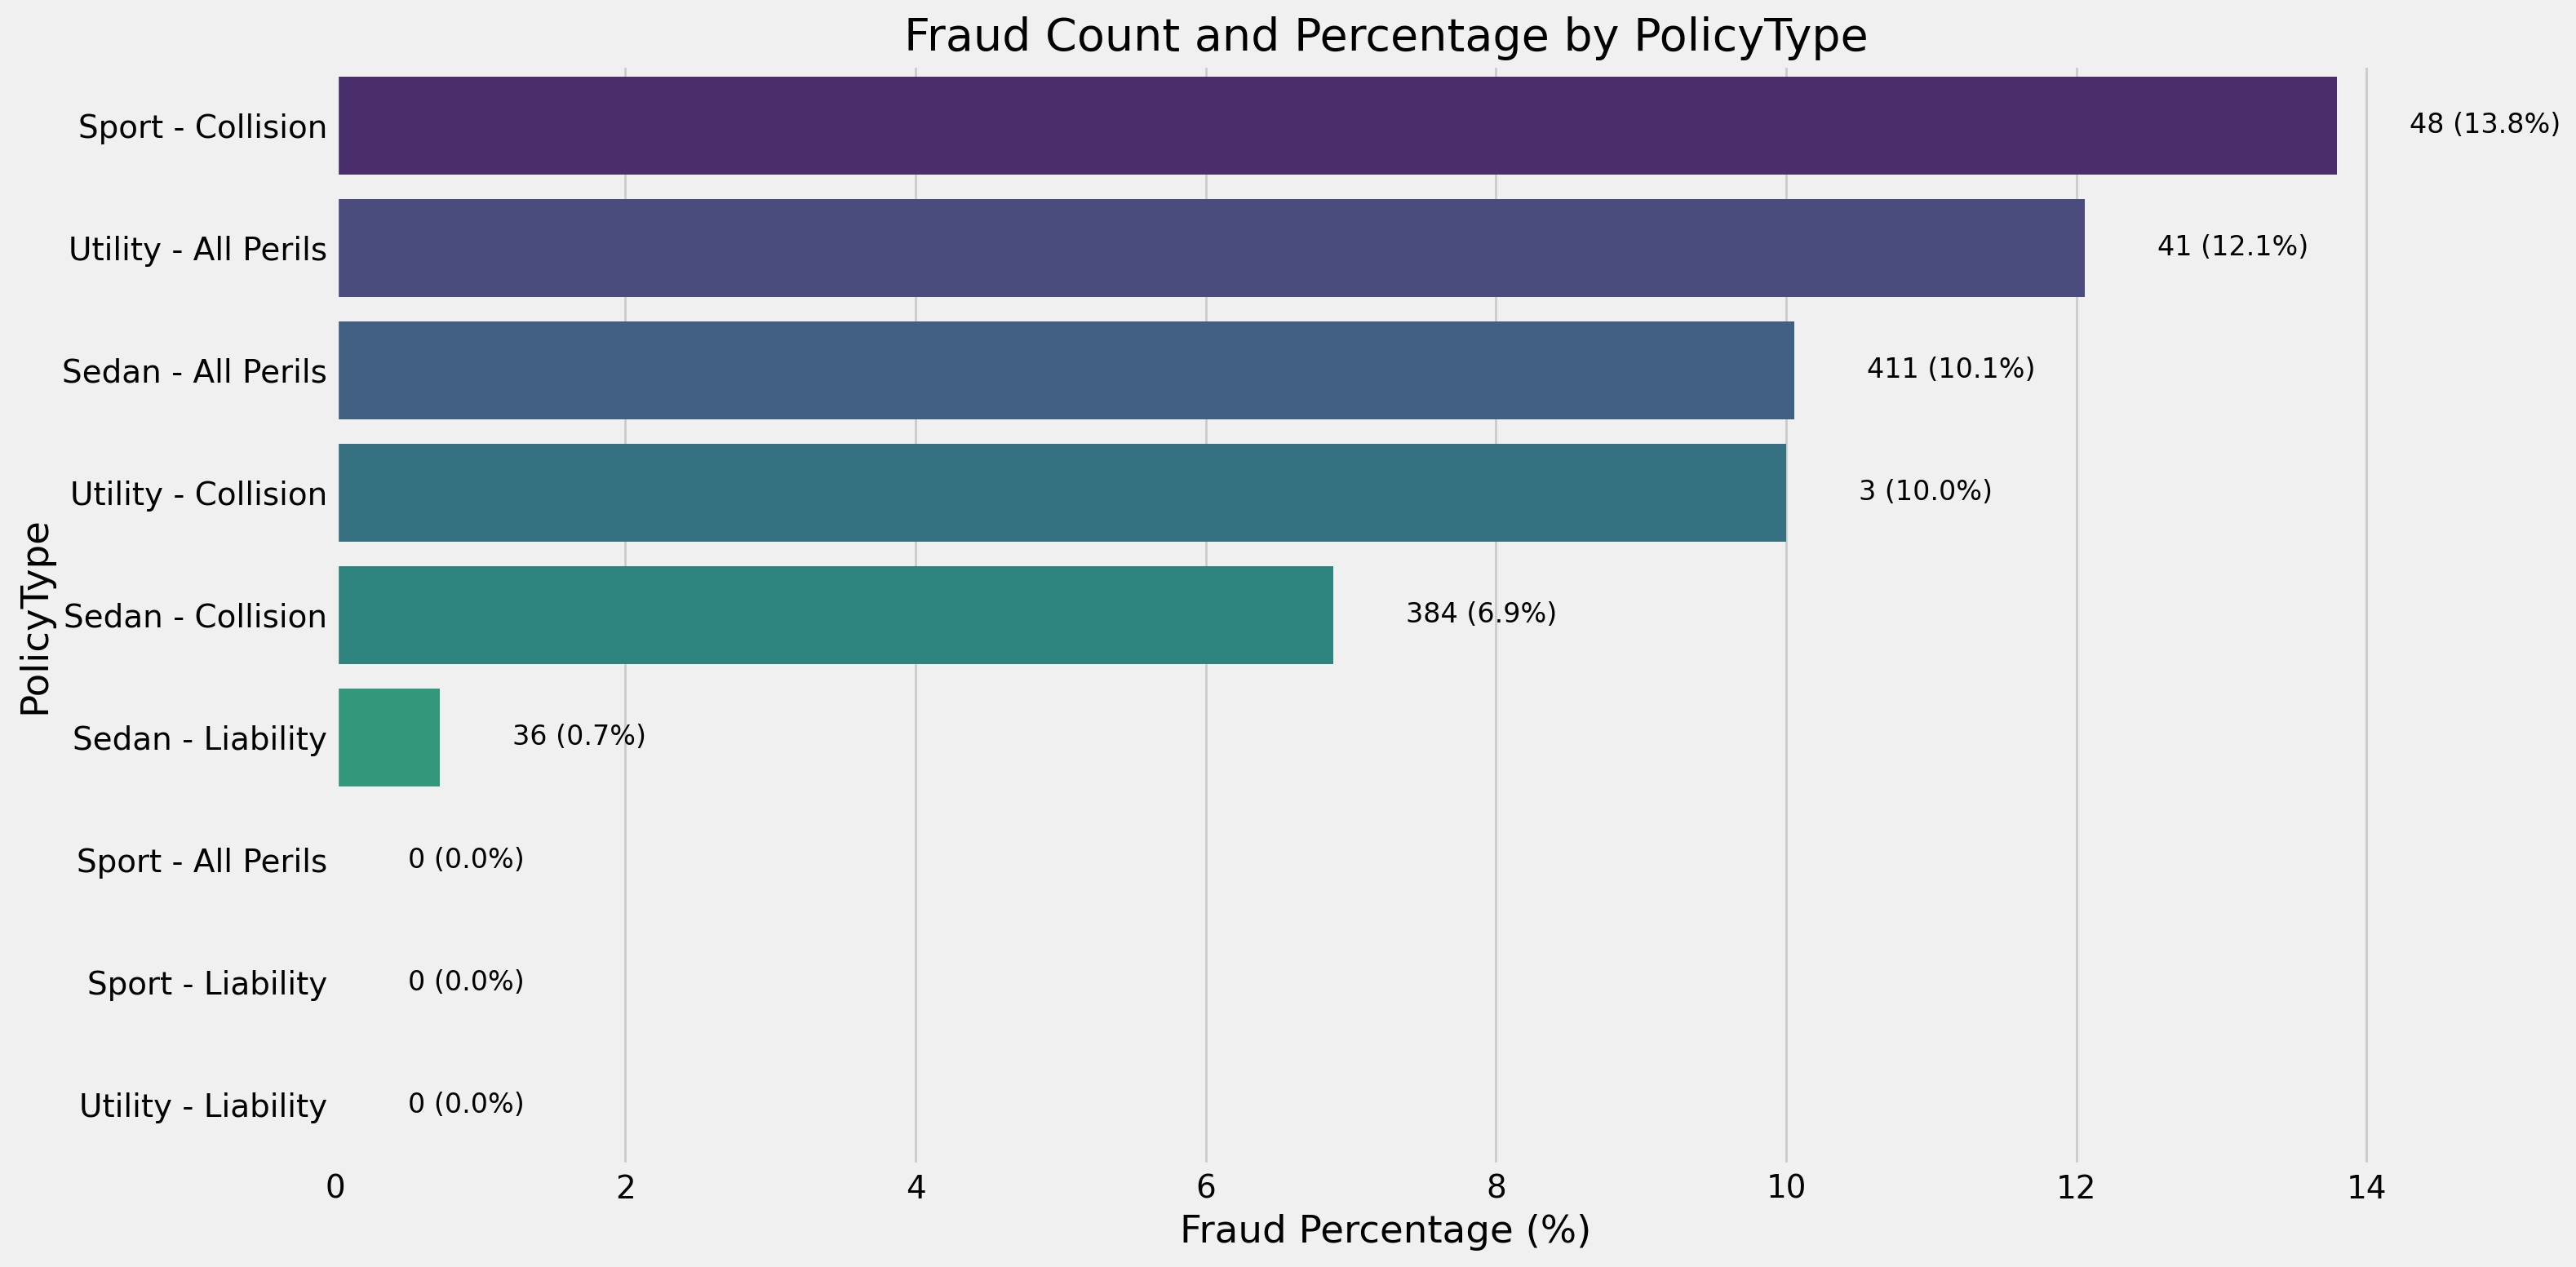

In [39]:
# Fraud detection by Base Policy
plot_fraud_percentage_bar(fraud, 'PolicyType', sort_by='percentage', horizontal=True)

- Among specific policy types, "Sport-Collision" had the highest fraud detection rate.

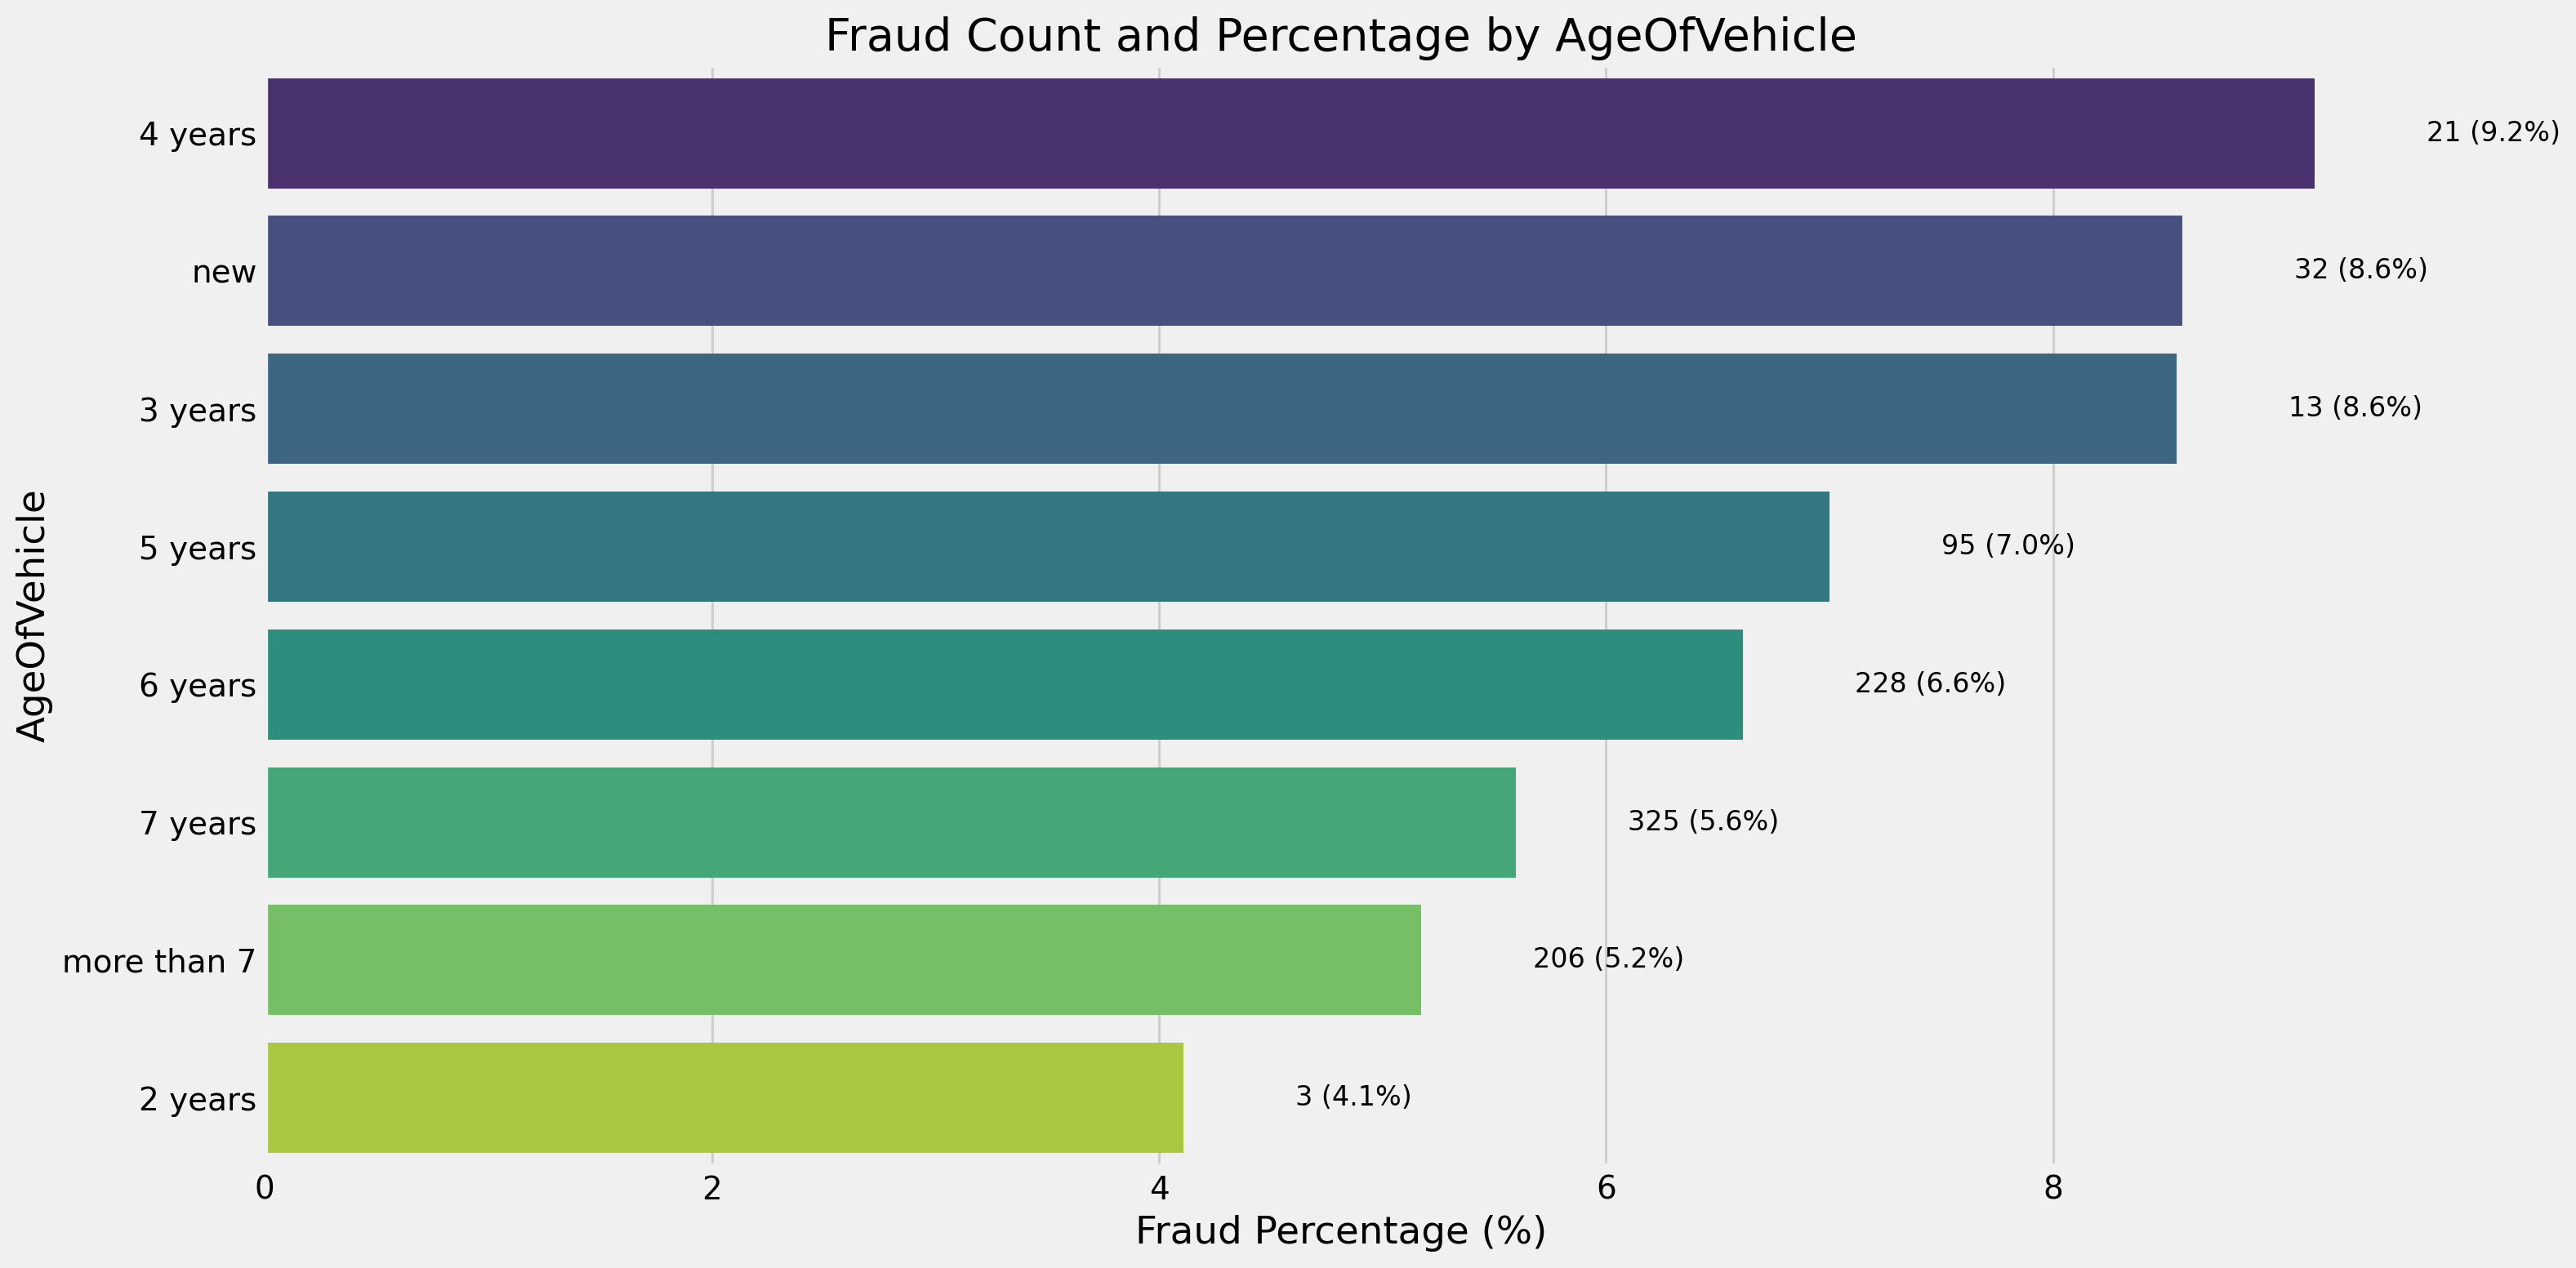

In [41]:
# Fraud detection by Age of Vehicle
plot_fraud_percentage_bar(fraud, 'AgeOfVehicle', sort_by='percentage', horizontal=True)

- The "AgeOfVehicle" feature can be reclassified into three categories: high, medium, and low fraud groups.

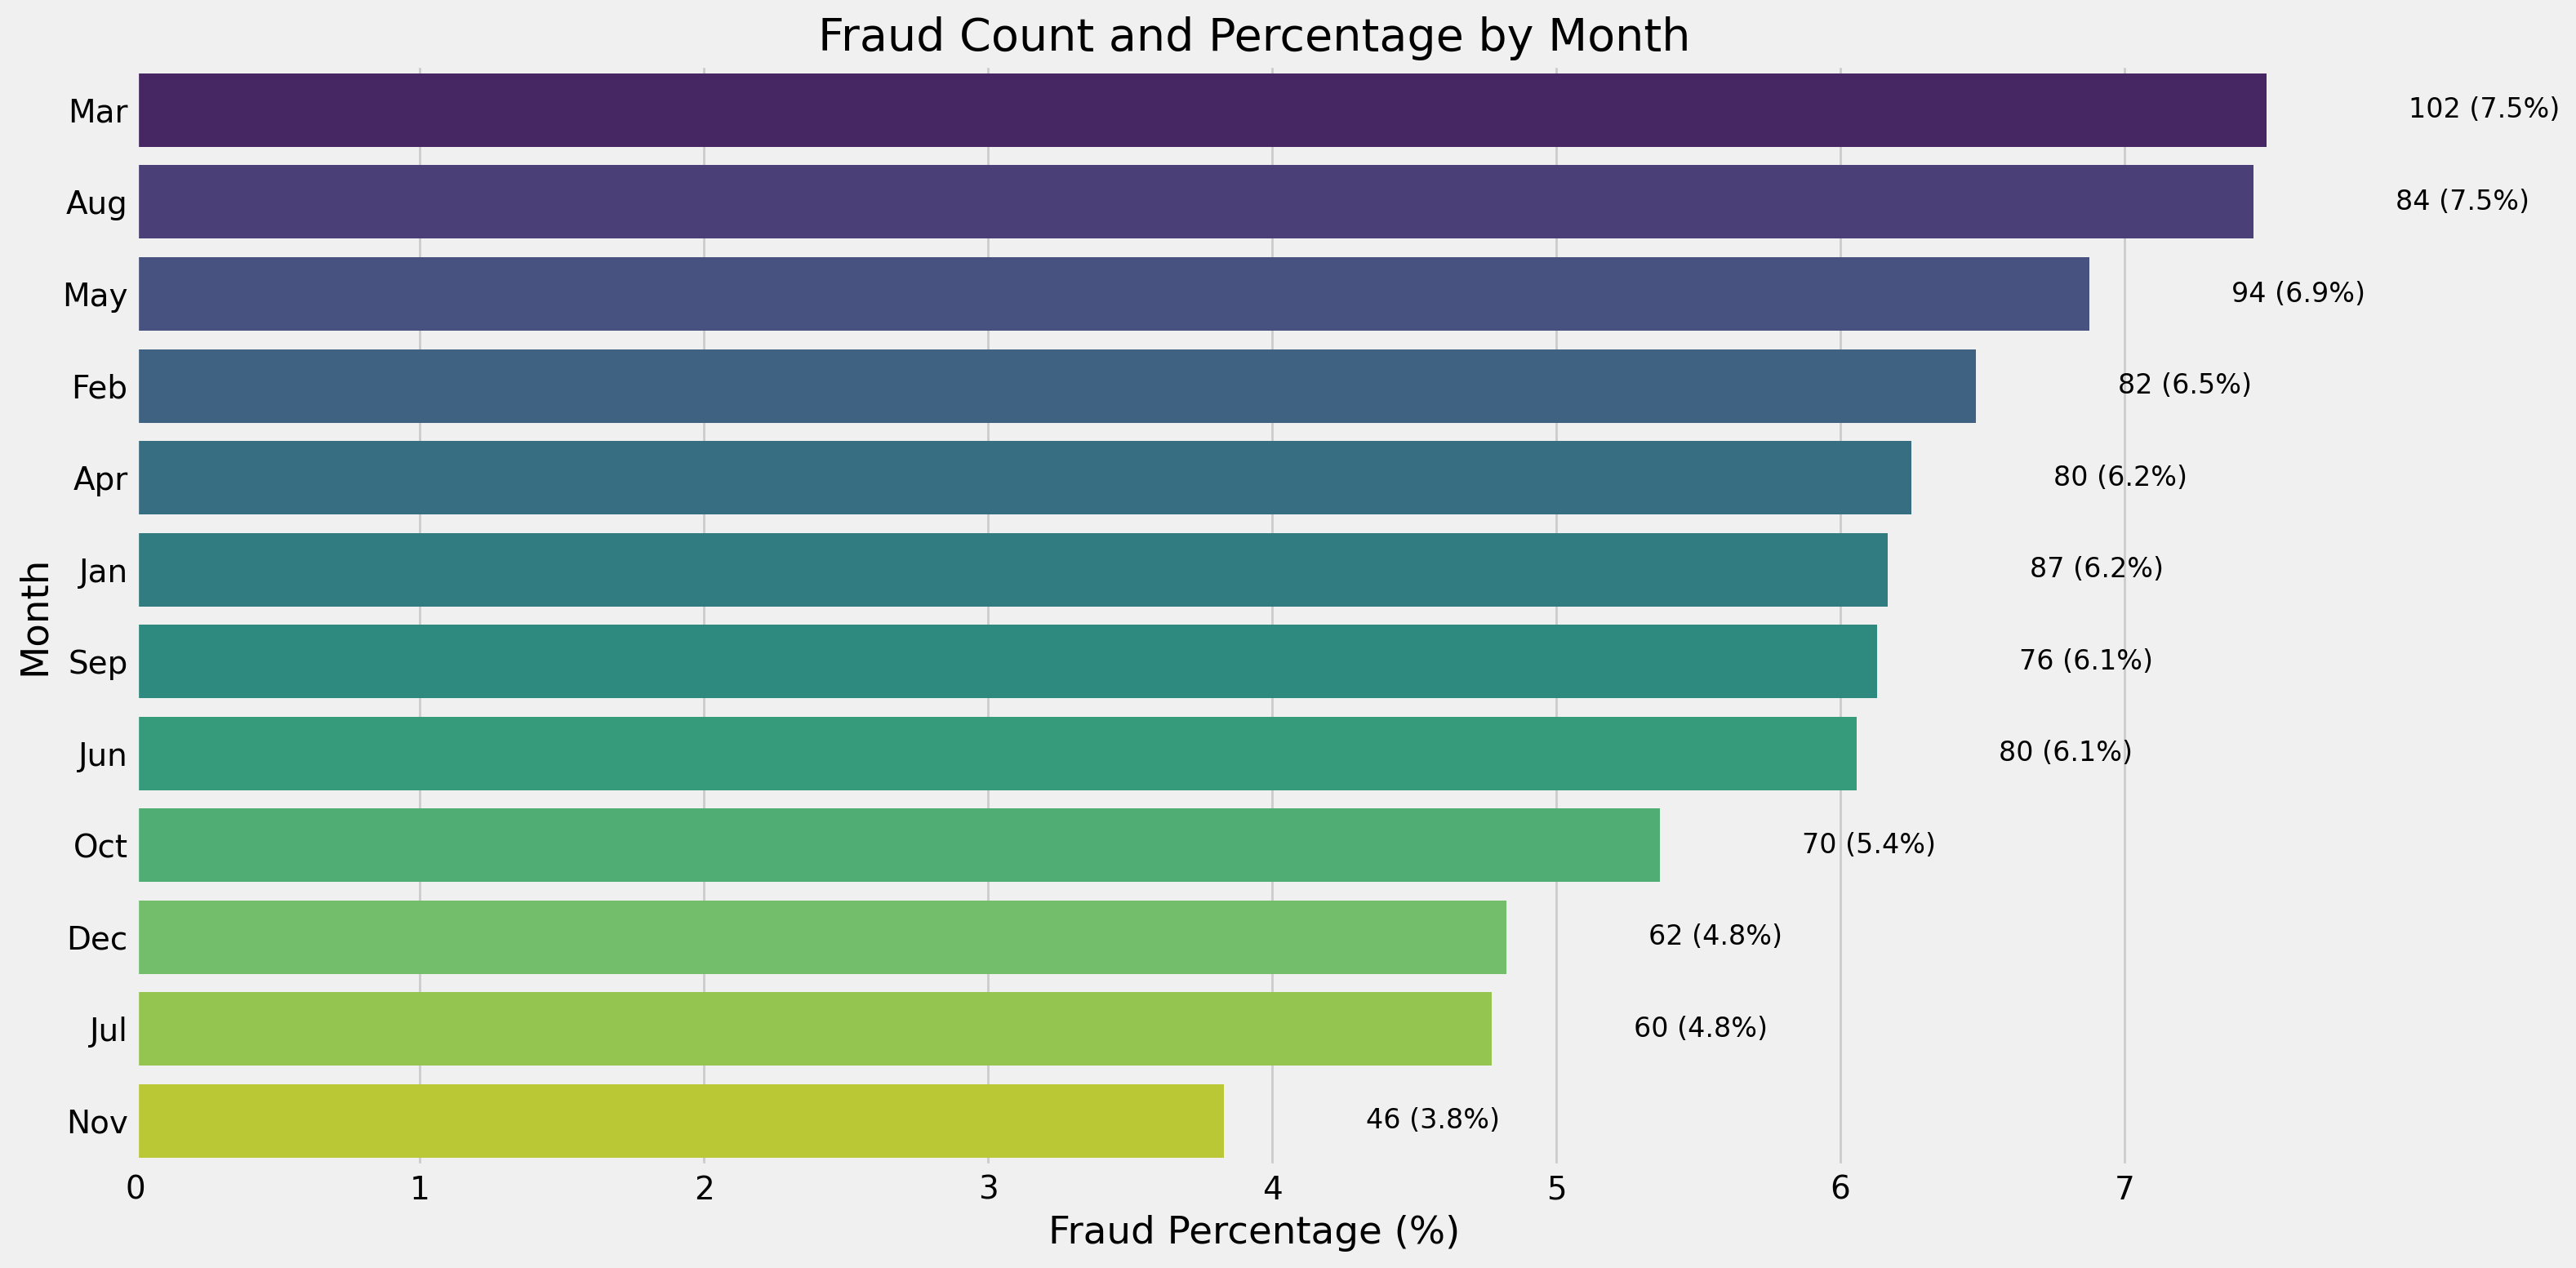

In [43]:
# Fraud detection by Month
plot_fraud_percentage_bar(fraud, 'Month', sort_by='percentage', horizontal=True)

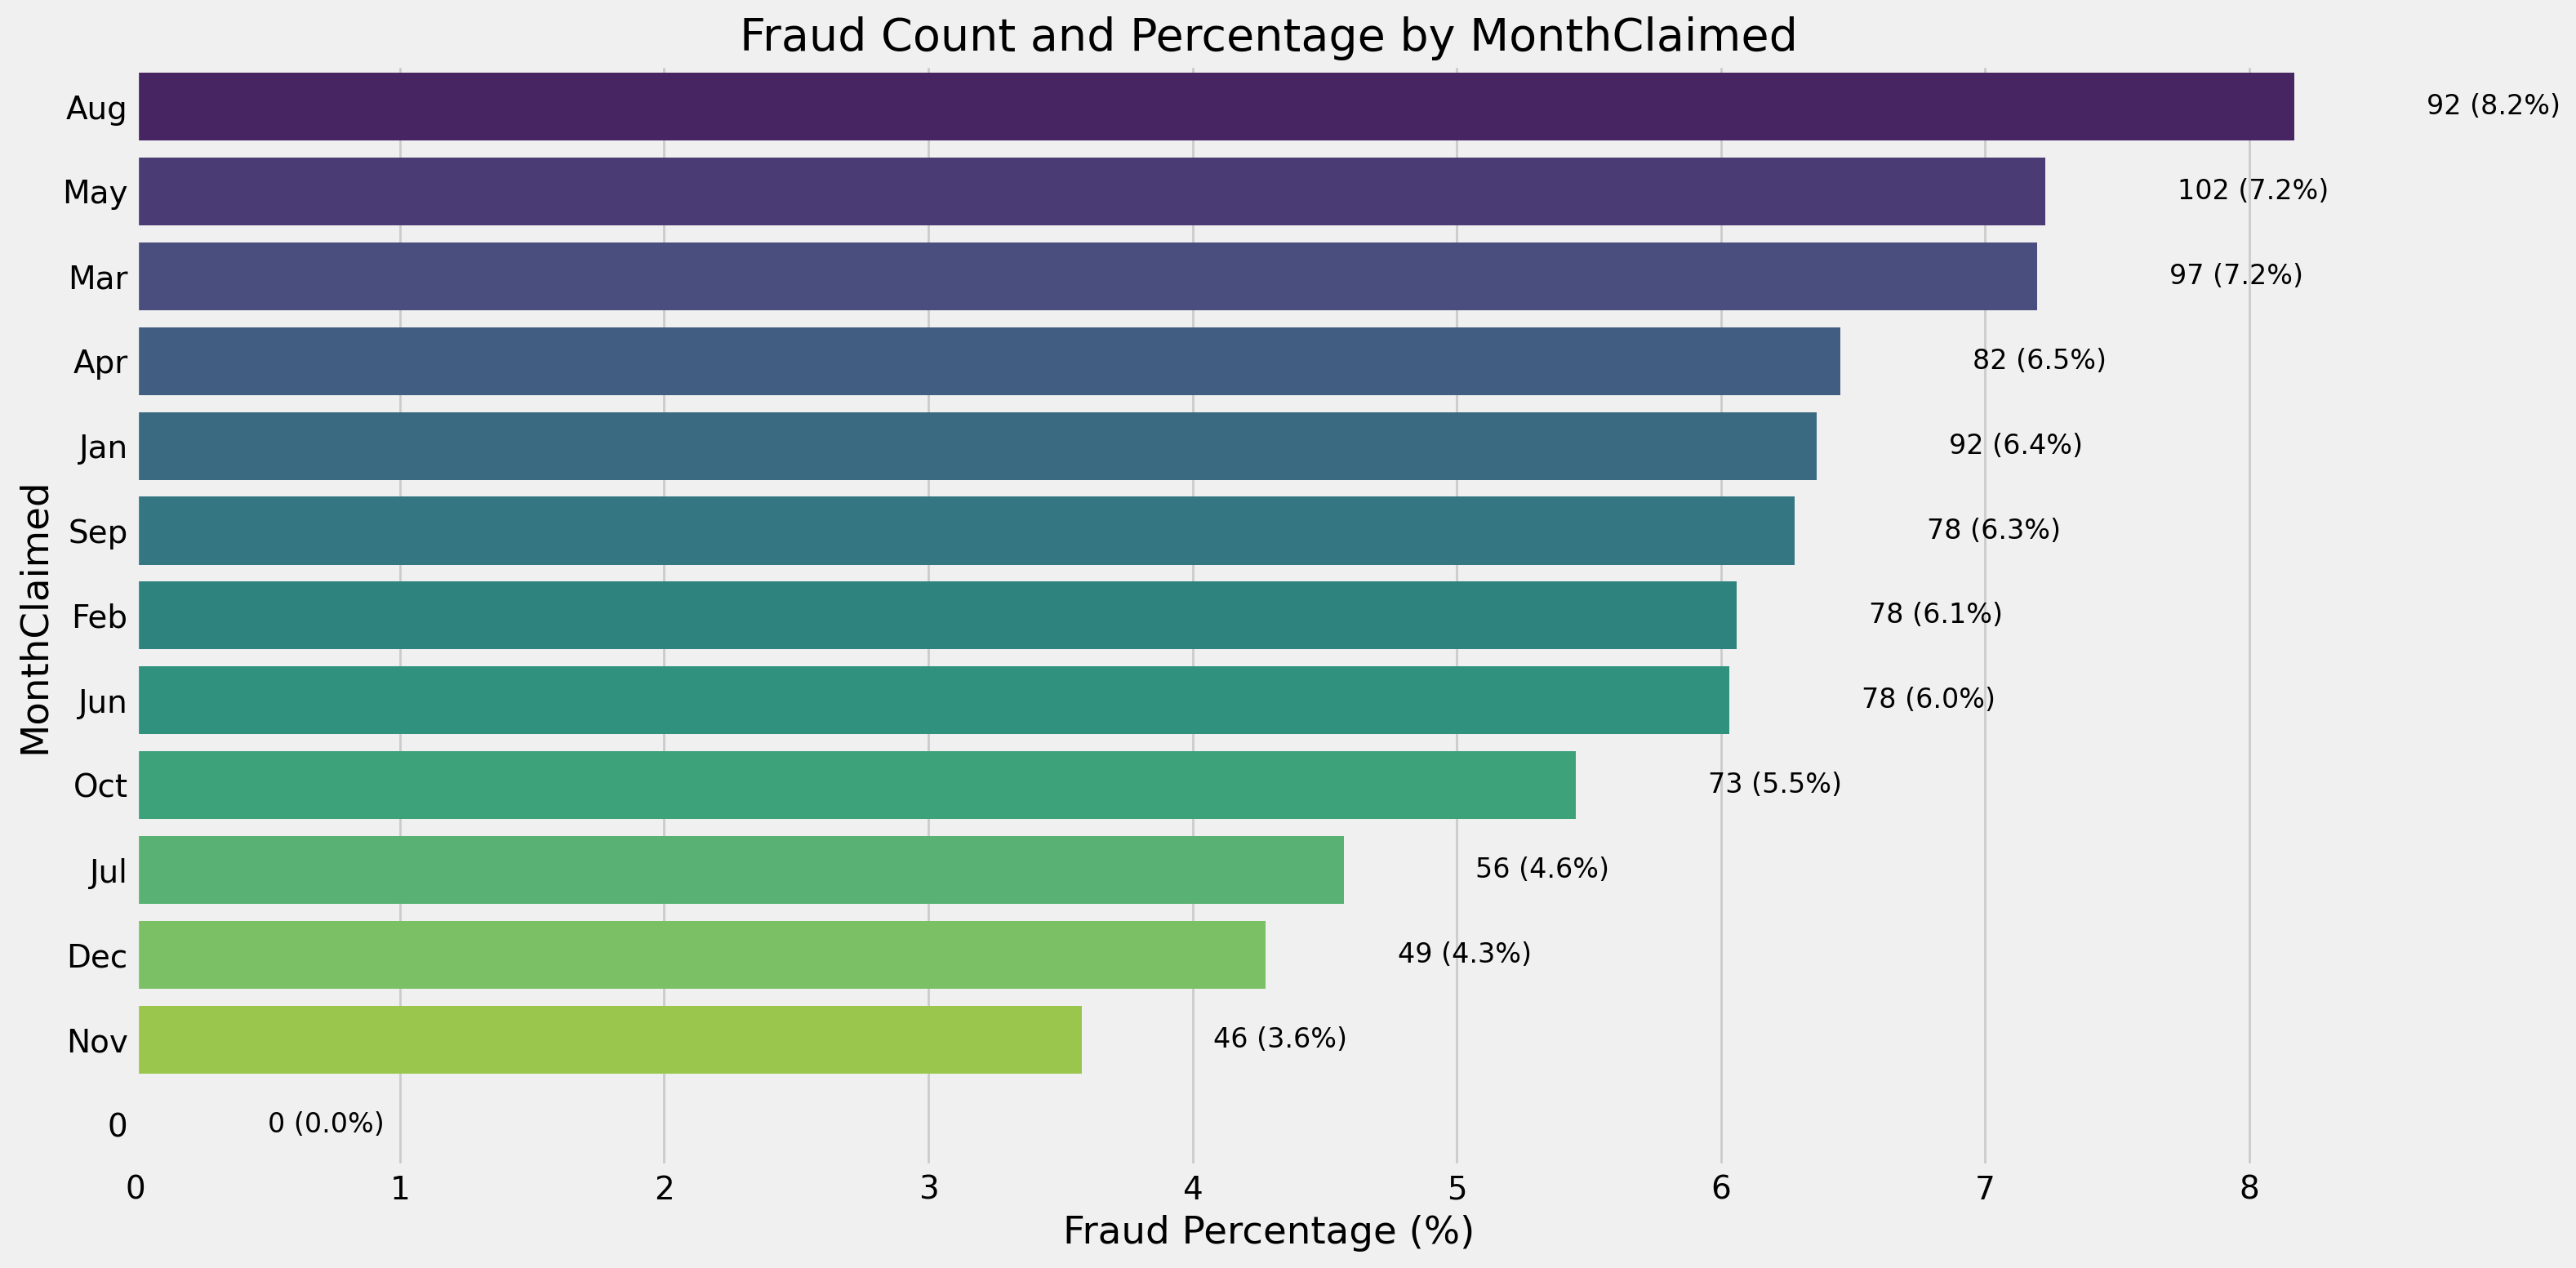

In [44]:
# Fraud detection by Month Claimed
plot_fraud_percentage_bar(fraud, 'MonthClaimed', sort_by='percentage', horizontal=True)

- The "Month" and "MonthClaimed" features have similar distributions, so we only need one of them.

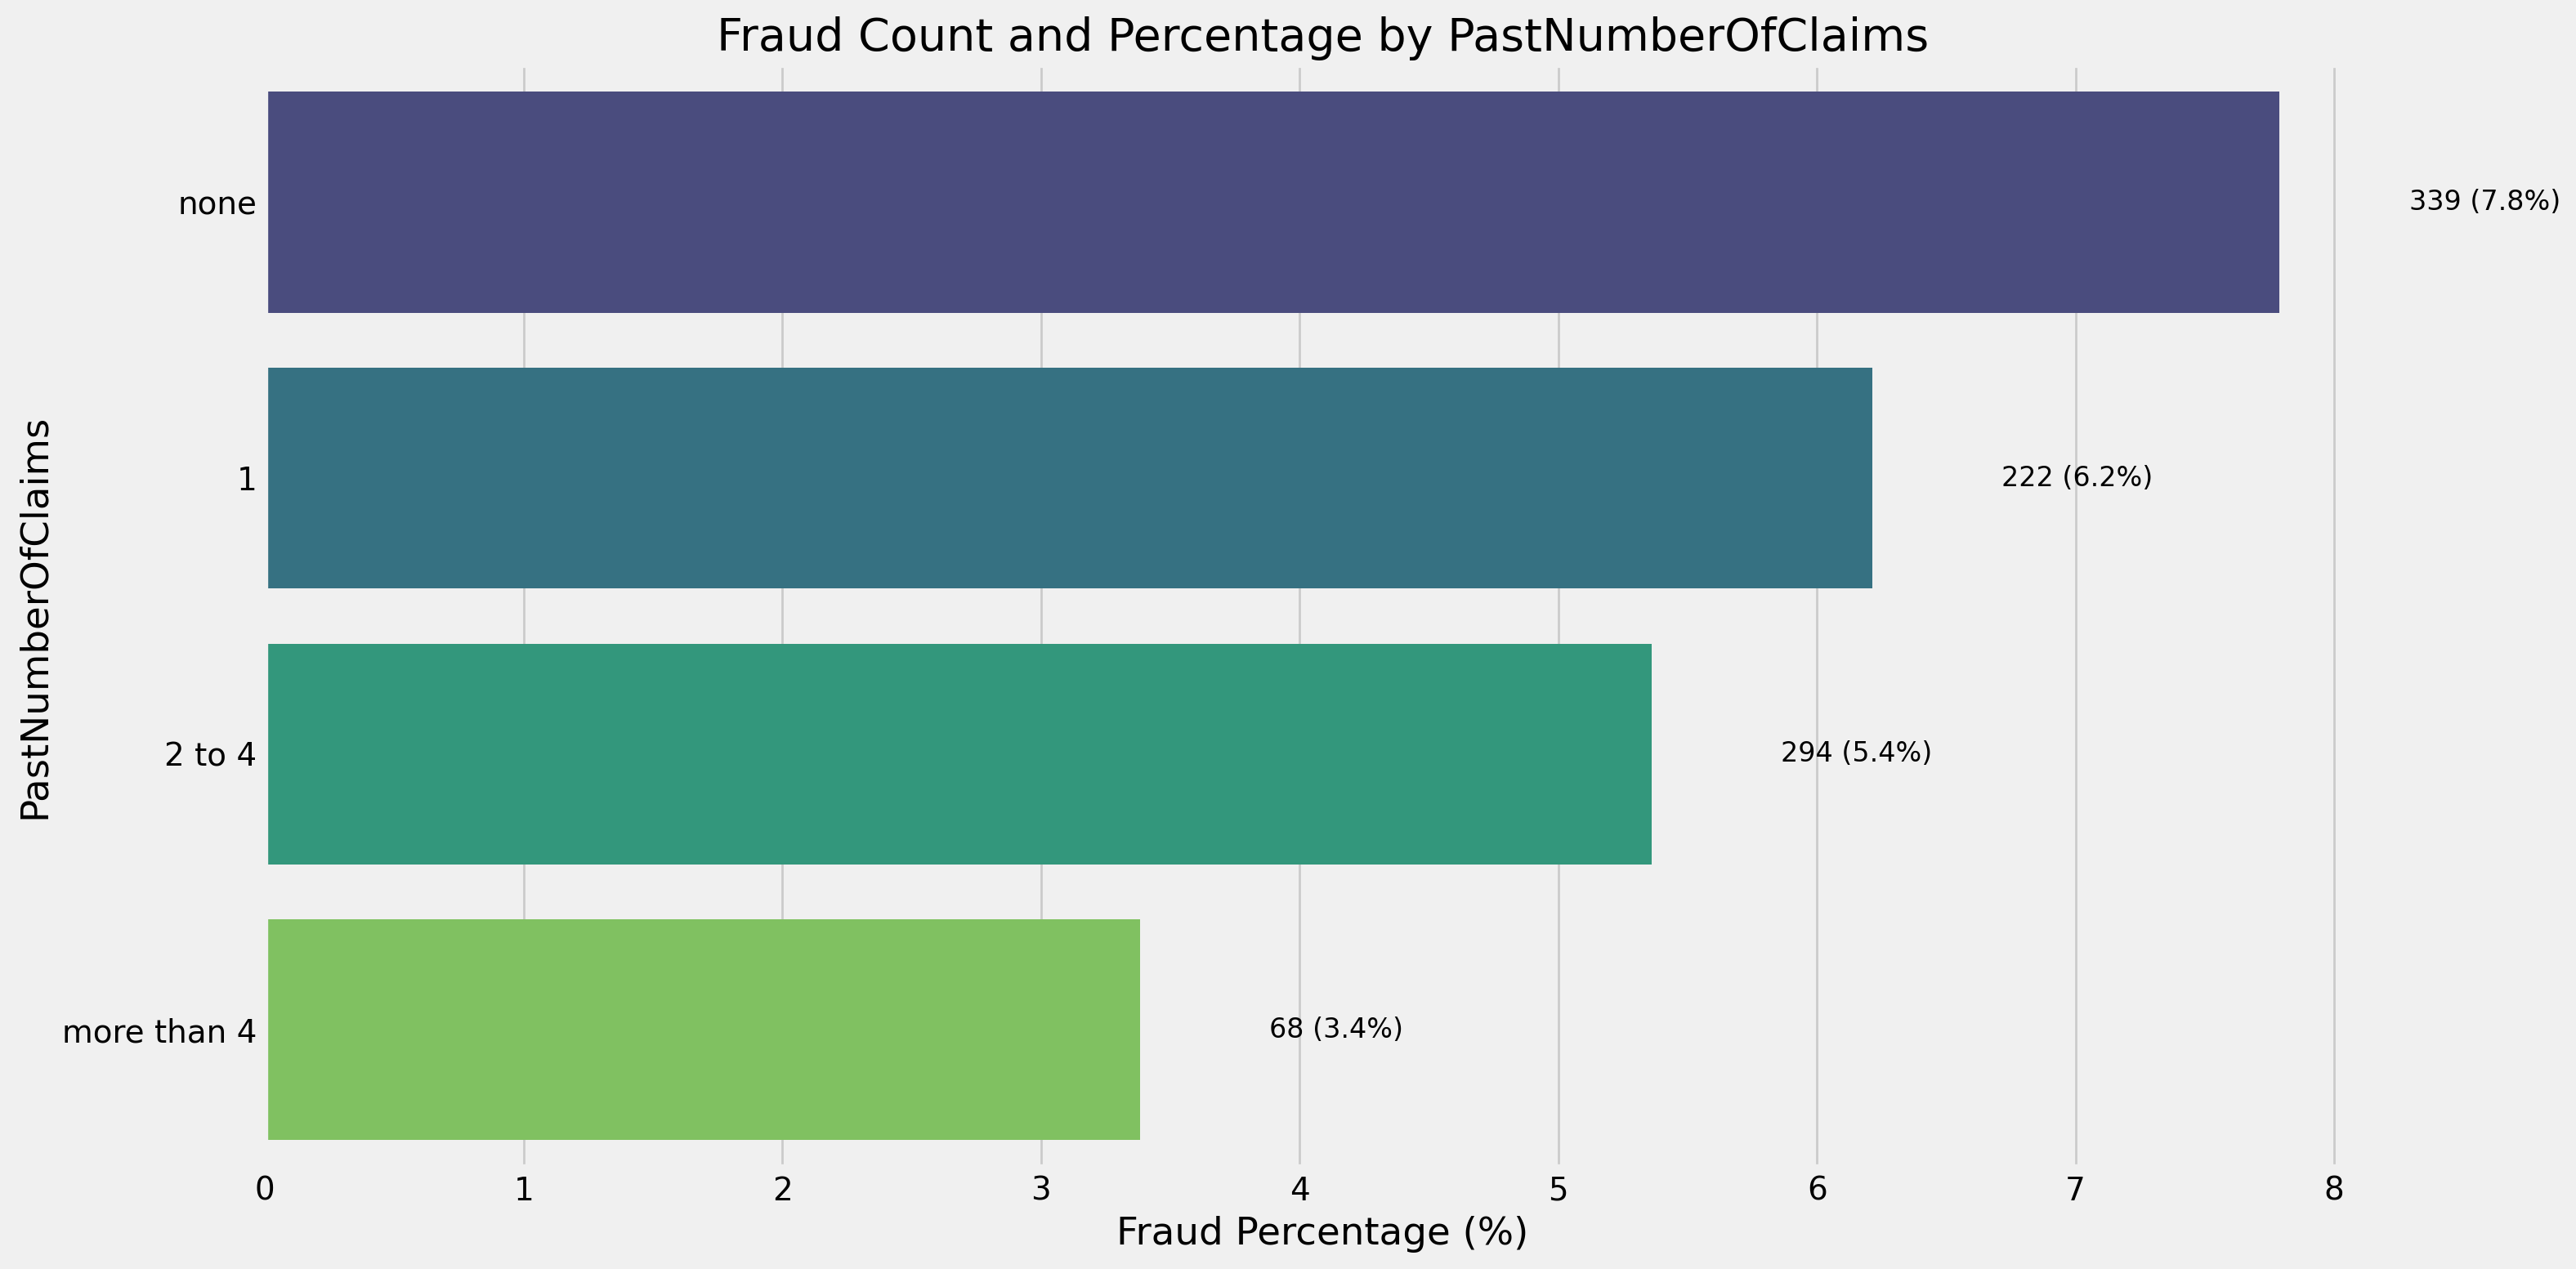

In [46]:
# Fraud detection by PastNumberOfClaims
plot_fraud_percentage_bar(fraud, 'PastNumberOfClaims', sort_by='percentage', horizontal=True)

-  Fraud was most frequently detected in cases where the Number of Claims was 'None'.

In [48]:
# Drop useless columns
useless_columns = ['Year', 'Month', 'WeekOfMonth', 'DayOfWeek', 'DayOfWeekClaimed', 'WeekOfMonthClaimed', 'PolicyNumber', 'RepNumber']
fraud.drop(labels=useless_columns, axis=1, inplace=True)

In [49]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Make                  15420 non-null  object
 1   AccidentArea          15420 non-null  object
 2   MonthClaimed          15420 non-null  object
 3   Sex                   15420 non-null  object
 4   MaritalStatus         15420 non-null  object
 5   Age                   15420 non-null  int64 
 6   Fault                 15420 non-null  object
 7   PolicyType            15420 non-null  object
 8   VehicleCategory       15420 non-null  object
 9   VehiclePrice          15420 non-null  object
 10  FraudFound_P          15420 non-null  int64 
 11  Deductible            15420 non-null  int64 
 12  DriverRating          15420 non-null  int64 
 13  Days_Policy_Accident  15420 non-null  object
 14  Days_Policy_Claim     15420 non-null  object
 15  PastNumberOfClaims    15420 non-null

In [50]:
# Binary Variable
# AccidentArea, Sex, Fault, PoliceReportFiled, WitnessPresent, AgentType
binary_columns = [col for col in fraud.columns if fraud[col].nunique() == 2 and col != 'FraudFound_P']
binary_columns

['AccidentArea',
 'Sex',
 'Fault',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType']

In [51]:
# Encoding Binary Variable
le = LabelEncoder()
for col in binary_columns:
    fraud[col] = le.fit_transform(fraud[col])
    print('Label Mapping: ', dict(zip(le.classes_, le.transform(le.classes_))))

Label Mapping:  {'Rural': 0, 'Urban': 1}
Label Mapping:  {'Female': 0, 'Male': 1}
Label Mapping:  {'Policy Holder': 0, 'Third Party': 1}
Label Mapping:  {'No': 0, 'Yes': 1}
Label Mapping:  {'No': 0, 'Yes': 1}
Label Mapping:  {'External': 0, 'Internal': 1}


In [52]:
for col in ['VehiclePrice', 'DriverRating', 'AgeOfVehicle', 'BasePolicy']:
    print(f"The unique values in {col}: {fraud[col].unique()}")

The unique values in VehiclePrice: ['more than 69000' '20000 to 29000' '30000 to 39000' 'less than 20000'
 '40000 to 59000' '60000 to 69000']
The unique values in DriverRating: [1 4 3 2]
The unique values in AgeOfVehicle: ['3 years' '6 years' '7 years' 'more than 7' '5 years' 'new' '4 years'
 '2 years']
The unique values in BasePolicy: ['Liability' 'Collision' 'All Perils']


In [53]:
# The "VehiclePrice" feature should be converted to binary rather than ordinal, as the categories "more than 69,000" and "less than 20,000" have the highest fraud rates, indicating that the feature does not follow an ordinal pattern.
VehiclePrice_label = {'more than 69000': 1, '20000 to 29000': 0,  '30000 to 39000': 0, 'less than 20000': 1, '40000 to 59000': 1, '60000 to 69000': 0}

# The "AgeOfVehicle" feature should be transformed into a nominal categorical variable, similar to "VehiclePrice." However, it can be reclassified into three distinct categories.
AgeOfVehicle_label = {'new': 2, '2 years': 0, '3 years': 2, '4 years': 2, '5 years': 1, '6 years': 1, '7 years': 0, 'more than 7': 0}

# The "BasePolicy" feature is an ordinal categorical variable.
BasePolicy_label = {'Liability': 0, 'Collision': 1, 'All Perils': 2}

In [54]:
fraud['VehiclePrice'] = fraud['VehiclePrice'].map(VehiclePrice_label)
fraud['AgeOfVehicle'] = fraud['AgeOfVehicle'].map(AgeOfVehicle_label)
fraud['BasePolicy'] = fraud['BasePolicy'].map(BasePolicy_label)

In [55]:
dummy_columns = ['Make', 'MonthClaimed', 'MaritalStatus', 'PolicyType', 'VehicleCategory', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfPolicyHolder', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars']
print('The number of dummy columns: ', len(dummy_columns))

The number of dummy columns:  12


In [56]:
fraud_with_dummies = pd.get_dummies(fraud, columns=dummy_columns)

In [57]:
fraud_with_dummies.shape

(15420, 97)

In [58]:
fraud_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 97 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   AccidentArea                        15420 non-null  int32
 1   Sex                                 15420 non-null  int32
 2   Age                                 15420 non-null  int64
 3   Fault                               15420 non-null  int32
 4   VehiclePrice                        15420 non-null  int64
 5   FraudFound_P                        15420 non-null  int64
 6   Deductible                          15420 non-null  int64
 7   DriverRating                        15420 non-null  int64
 8   AgeOfVehicle                        15420 non-null  int64
 9   PoliceReportFiled                   15420 non-null  int32
 10  WitnessPresent                      15420 non-null  int32
 11  AgentType                           15420 non-null  int32
 12  Base

In [59]:
fraud[fraud['Age'] == 0]['Age'].value_counts()

Age
0    320
Name: count, dtype: int64

In [60]:
fraud[fraud['Age'] == 0]['FraudFound_P'].value_counts()

FraudFound_P
0    289
1     31
Name: count, dtype: int64

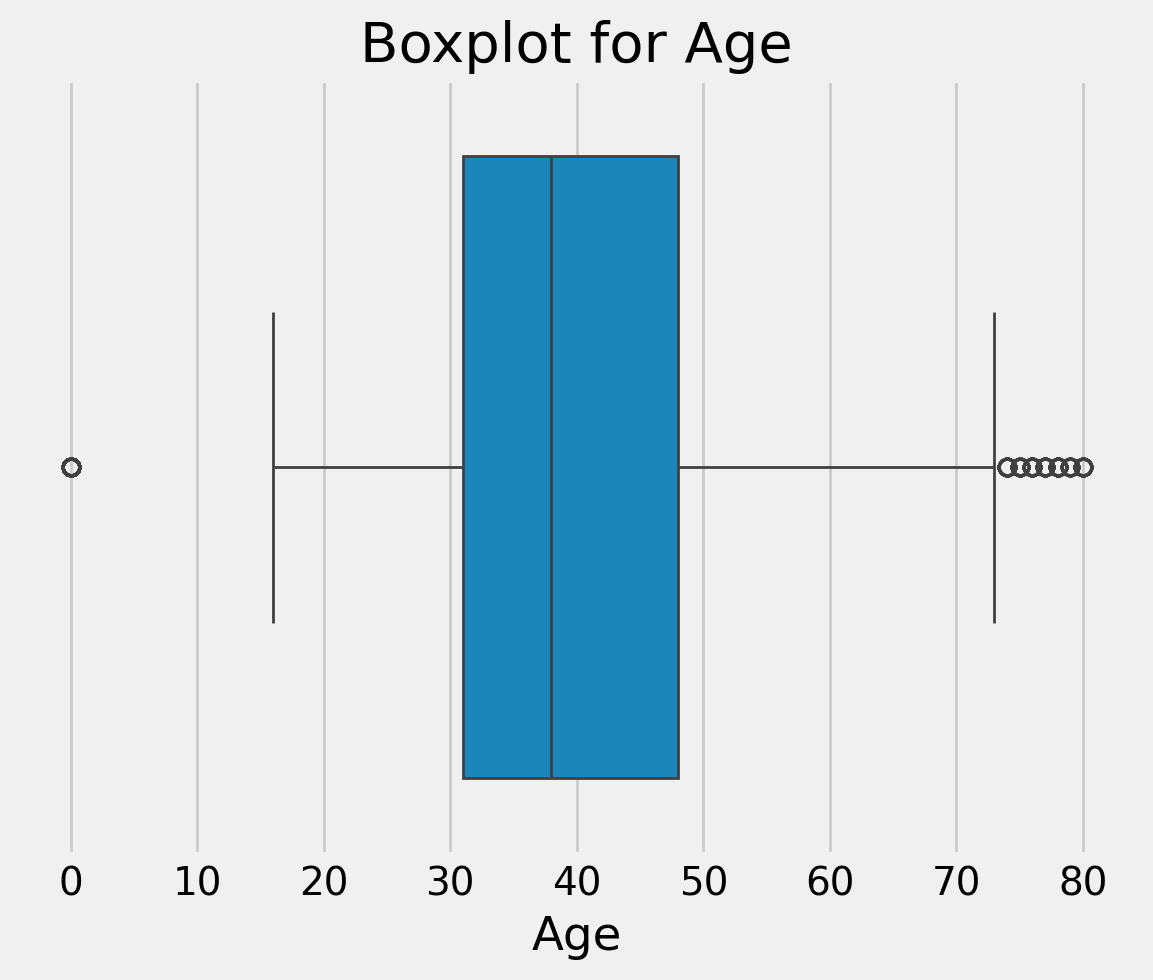

In [61]:
# Create a boxplot for the 'Age' column
sns.boxplot(x=fraud['Age'])

# Show the plot
plt.title('Boxplot for Age')
plt.show()

In [62]:
# Impute Age (mean/median)
fraud_with_dummies['Age'] = fraud_with_dummies['Age'].replace(0, np.nan)
imputer = SimpleImputer(strategy='median')
fraud_with_dummies['Age'] = imputer.fit_transform(fraud_with_dummies[['Age']])

In [63]:
fraud_with_dummies.shape

(15420, 97)

In [64]:
feature_cols = [col for col in fraud_with_dummies.columns if col != 'FraudFound_P' ]
target_col = 'FraudFound_P'

X = fraud_with_dummies[feature_cols]
y= fraud_with_dummies[target_col]

In [65]:
#  top 10 features using a Random Forest machine learning model 
model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
model.fit(X, y)

importances = model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort by importance and get top 10
top_10_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

print(top_10_features)

                         Feature  Importance
3                          Fault    0.123434
2                            Age    0.094796
6                   DriverRating    0.051159
11                    BasePolicy    0.047772
50  PolicyType_Sedan - Liability    0.039910
58         VehicleCategory_Sport    0.026659
57         VehicleCategory_Sedan    0.022290
7                   AgeOfVehicle    0.021794
72       PastNumberOfClaims_none    0.018343
4                   VehiclePrice    0.018338


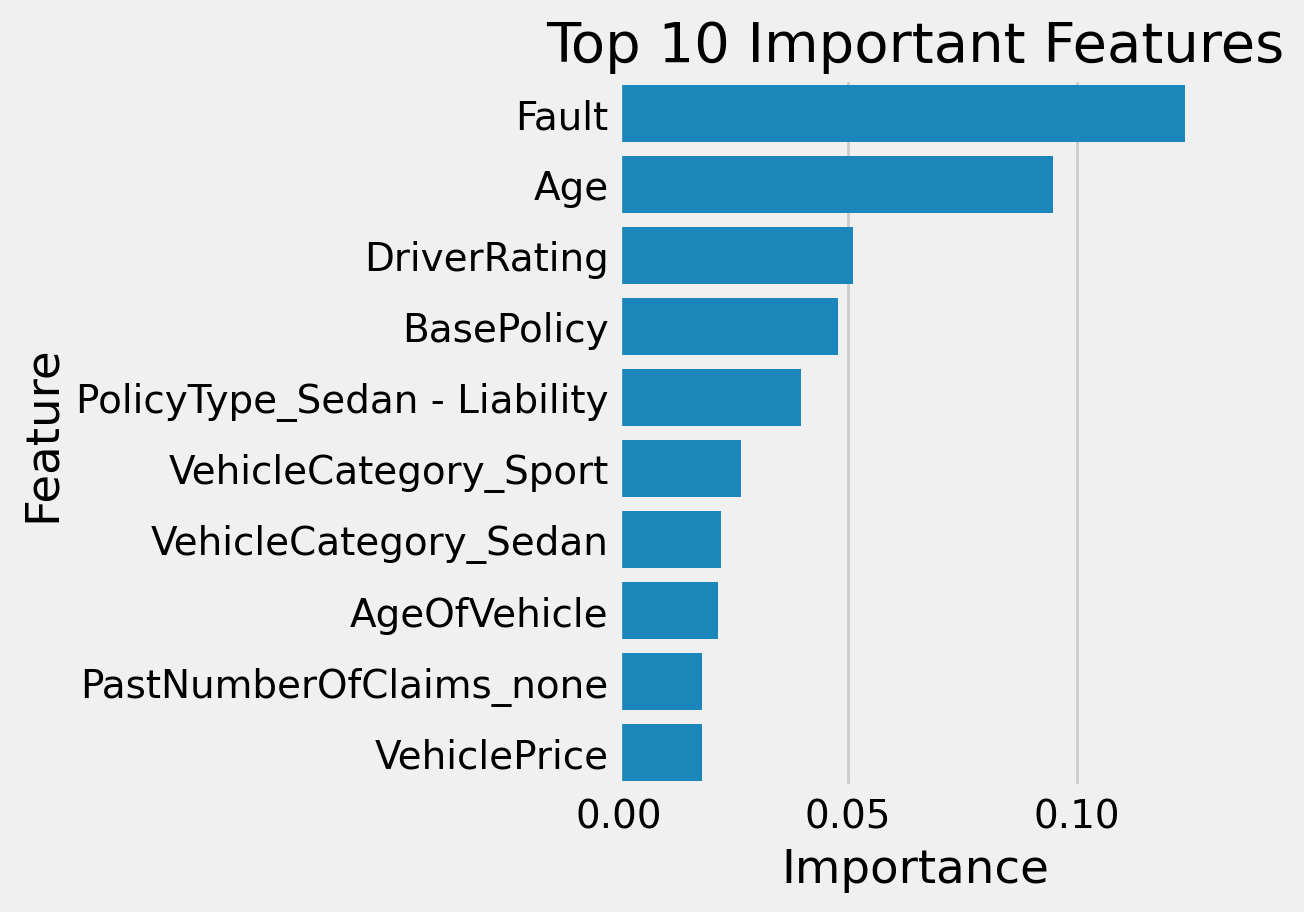

In [66]:
# Visualization of feature_importance
sns.barplot(x='Importance', y='Feature', data=top_10_features)
plt.title('Top 10 Important Features')
plt.tight_layout()
plt.show()

In [67]:
top10_columns = [col for col in top_10_features['Feature']]
new_columns = top10_columns + ['FraudFound_P']
fraud_with_dummies_new = fraud_with_dummies[new_columns]

In [68]:
# normalization
# Apply normalisation (convert all ranges to [0-1]) for visualisation purposes.
scaler = MinMaxScaler(feature_range = (0, 1))
fraud_new_normalized = pd.DataFrame(scaler.fit_transform(fraud_with_dummies_new), columns=new_columns)

In [69]:
fraud_new_normalized.head()

Fault       Age  DriverRating  BasePolicy  PolicyType_Sedan - Liability  \
0    0.0  0.078125      0.000000         0.0                           0.0   
1    0.0  0.281250      1.000000         0.5                           0.0   
2    0.0  0.484375      0.666667         0.5                           0.0   
3    1.0  0.765625      0.333333         0.0                           1.0   
4    1.0  0.171875      0.000000         0.5                           0.0   

   VehicleCategory_Sport  VehicleCategory_Sedan  AgeOfVehicle  \
0                    1.0                    0.0           1.0   
1                    1.0                    0.0           0.5   
2                    1.0                    0.0           0.0   
3                    1.0                    0.0           0.0   
4                    1.0                    0.0           0.5   

   PastNumberOfClaims_none  VehiclePrice  FraudFound_P  
0                      1.0           1.0           0.0  
1                      1.0           1.0           0.0  
2                      0.0           1.0           0.0  
3                      0.0           0.0           0.0  
4                      1.0           1.0           0.0

In [70]:
fraud_new_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Fault                         15420 non-null  float64
 1   Age                           15420 non-null  float64
 2   DriverRating                  15420 non-null  float64
 3   BasePolicy                    15420 non-null  float64
 4   PolicyType_Sedan - Liability  15420 non-null  float64
 5   VehicleCategory_Sport         15420 non-null  float64
 6   VehicleCategory_Sedan         15420 non-null  float64
 7   AgeOfVehicle                  15420 non-null  float64
 8   PastNumberOfClaims_none       15420 non-null  float64
 9   VehiclePrice                  15420 non-null  float64
 10  FraudFound_P                  15420 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


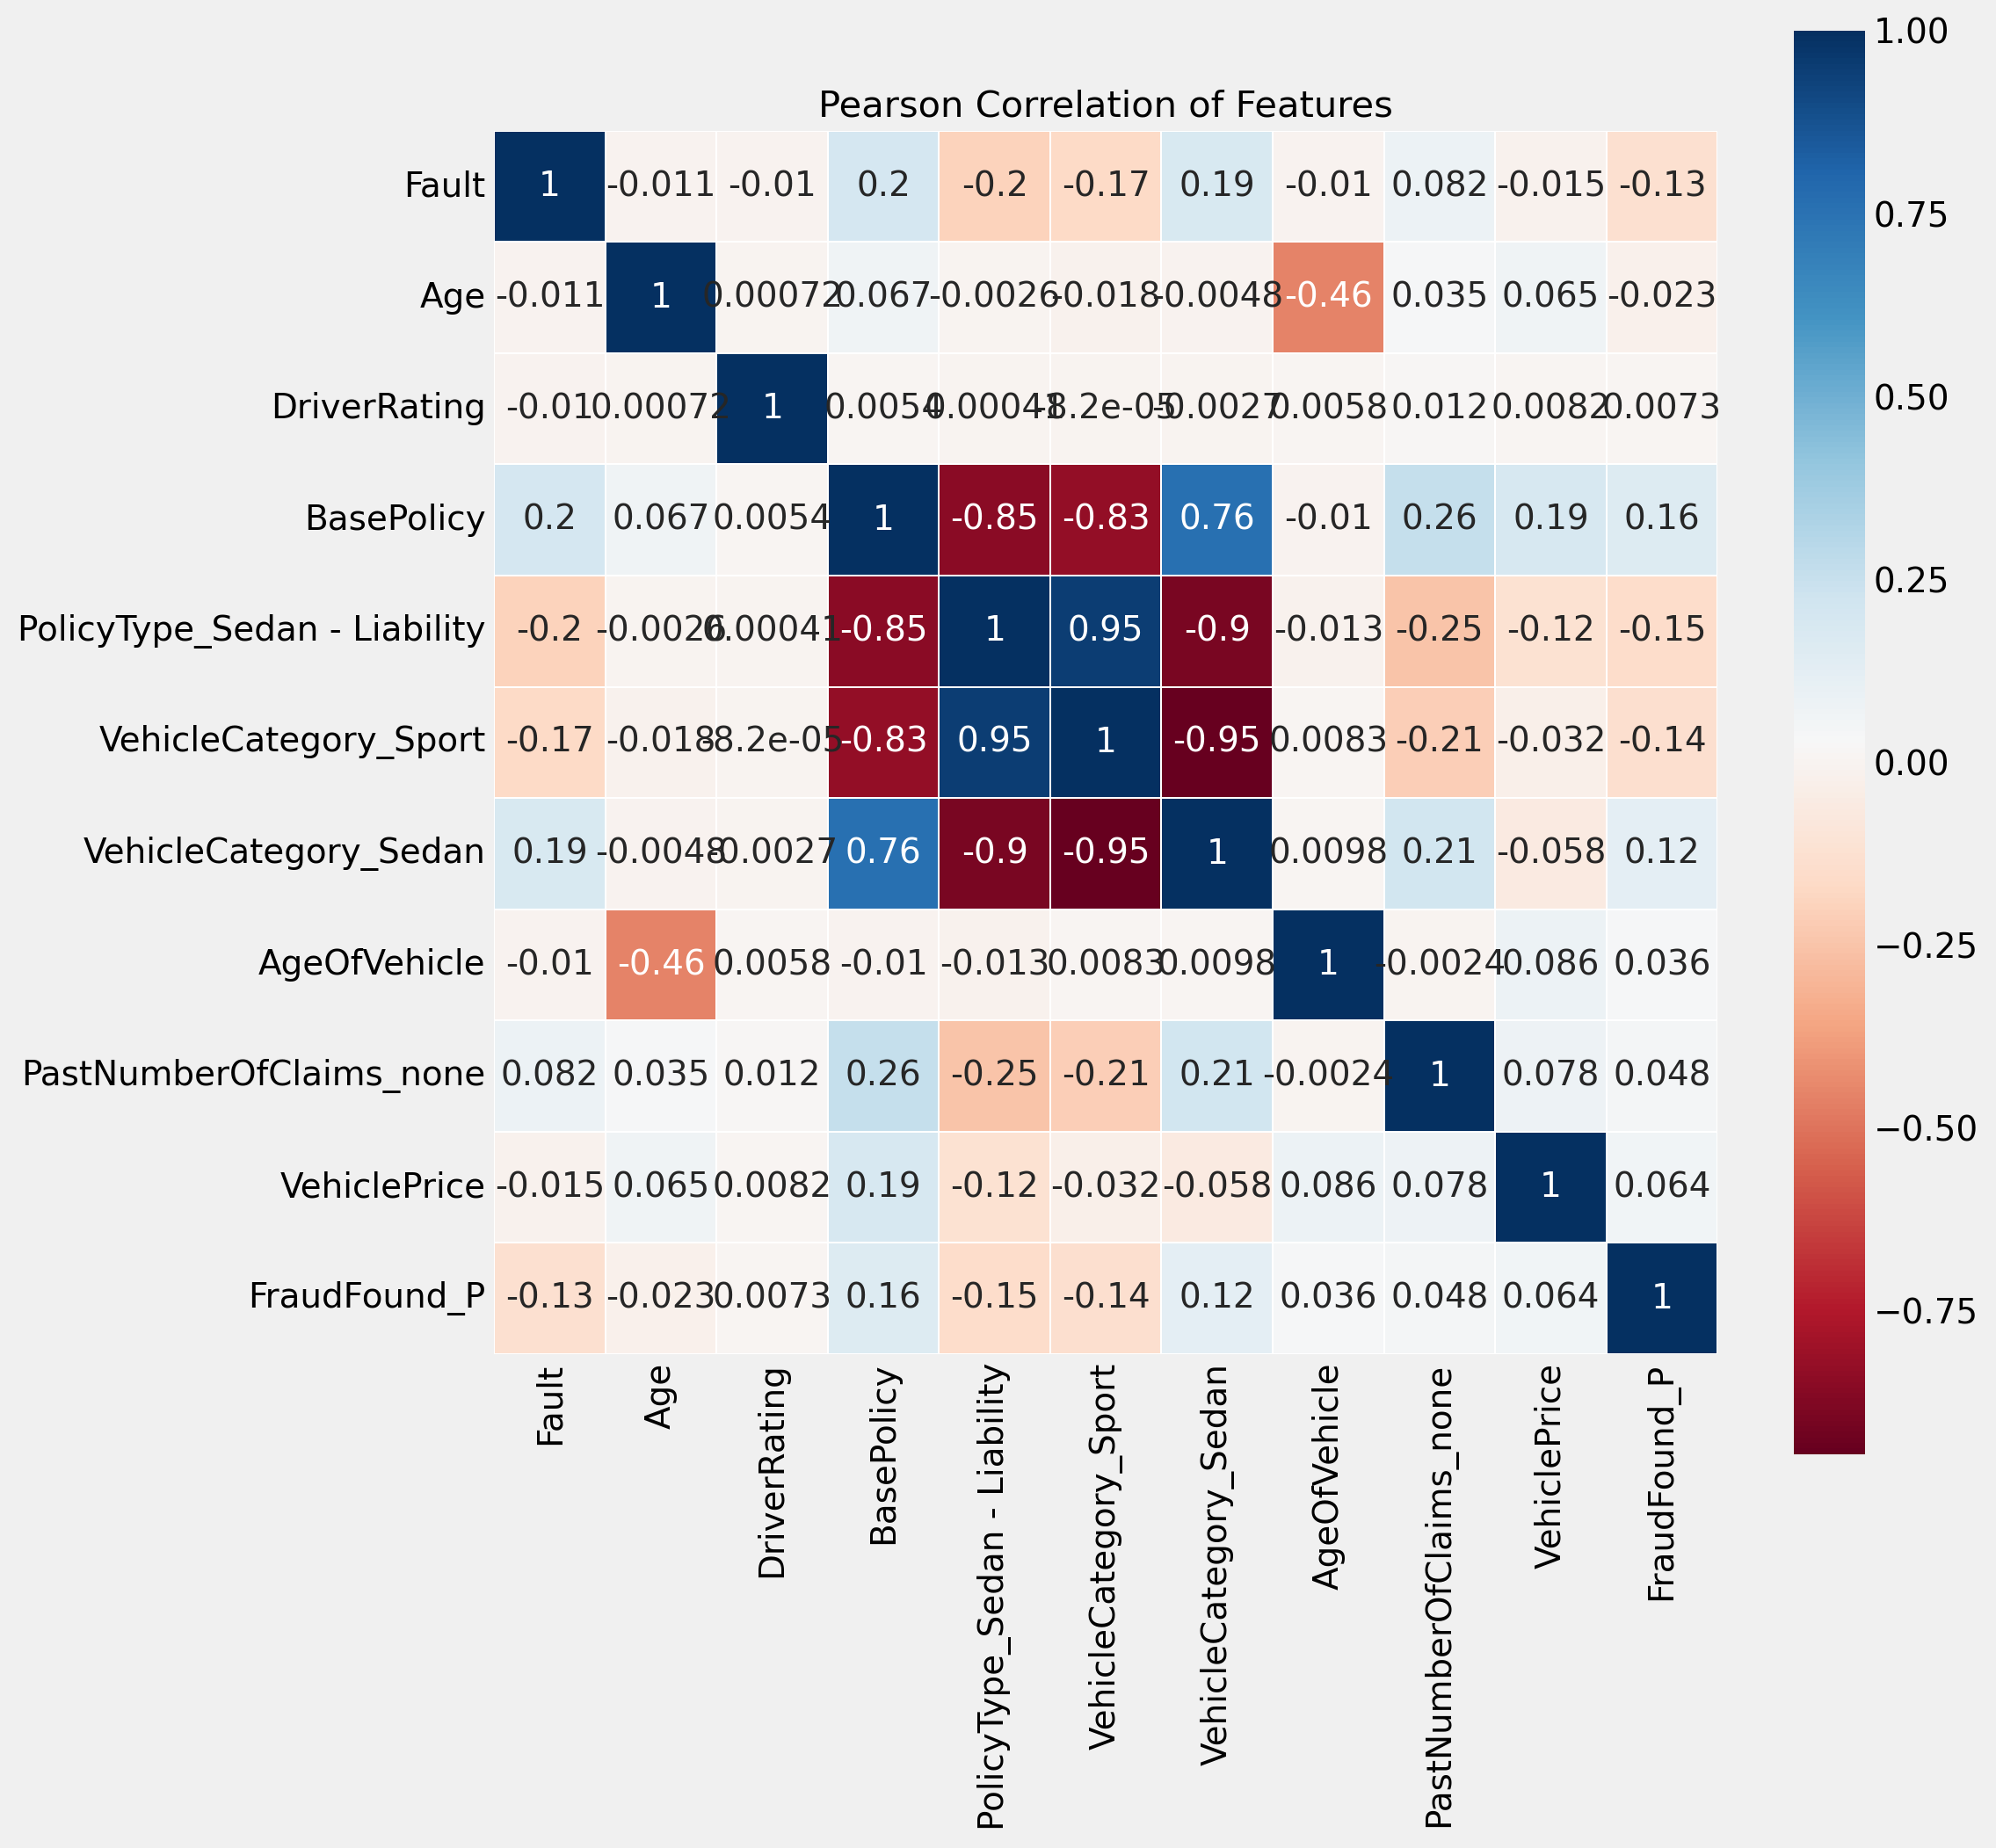

In [71]:
# Pearson Correlation Heatmap
colormap = plt.cm.RdBu
plt.figure(figsize = (10, 10))
plt.title('Pearson Correlation of Features', size = 15)
sns.heatmap(fraud_new_normalized.astype(float).corr(),
            linewidths = 0.1,
            vmax = 1.0,
            square = True,
            cmap = colormap,
            linecolor = 'white',
            annot = True)
plt.show()

In [72]:
# drop features: "VehicleCategory_Sport", "PolicyType_Sedan - Liability", "VehicleCategory_Sedan"
fraud_new_normalized.drop(["VehicleCategory_Sport", "PolicyType_Sedan - Liability", "VehicleCategory_Sedan"], axis=1, inplace=True)

In [73]:
fraud_new_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Fault                    15420 non-null  float64
 1   Age                      15420 non-null  float64
 2   DriverRating             15420 non-null  float64
 3   BasePolicy               15420 non-null  float64
 4   AgeOfVehicle             15420 non-null  float64
 5   PastNumberOfClaims_none  15420 non-null  float64
 6   VehiclePrice             15420 non-null  float64
 7   FraudFound_P             15420 non-null  float64
dtypes: float64(8)
memory usage: 963.9 KB


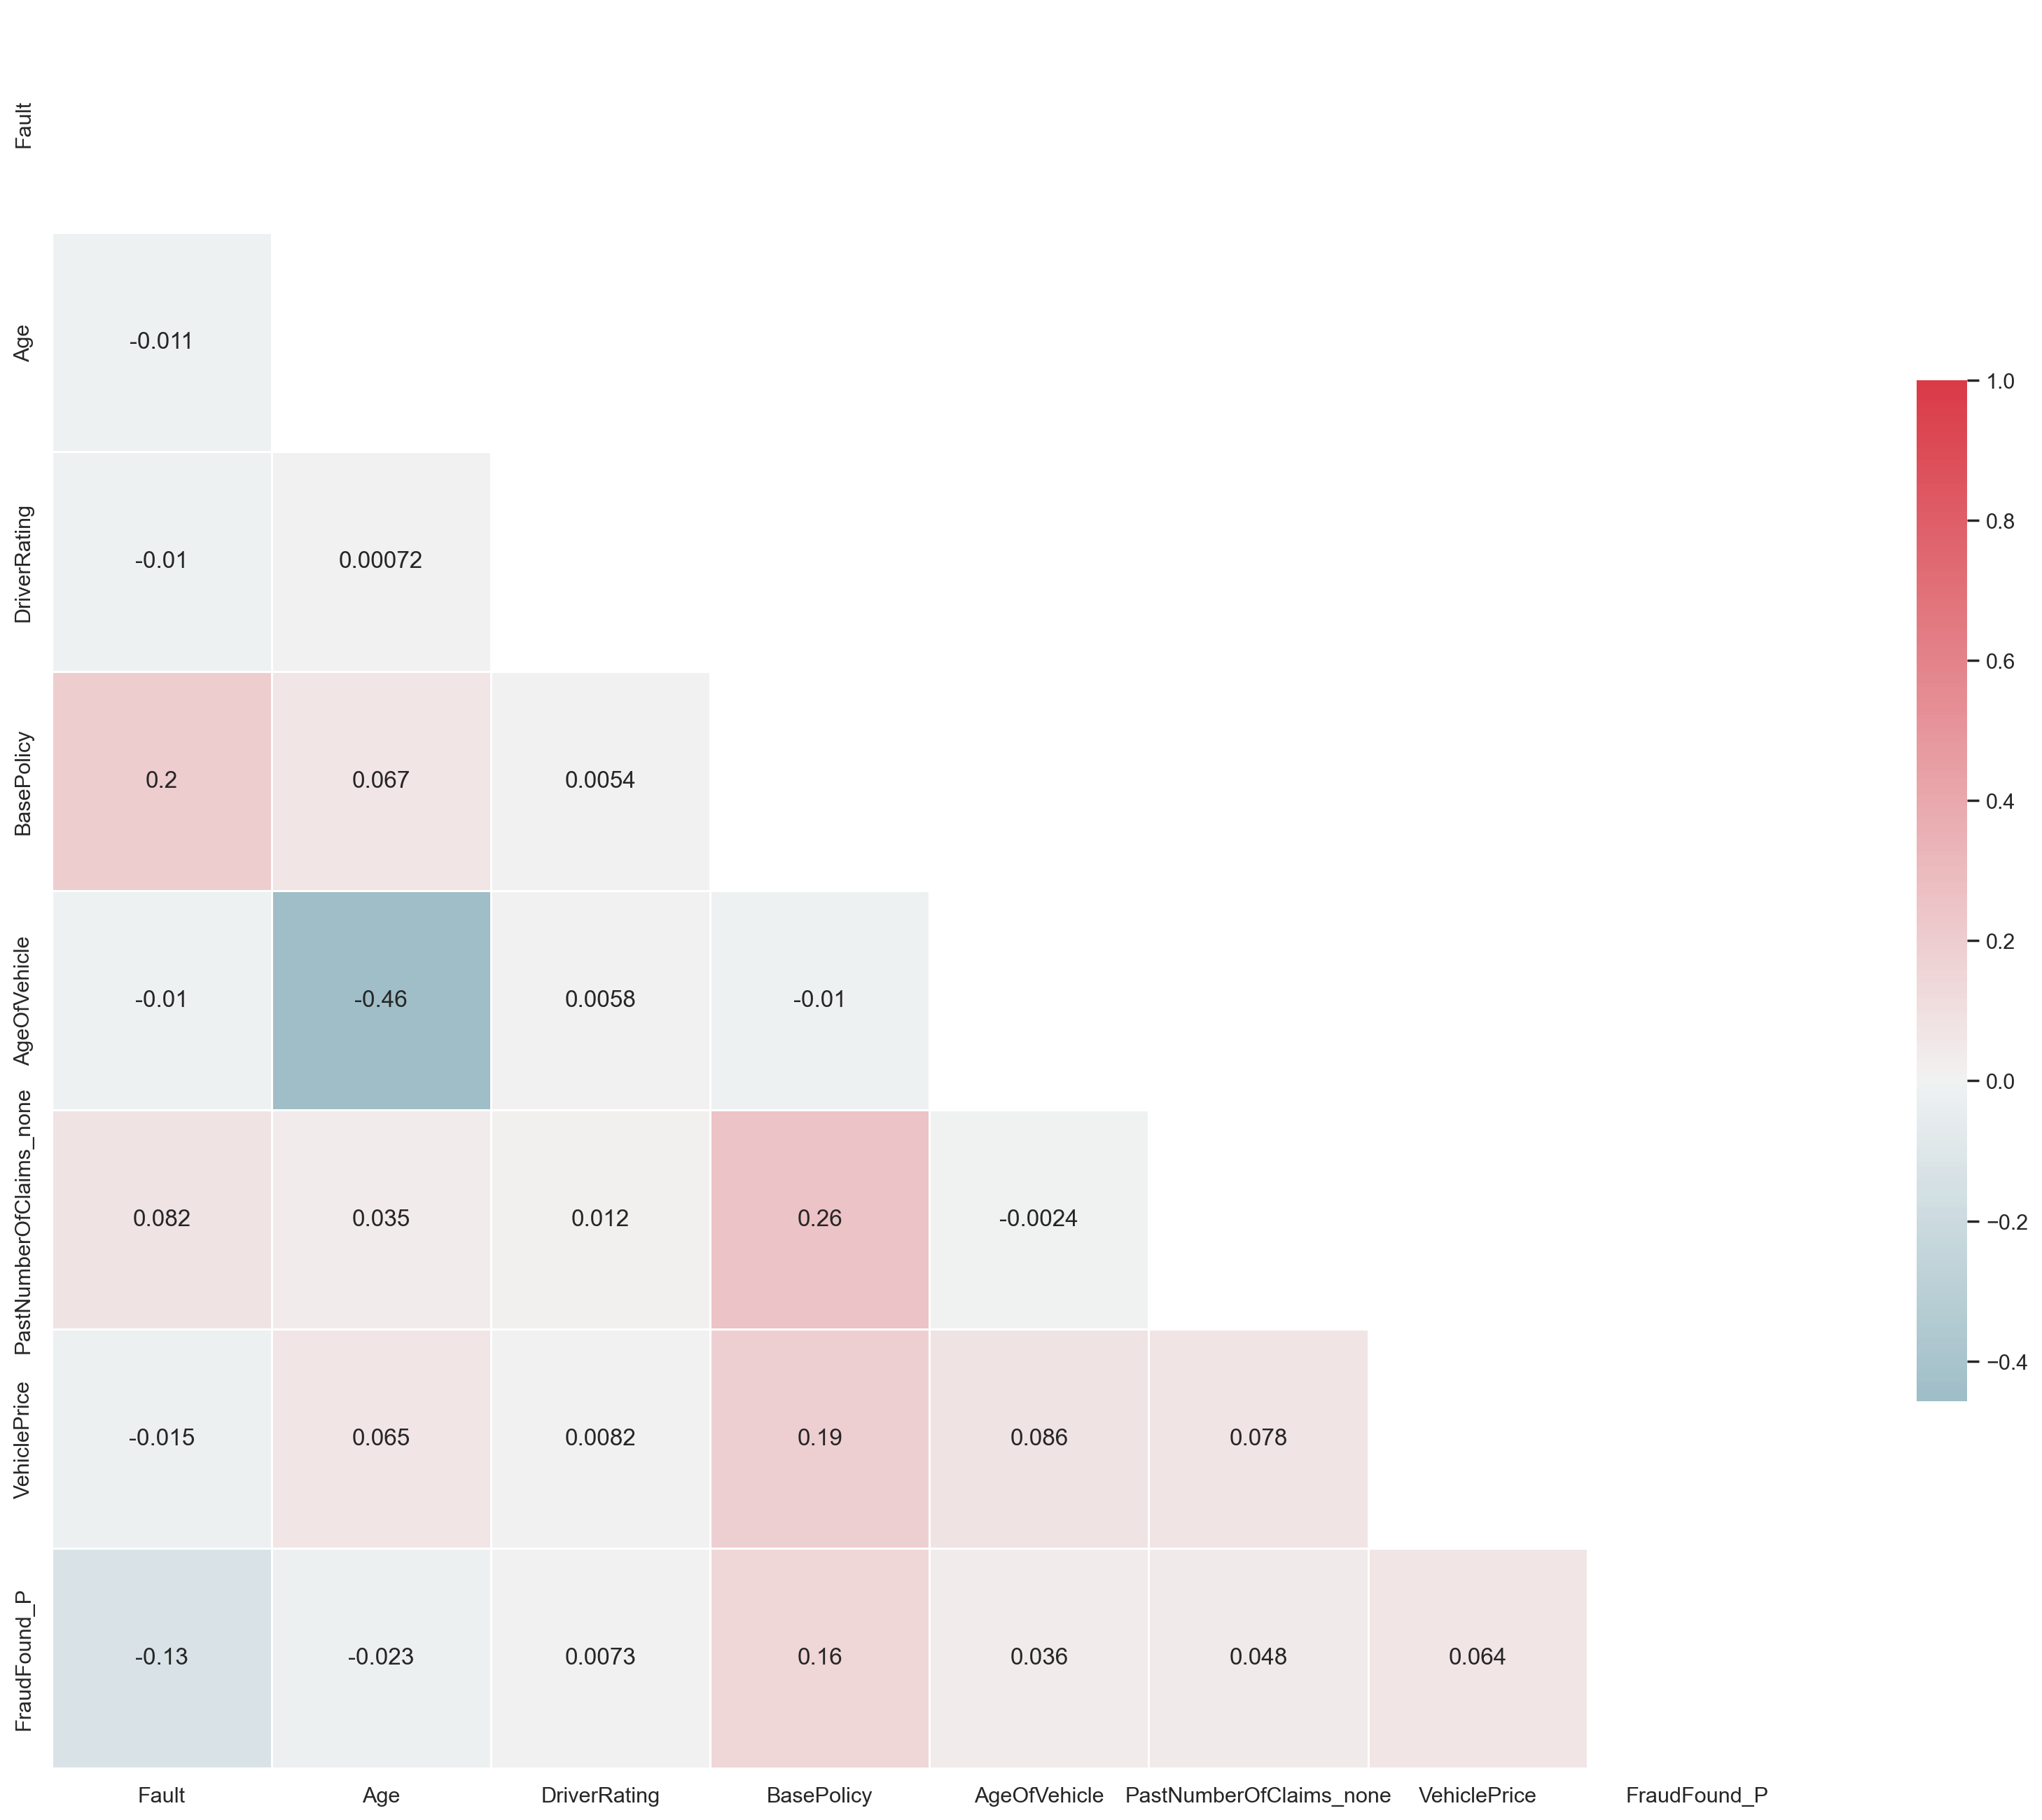

In [74]:
# Copied code from seaborn examples
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(fraud_new_normalized.corr(numeric_only = True), dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(fraud_new_normalized.corr(numeric_only = True), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show();

In [75]:
# move the data back to a dataframe
fraud_new_normalized['FraudFound_P'] = fraud_new_normalized['FraudFound_P'].astype(np.int8)
fraud_new_normalized.sample(5)

Fault       Age  DriverRating  BasePolicy  AgeOfVehicle  \
4867     0.0  0.484375      0.666667         1.0           0.5   
11685    0.0  0.406250      1.000000         0.0           0.0   
14922    1.0  0.234375      1.000000         0.0           0.5   
1012     1.0  0.593750      0.666667         0.0           0.0   
11052    0.0  0.656250      0.333333         0.5           0.0   

       PastNumberOfClaims_none  VehiclePrice  FraudFound_P  
4867                       1.0           0.0             0  
11685                      0.0           0.0             0  
14922                      0.0           0.0             0  
1012                       0.0           0.0             0  
11052                      0.0           0.0             0

In [76]:
feature_cols = [col for col in fraud_new_normalized.columns if col != target_col]
target_col = 'FraudFound_P'

X = fraud_new_normalized[feature_cols]
y = fraud_new_normalized[target_col]

# split data
## Create training and testing subsets
test_size = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = test_size,
                                                    random_state = 100666001,
                                                    stratify = y)

# Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [78]:
def show_summary_report(actual, prediction):

    if isinstance(actual, pd.Series):
        actual = actual.values
    if actual.dtype.name == 'object':
        actual = actual.astype(int)
    if prediction.dtype.name == 'object':
        prediction = prediction.astype(float)

    prediction_int = np.round(prediction)

    accuracy_ = accuracy_score(actual, prediction_int)
    precision_ = precision_score(actual, prediction_int)
    recall_ = recall_score(actual, prediction_int)
    f1_ = f1_score(actual, prediction_int, average=None)[1]
    print(f1_)
    roc_auc_ = roc_auc_score(actual, prediction)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('F1_Score : %.4f [2 * Precision * Recall / (Precision + Recall)]                     Best: 1, Worst: 0' % f1_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')
    print('-' * 107)
    ###
    print("Using classification_report ")
    print(classification_report(actual, prediction_int))
    ###

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction_int)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction_int)

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, prediction)
    roc_auc = auc(fpr, tpr)

    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')

    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()

    return (accuracy_, precision_, recall_, f1_, roc_auc_)

In [79]:
np.random.seed(0)

# Create the sub models
clf1 = KNeighborsClassifier(n_neighbors = 1, weights='distance')
clf1.fit(X_train, y_train)
clf2 = RandomForestClassifier(n_estimators = 100, random_state=1, class_weight='balanced')
clf2.fit(X_train, y_train)
clf3 = GaussianNB()
clf3.fit(X_train, y_train)
lr = LogisticRegression(multi_class = 'auto', solver = 'lbfgs', class_weight='balanced')
lr.fit(X_train, y_train)

# Create the ensemble model
sclf = StackingClassifier(classifiers = [clf1, clf2, clf3], meta_classifier = lr)
sclf.fit(X_train, y_train)

# XGBoost Model
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss',
    use_label_encoder=False
)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

********
* K-NN *
********
0.47334410339256866
Accuracy : 0.9396 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.4949 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.4536 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
F1_Score : 0.4733 [2 * Precision * Recall / (Precision + Recall)]                     Best: 1, Worst: 0
ROC AUC  : 0.7120                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples
-----------------------------------------------------------------------------------------------------------
Using classification_report 
              precision    recall  f1-score   support

           0       0.97   

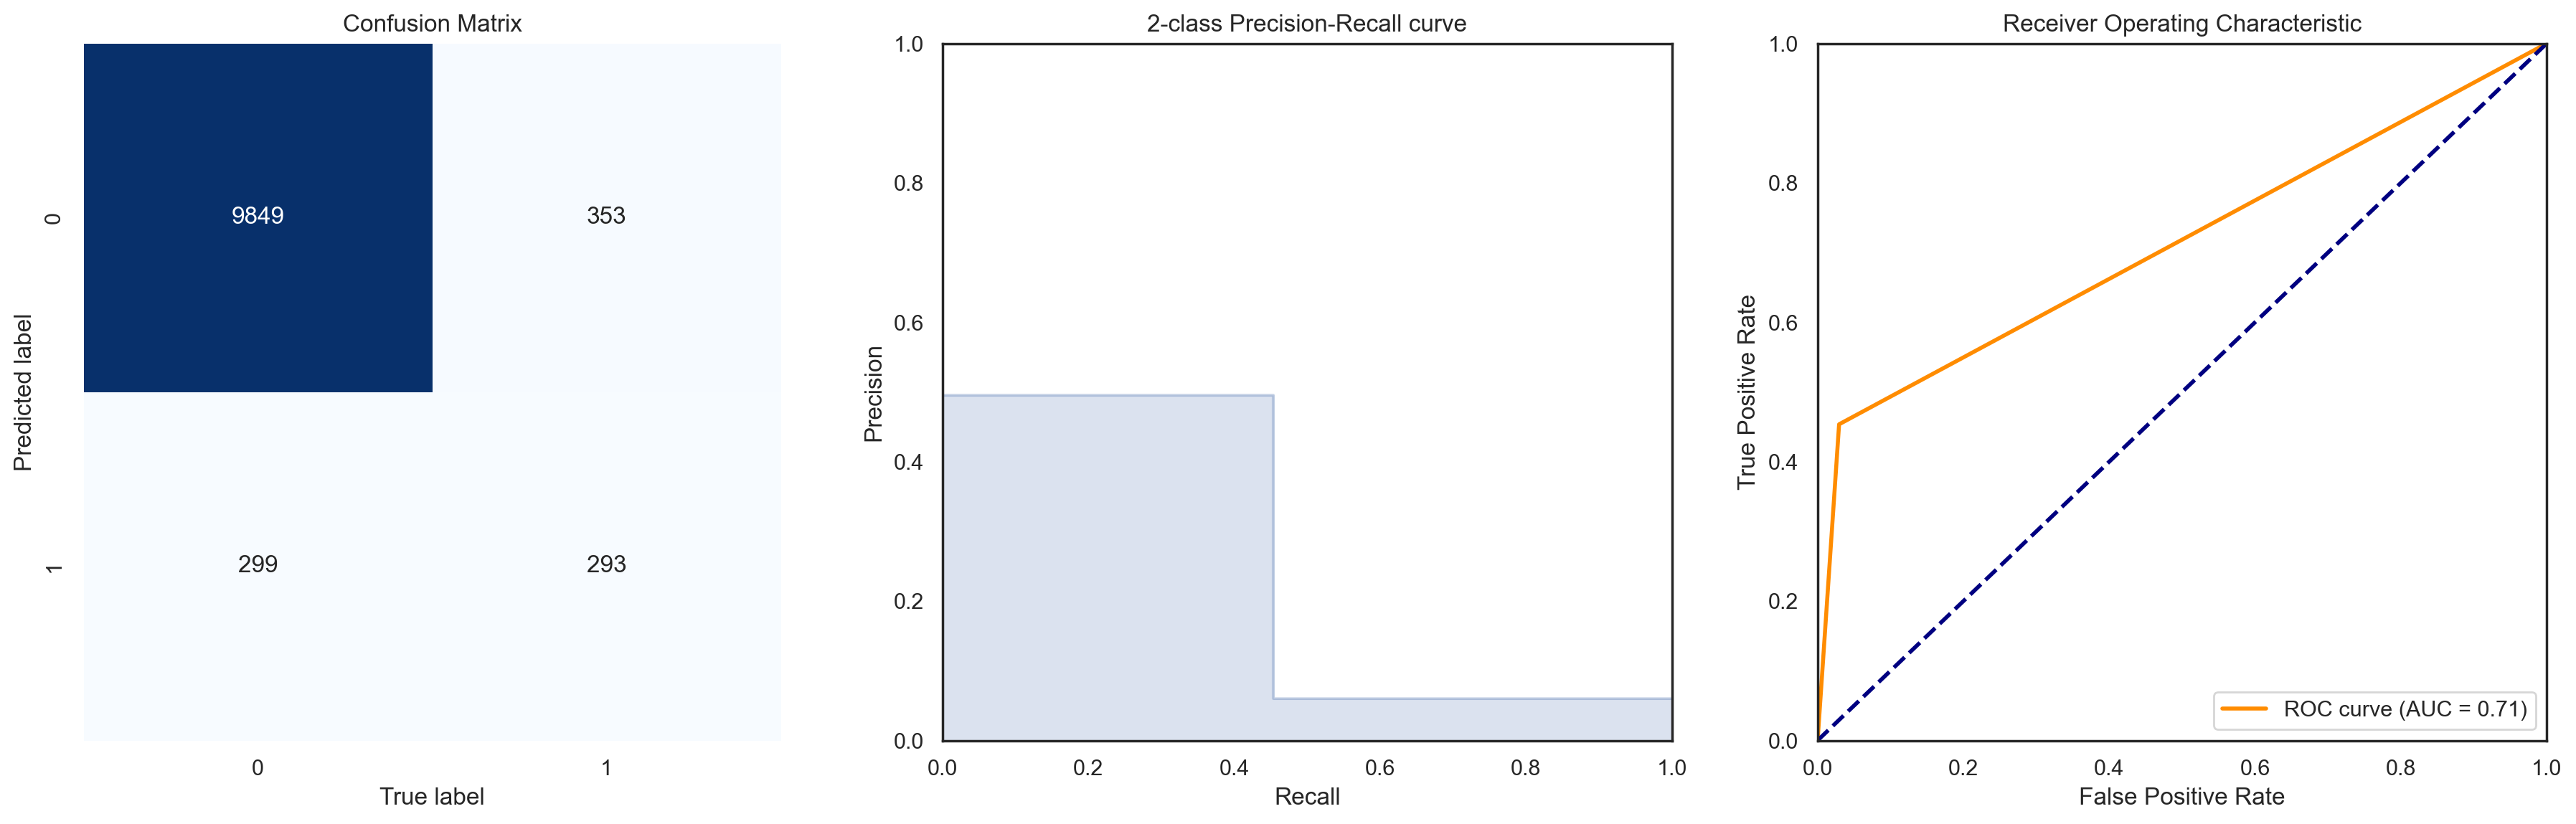

*****************
* Random Forest *
*****************
0.5150136487716106
Accuracy : 0.9012 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.3647 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8762 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
F1_Score : 0.5150 [2 * Precision * Recall / (Precision + Recall)]                     Best: 1, Worst: 0
ROC AUC  : 0.8895                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples
-----------------------------------------------------------------------------------------------------------
Using classification_report 
              precision    recall  f1-score   support



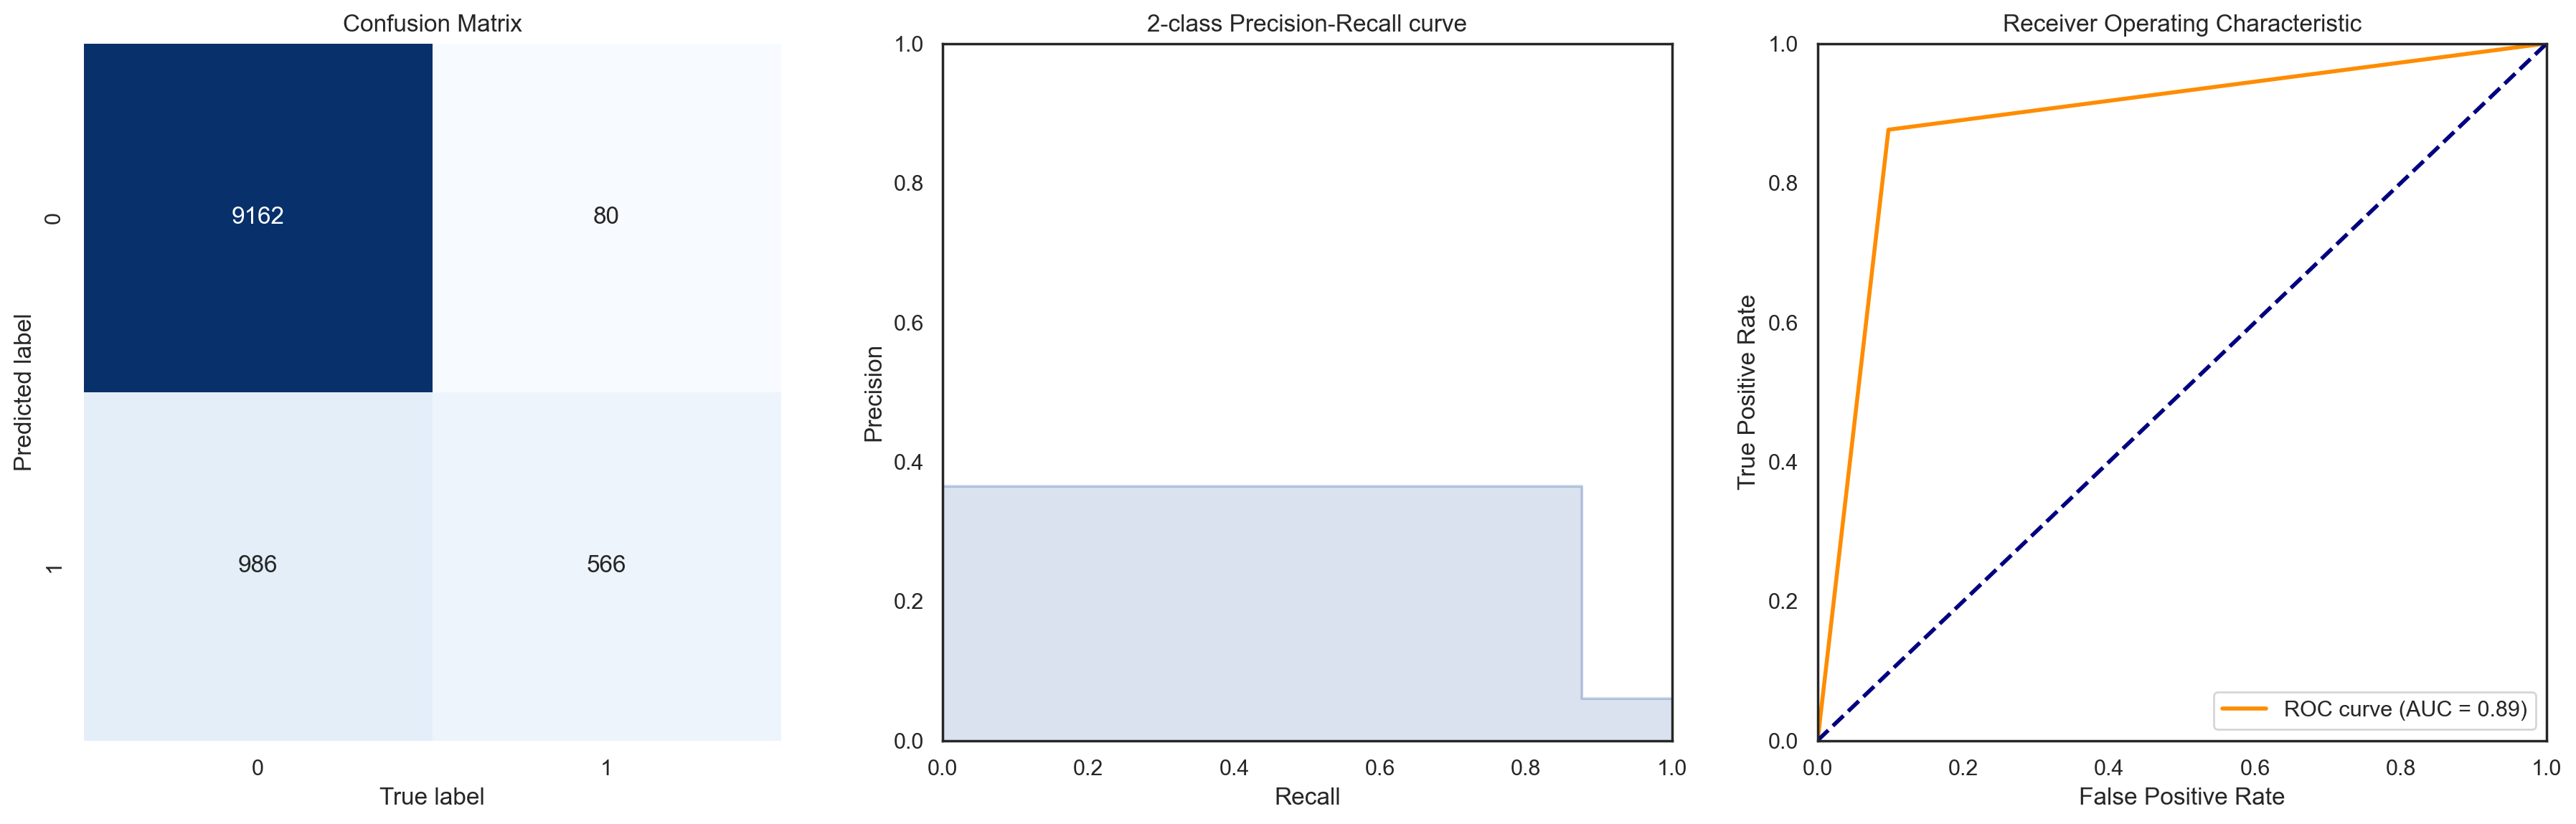

***************
* Naïve Bayes *
***************
0.10676156583629894
Accuracy : 0.9302 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.2284 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.0697 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
F1_Score : 0.1068 [2 * Precision * Recall / (Precision + Recall)]                     Best: 1, Worst: 0
ROC AUC  : 0.5273                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples
-----------------------------------------------------------------------------------------------------------
Using classification_report 
              precision    recall  f1-score   support

     

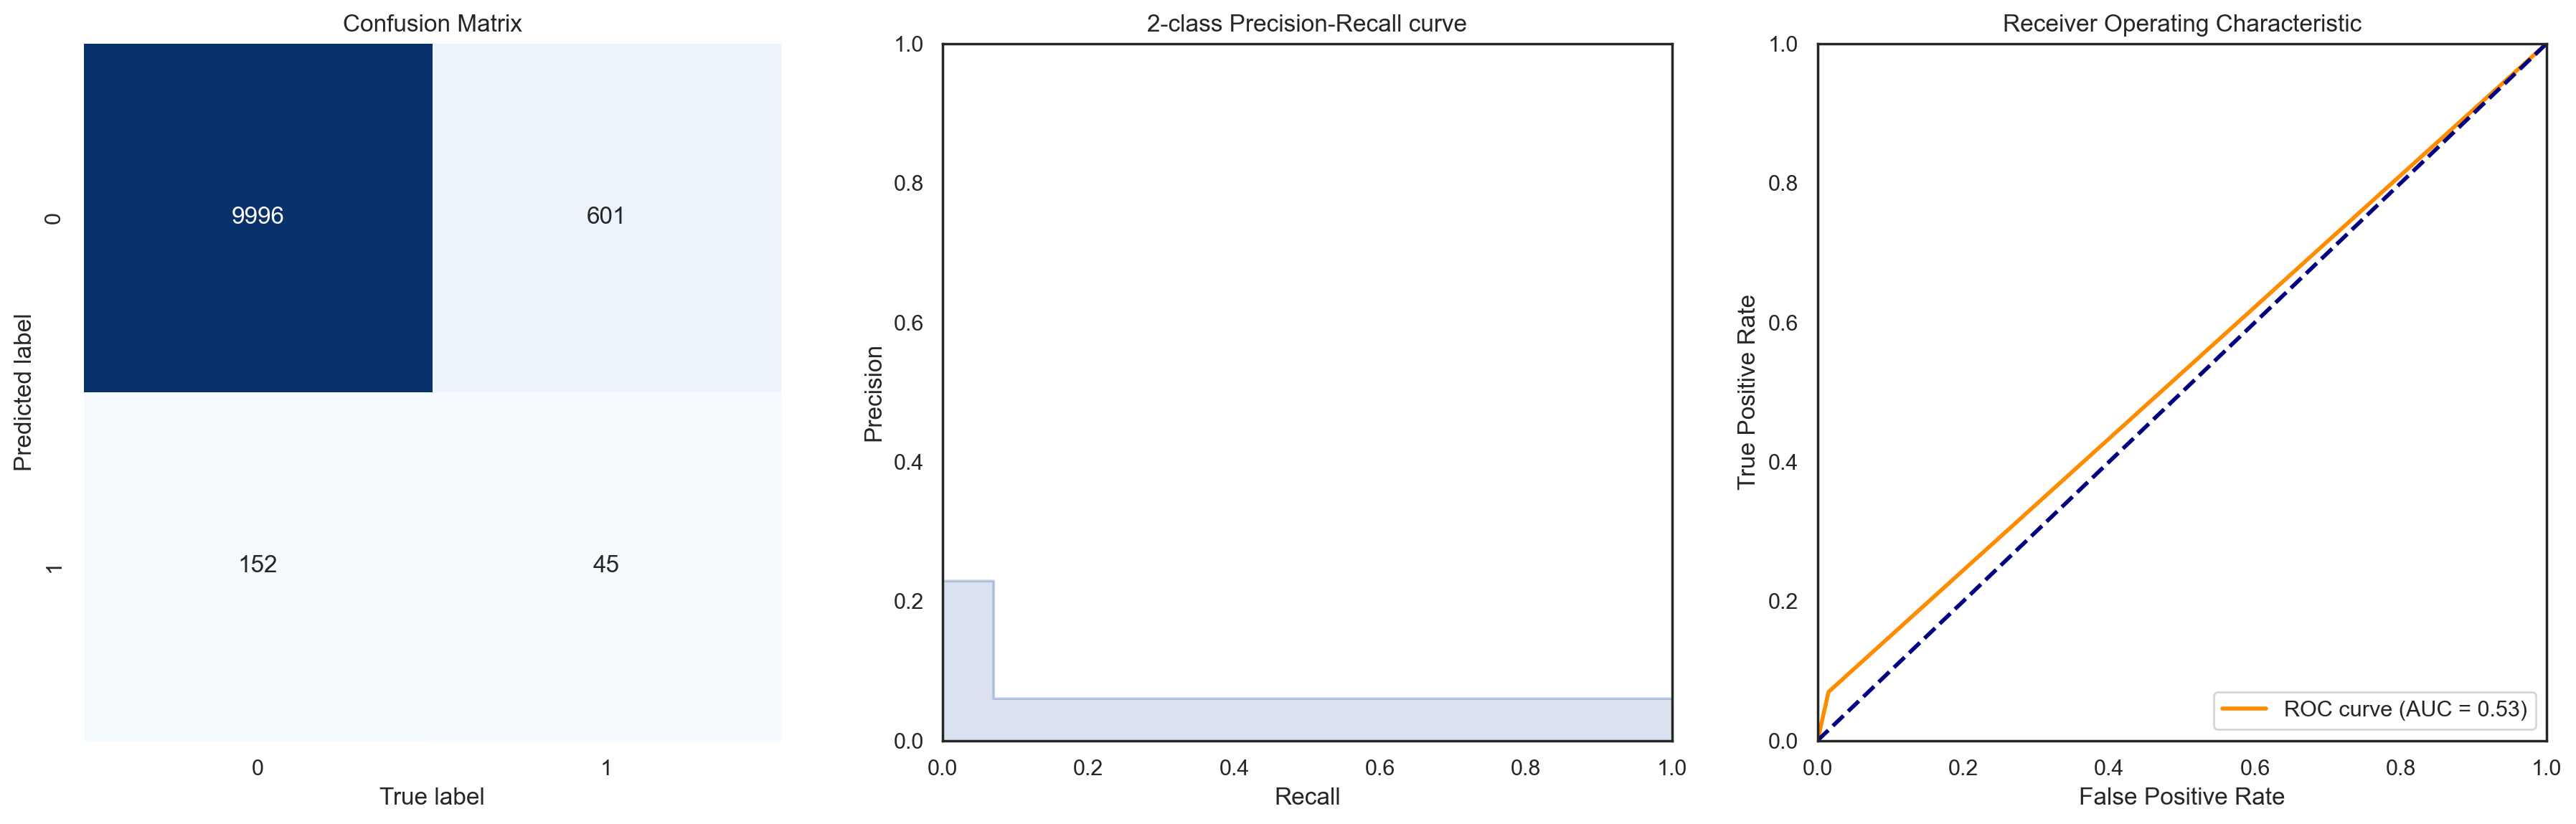

***********************
* Logistic Regression *
***********************
0.22170509837105987
Accuracy : 0.6592 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.1284 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8111 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
F1_Score : 0.2217 [2 * Precision * Recall / (Precision + Recall)]                     Best: 1, Worst: 0
ROC AUC  : 0.7303                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples
-----------------------------------------------------------------------------------------------------------
Using classification_report 
              precision    recall  f

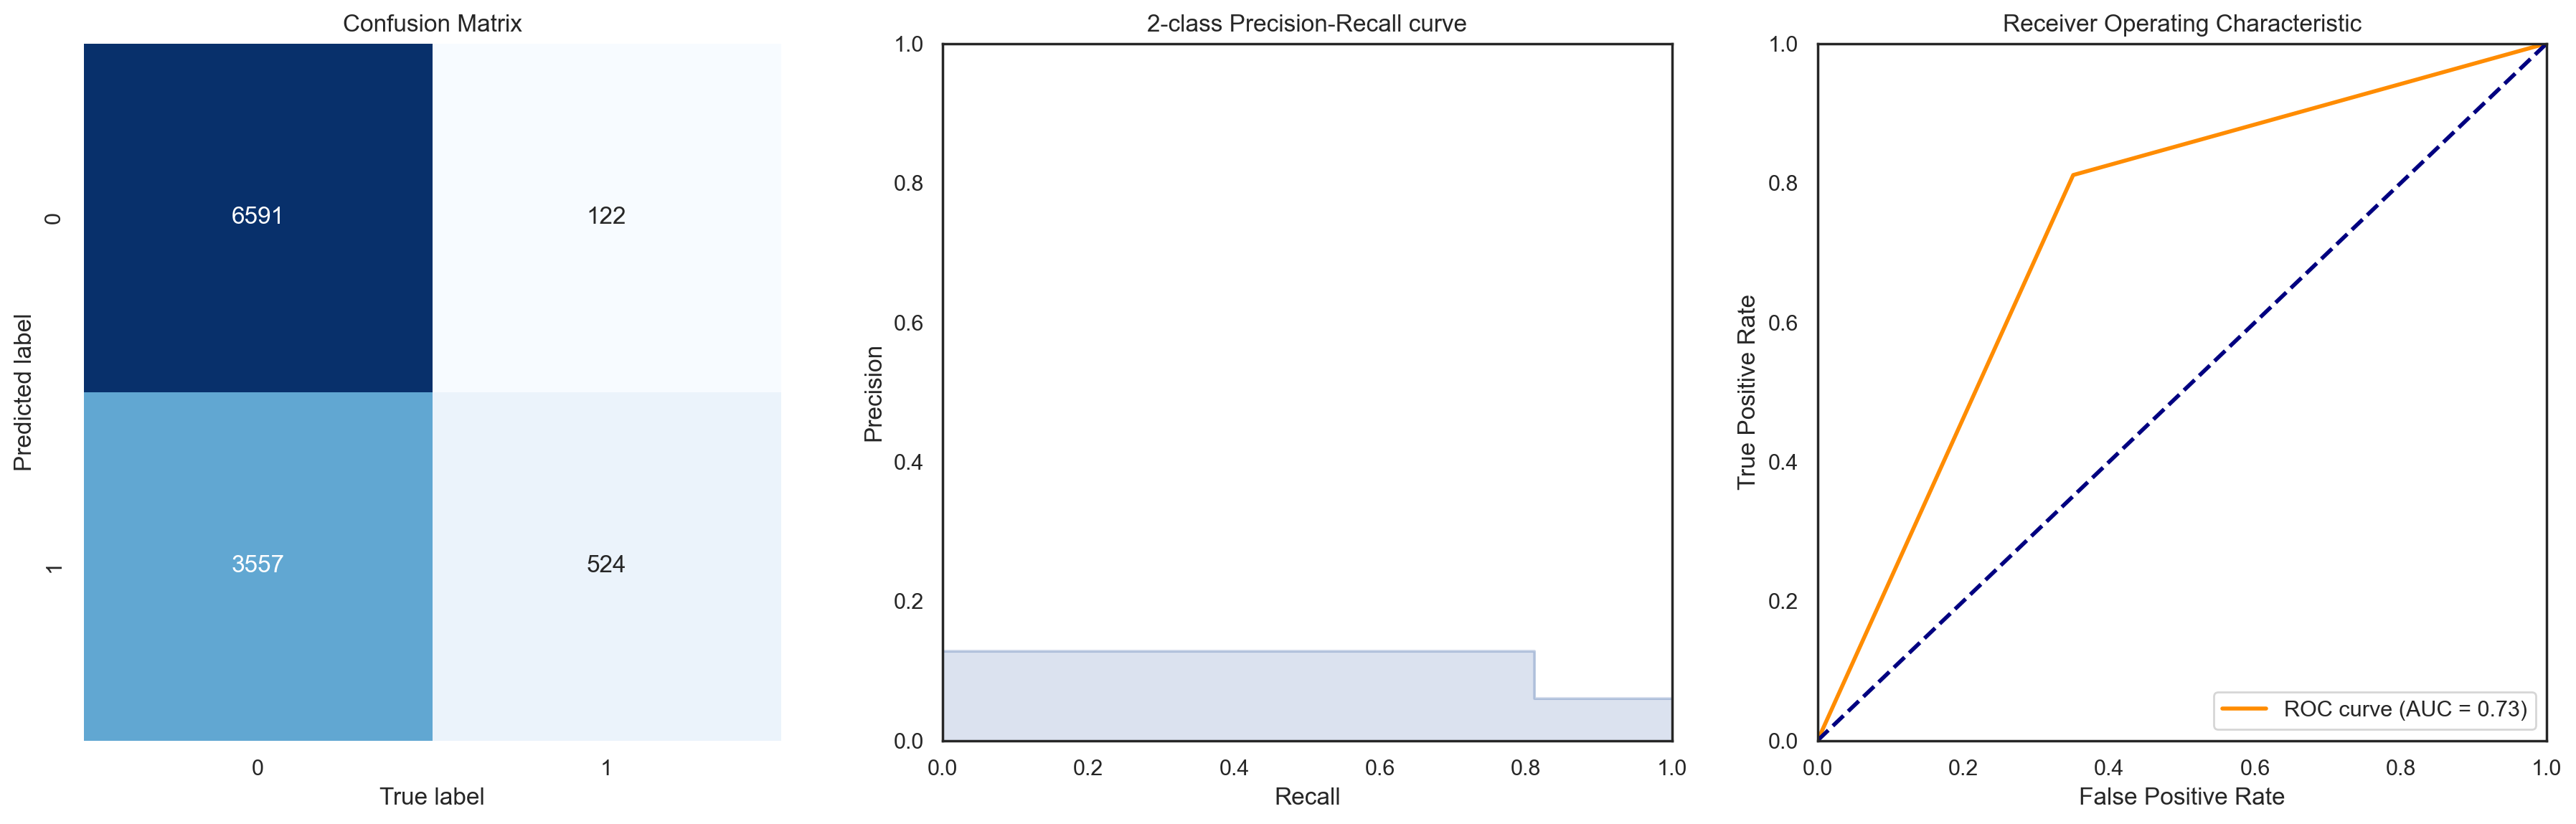

************
* Stacking *
************
0.5150136487716106
Accuracy : 0.9012 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.3647 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8762 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
F1_Score : 0.5150 [2 * Precision * Recall / (Precision + Recall)]                     Best: 1, Worst: 0
ROC AUC  : 0.8895                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples
-----------------------------------------------------------------------------------------------------------
Using classification_report 
              precision    recall  f1-score   support

           0   

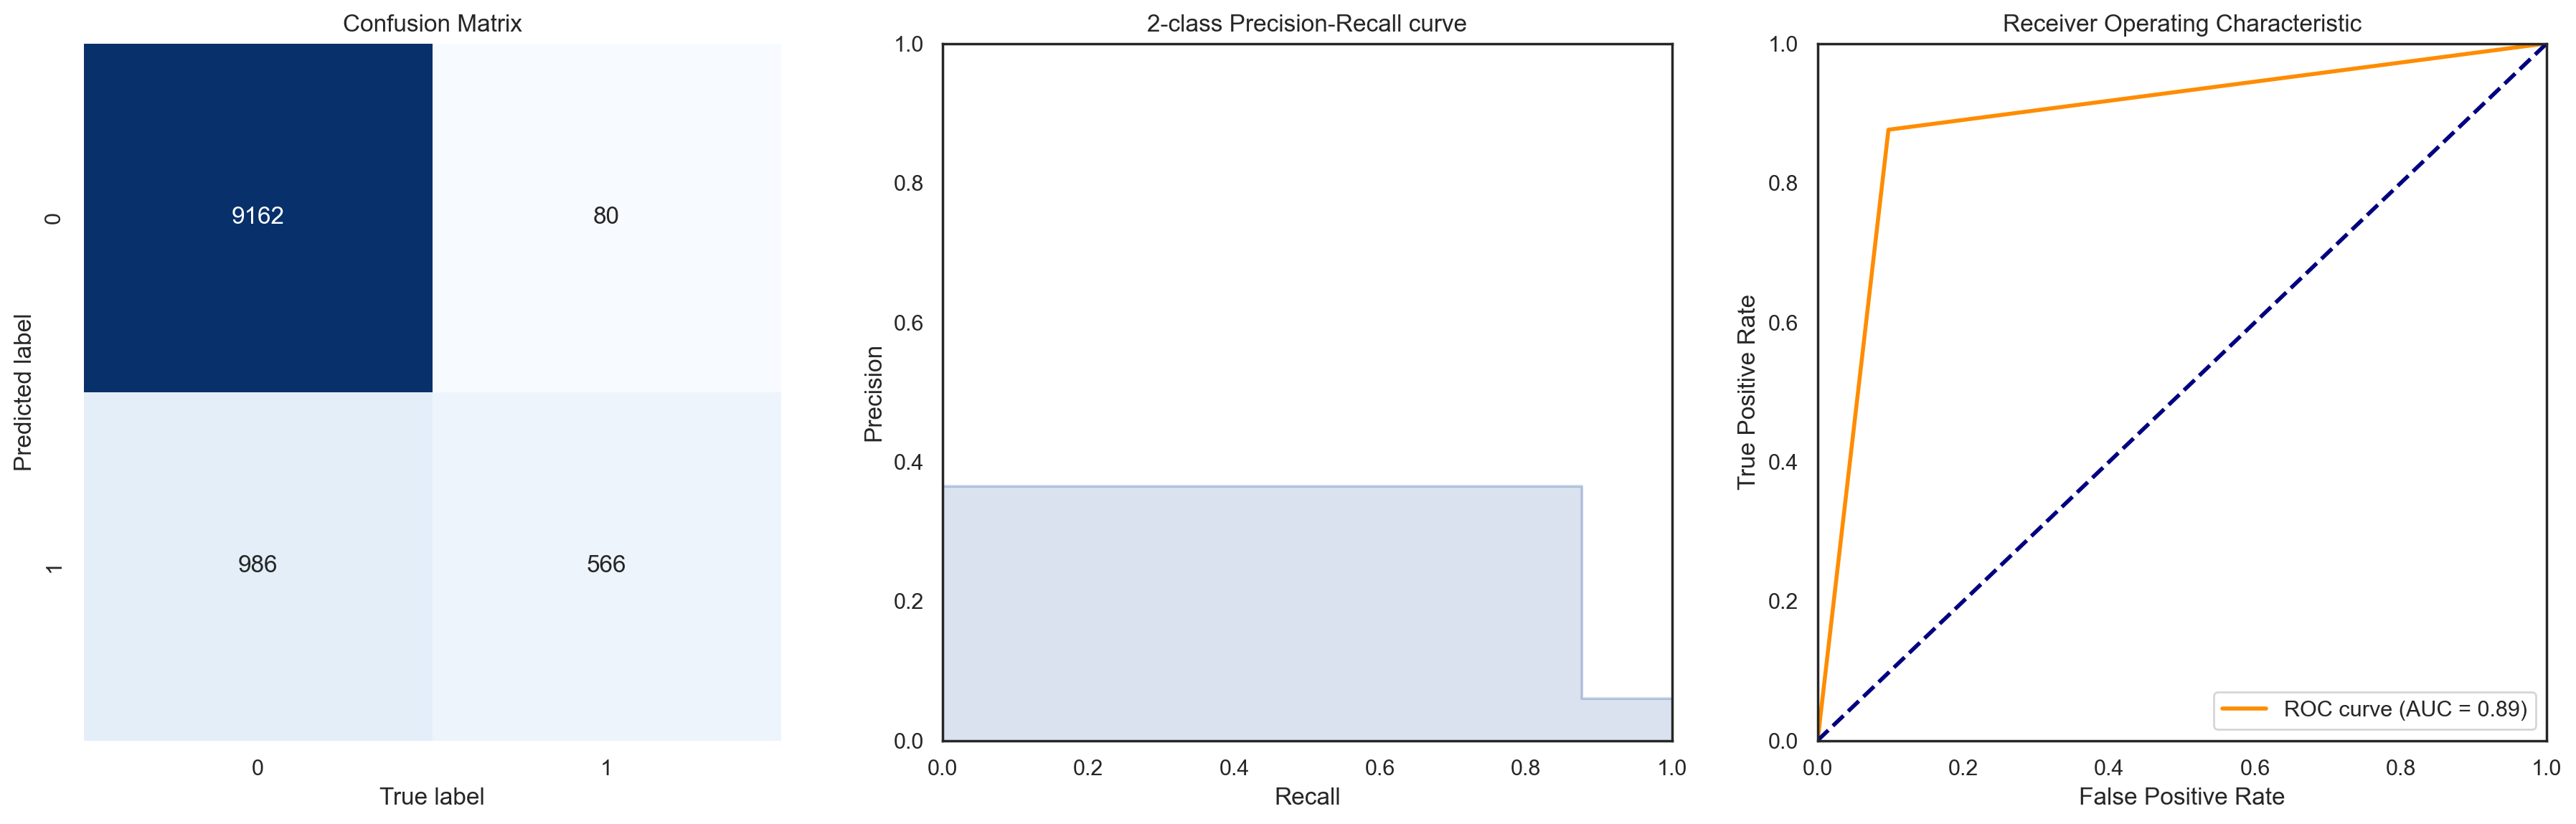

***********
* XGBoost *
***********
0.30657664416104025
Accuracy : 0.7431 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.1828 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9489 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
F1_Score : 0.3066 [2 * Precision * Recall / (Precision + Recall)]                     Best: 1, Worst: 0
ROC AUC  : 0.8395                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples
-----------------------------------------------------------------------------------------------------------
Using classification_report 
              precision    recall  f1-score   support

           0     

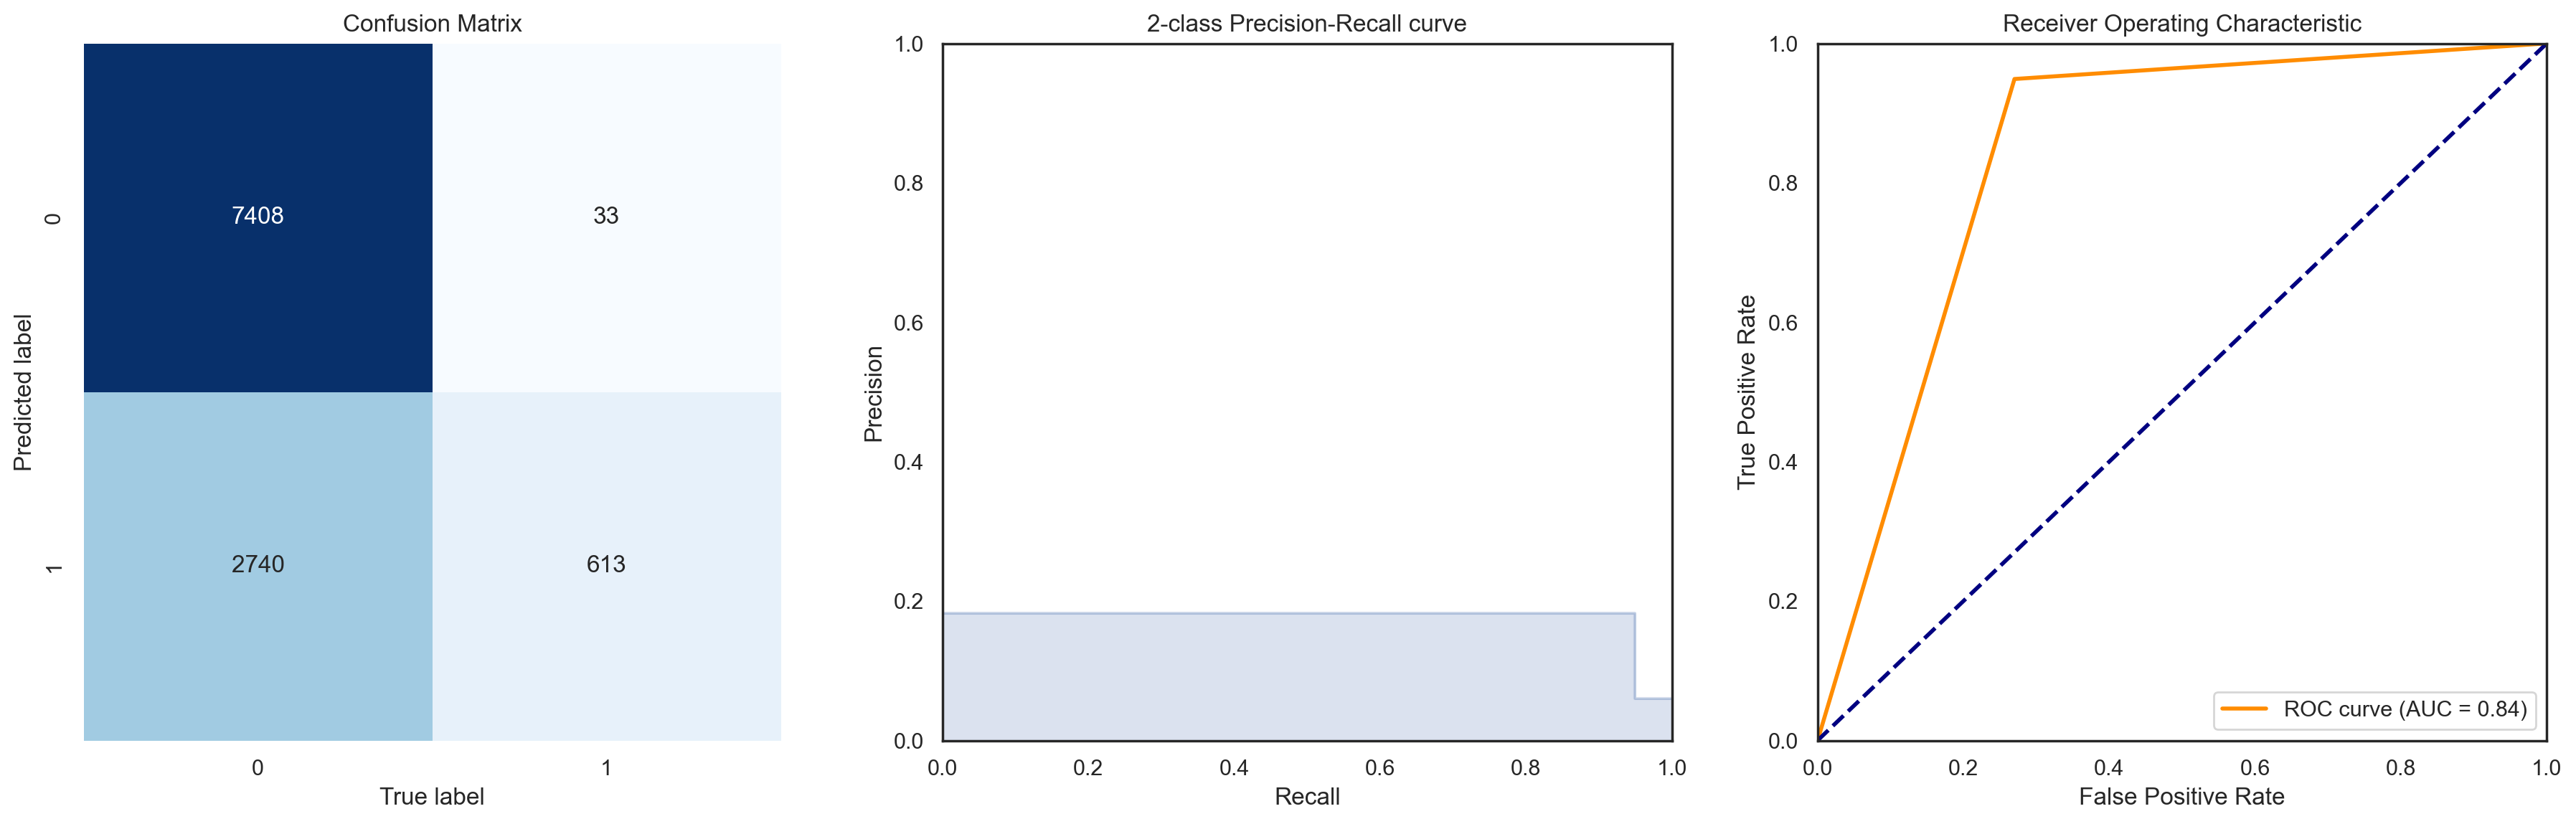


Final Results:

                 Model  Accuracy  Precision    Recall  F1_score   ROC_AUC
0                 K-NN  0.939596   0.494932  0.453560  0.473344  0.712048
1        Random Forest  0.901241   0.364691  0.876161  0.515014  0.889499
2          Naïve Bayes  0.930239   0.228426  0.069659  0.106762  0.527341
3  Logistic Regression  0.659162   0.128400  0.811146  0.221705  0.730317
4             Stacking  0.901241   0.364691  0.876161  0.515014  0.889499
5              XGBoost  0.743098   0.182821  0.948916  0.306577  0.839456


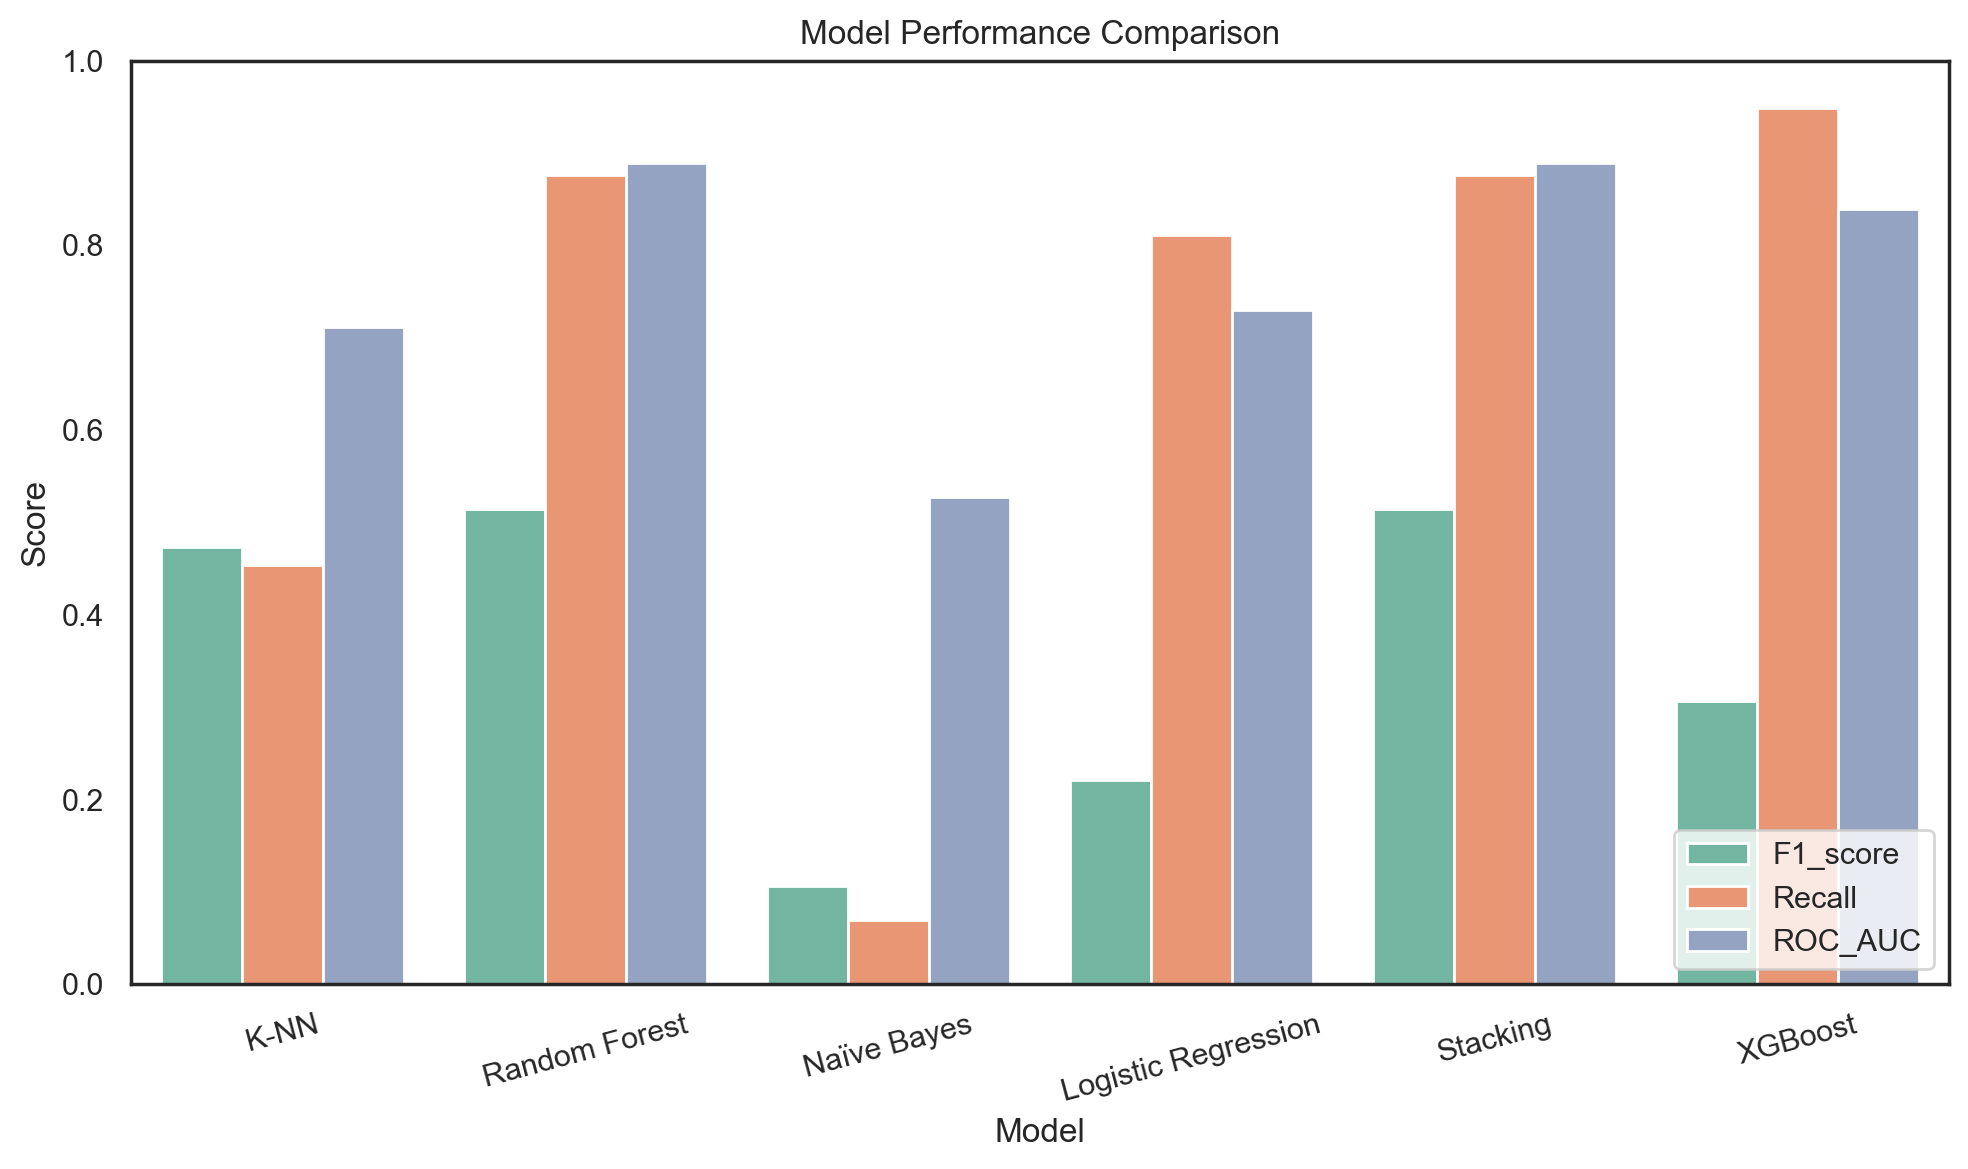

In [80]:
# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall','F1_score', 'ROC_AUC'])

models = ['K-NN', 'Random Forest', 'Naïve Bayes', 'Logistic Regression', 'Stacking', 'XGBoost']

for i, m in enumerate([clf1, clf2, clf3, lr, sclf, xgb_model]):
    print('*' * (len(models[i]) + 4))
    print('* %s *' % models[i])
    print('*' * (len(models[i]) + 4))
    predictions_proba = m.predict_proba(X_train)[:,1]
    predictions = (predictions_proba >= 0.5).astype(int)
    # show the report
    accuracy_, precision_, recall_, f1_, roc_auc_ = show_summary_report(y_train, predictions)
    # keep the results
    results.loc[i] = {'Model': models[i],
                      'Accuracy': accuracy_,
                      'Precision': precision_,
                      'Recall': recall_,
                      'F1_score': f1_,
                      'ROC_AUC': roc_auc_}
print('\nFinal Results:\n')
print(results)

# Plot the comparison
metrics = ['F1_score', 'Recall', 'ROC_AUC']
df_melted = results.melt(id_vars='Model', value_vars=metrics, var_name='Metric', value_name='Score')

plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric', palette='Set2')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [82]:
predictions = clf2.predict(X_test)
probabilities = clf2.predict_proba(X_test)[:,1]

0.2004950495049505
Accuracy : 0.8604 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.1525 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.2924 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
F1_Score : 0.2005 [2 * Precision * Recall / (Precision + Recall)]                     Best: 1, Worst: 0
ROC AUC  : 0.6958                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples
-----------------------------------------------------------------------------------------------------------
Using classification_report 
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      4349


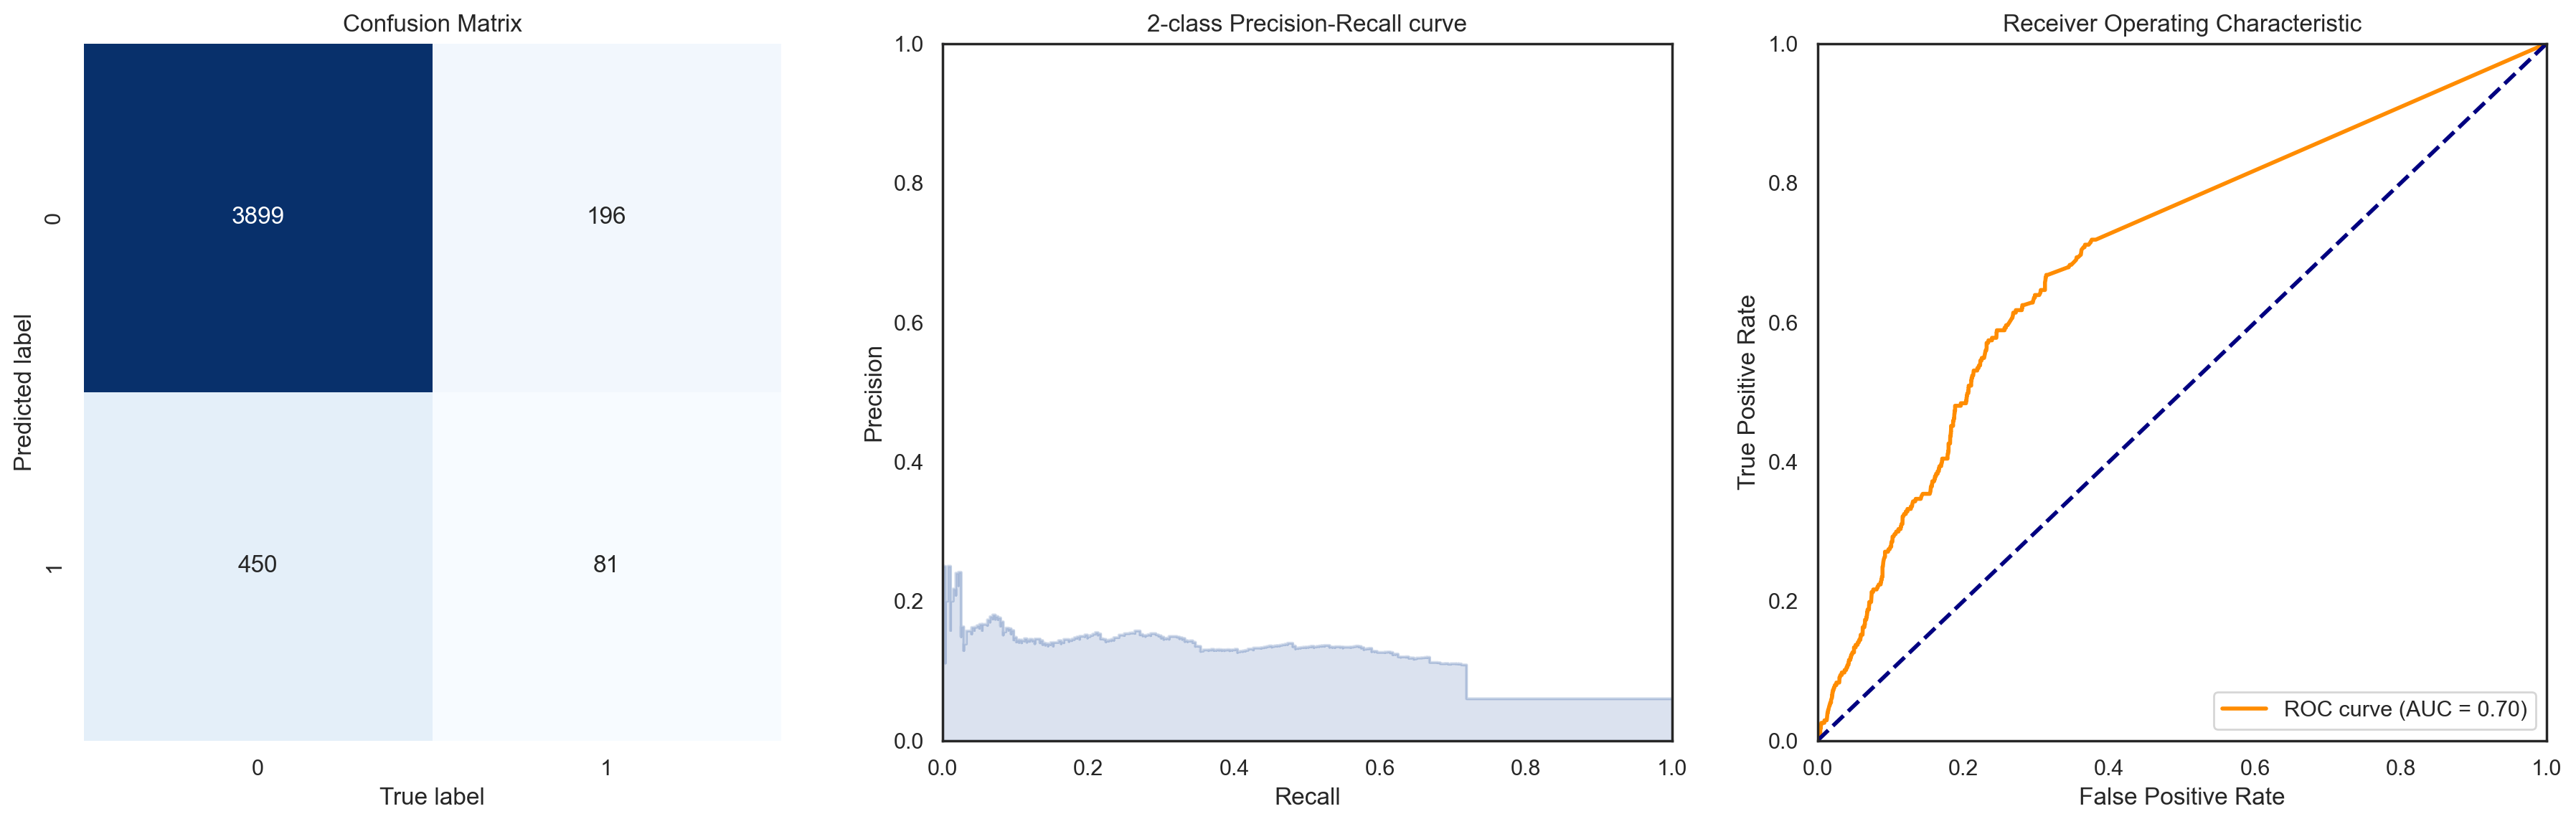

                       Model  Accuracy  Precision    Recall  F1_score  \
0                       K-NN  0.939596   0.494932  0.453560  0.473344   
1              Random Forest  0.901241   0.364691  0.876161  0.515014   
2                Naïve Bayes  0.930239   0.228426  0.069659  0.106762   
3        Logistic Regression  0.659162   0.128400  0.811146  0.221705   
4                   Stacking  0.901241   0.364691  0.876161  0.515014   
5                    XGBoost  0.743098   0.182821  0.948916  0.306577   
6  Random Forest (with test)  0.860355   0.152542  0.292419  0.200495   

    ROC_AUC  
0  0.712048  
1  0.889499  
2  0.527341  
3  0.730317  
4  0.889499  
5  0.839456  
6  0.695755  


In [83]:
accuracy_, precision_, recall_, f1_, roc_auc_ = show_summary_report(y_test, probabilities)
# keep the results
results.loc[len(results)] = {
    'Model': 'Random Forest (with test)',
    'Accuracy': accuracy_,
    'Precision': precision_,
    'Recall': recall_,
    'F1_score': f1_,
    'ROC_AUC': roc_auc_}
print(results)

# Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

The model can be used to answer (predict) if a person is diagnosed with a Benign or Malignant cancer.

In [86]:
r = fraud_new_normalized.iloc[0]
for i, c in enumerate(fraud_new_normalized.columns[:-1]):
    print('%-27s: %d' % (c, int(r[i])))
print('%-27s: %s' % (fraud_new_normalized.columns[-1], 'Fraud' if r[-1] == 1 else 'NotFraud'))
print('%-27s: %s' % ('Prediction', 'Fraud' if predictions[0] == 1 else 'NotFraud'))

Fault                      : 0
Age                        : 0
DriverRating               : 0
BasePolicy                 : 0
AgeOfVehicle               : 1
PastNumberOfClaims_none    : 1
VehiclePrice               : 1
FraudFound_P               : NotFraud
Prediction                 : NotFraud




---



---



> > > > > > > > > © 2025 Institute of Data


---



---



